## Final Project Submission

Please fill out:
* Student name: Mindy Jen
* Student pace: full time
* Scheduled project review date/time: Aug. 27th, 2020/4:00-4:45 (CDT)
* Instructor name: Yish Lim
* Blog post URL: in progress
* data (too big to be operative)
    * 2020 April - 2020 Aug 9th     (IL stay-at-home order for COVID-19 starts taking effect)
    * 2020 Mar ----------------     (pandemic arose)
    * 2019 Dec - 2020 Feb           (Holiday season)
    * 2019 Sep - 2019 Nov           (Fall)
    * 2019 Jun - 2019 Aug           (Summer)
    * 2019 Mar - 2019 May           (Spring)

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

# Obtaining data

In [2]:
dfc = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
dfc.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,073682ef84ff827659552d4254ad1b98bfec24935cc9cc...,JB460108,NaN,10/02/2018 06:30:00 PM,10,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,18,3,10,NaN,NaN,NaN
1,1560fb8a1e32b528fef8bfd677d2b3fc5ab37278b157fa...,JC325941,NaN,06/27/2019 04:00:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,16,5,6,NaN,NaN,NaN
2,c7e667807d86ff2e83da48267e1135680cad68c86eb00f...,JD150617,NaN,02/13/2020 04:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,1.0,2.0,0.0,16,5,2,NaN,NaN,NaN
3,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,JA329216,NaN,06/30/2017 04:00:00 PM,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,0.0,0.0,3.0,0.0,16,6,6,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)
4,00e47f189660cd8ba1e85fc63061bf1d8465184393f134...,JC194776,NaN,03/21/2019 10:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,0.0,0.0,2.0,0.0,22,5,3,41.741804,-87.740954,POINT (-87.740953581987 41.741803598989)


In [3]:
#dfc.notnull().sum()/dfc.shape[0]
#dfc.isnull().sum()/dfc.shape[0]
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428605 entries, 0 to 428604
Data columns (total 49 columns):
CRASH_RECORD_ID                  428605 non-null object
RD_NO                            424485 non-null object
CRASH_DATE_EST_I                 31821 non-null object
CRASH_DATE                       428605 non-null object
POSTED_SPEED_LIMIT               428605 non-null int64
TRAFFIC_CONTROL_DEVICE           428605 non-null object
DEVICE_CONDITION                 428605 non-null object
WEATHER_CONDITION                428605 non-null object
LIGHTING_CONDITION               428605 non-null object
FIRST_CRASH_TYPE                 428605 non-null object
TRAFFICWAY_TYPE                  428605 non-null object
LANE_CNT                         198956 non-null float64
ALIGNMENT                        428605 non-null object
ROADWAY_SURFACE_COND             428605 non-null object
ROAD_DEFECT                      428605 non-null object
REPORT_TYPE                      418545 non-null o

In [4]:
dfp = pd.read_csv('Traffic_Crashes_-_People.csv')
dfp.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,RD_NO,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O10,DRIVER,2e31858c0e411f0bdcb337fb7c415aa93763cf2f23e02f...,HY368708,10.0,08/04/2015 12:40:00 PM,NaN,CHICAGO,IL,60641,...,NaN,FAILED TO YIELD,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O100,DRIVER,e73b35bd7651b0c6693162bee0666db159b28901437009...,HY374018,96.0,07/31/2015 05:50:00 PM,NaN,ELK GROVE,IL,60007,...,NaN,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O1000,DRIVER,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,HY407431,954.0,09/02/2015 11:45:00 AM,NaN,CHICAGO,IL,NaN,...,NaN,UNKNOWN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10000,DRIVER,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,HY484148,9561.0,10/31/2015 09:30:00 PM,NaN,SKOKIE,IL,60076,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O100001,DRIVER,2fcefeab458932d8b1b12e103c18c50adc659943cccd4b...,HZ525619,96762.0,11/15/2016 05:45:00 PM,NaN,NaN,NaN,NaN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [5]:
#dfp.notnull().sum()/dfp.shape[0]
#dfp.isnull().sum()/dfp.shape[0]
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950969 entries, 0 to 950968
Data columns (total 30 columns):
PERSON_ID                950969 non-null object
PERSON_TYPE              950969 non-null object
CRASH_RECORD_ID          950969 non-null object
RD_NO                    941972 non-null object
VEHICLE_ID               932154 non-null float64
CRASH_DATE               950969 non-null object
SEAT_NO                  196011 non-null float64
CITY                     706008 non-null object
STATE                    713632 non-null object
ZIPCODE                  645533 non-null object
SEX                      936860 non-null object
AGE                      681858 non-null float64
DRIVERS_LICENSE_STATE    565490 non-null object
DRIVERS_LICENSE_CLASS    494357 non-null object
SAFETY_EQUIPMENT         948132 non-null object
AIRBAG_DEPLOYED          932795 non-null object
EJECTION                 939120 non-null object
INJURY_CLASSIFICATION    950436 non-null object
HOSPITAL              

In [6]:
dfv = pd.read_csv('Traffic_Crashes_-_Vehicles.csv')
dfv.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,10,2e31858c0e411f0bdcb337fb7c415aa93763cf2f23e02f...,HY368708,08/04/2015 12:40:00 PM,1,DRIVER,NaN,10.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,e73b35bd7651b0c6693162bee0666db159b28901437009...,HY374018,07/31/2015 05:50:00 PM,1,DRIVER,NaN,96.0,NaN,NISSAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,HY407431,09/02/2015 11:45:00 AM,1,DRIVER,NaN,954.0,NaN,FORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,HY484148,10/31/2015 09:30:00 PM,2,DRIVER,NaN,9561.0,NaN,HYUNDAI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,1d3c178880366c77deaf06b8c3198429112a1c8e8807ed...,HZ518934,11/16/2016 01:00:00 PM,2,PARKED,NaN,96745.0,NaN,"TOYOTA MOTOR COMPANY, LTD.",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#dfv.notnull().sum()/dfv.shape[0]
#dfv.isnull().sum()/dfv.shape[0]
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872794 entries, 0 to 872793
Data columns (total 72 columns):
CRASH_UNIT_ID               872794 non-null int64
CRASH_RECORD_ID             872794 non-null object
RD_NO                       864216 non-null object
CRASH_DATE                  872794 non-null object
UNIT_NO                     872794 non-null int64
UNIT_TYPE                   871474 non-null object
NUM_PASSENGERS              131658 non-null float64
VEHICLE_ID                  852591 non-null float64
CMRC_VEH_I                  16171 non-null object
MAKE                        852586 non-null object
MODEL                       852454 non-null object
LIC_PLATE_STATE             782420 non-null object
VEHICLE_YEAR                715984 non-null float64
VEHICLE_DEFECT              852591 non-null object
VEHICLE_TYPE                852591 non-null object
VEHICLE_USE                 852591 non-null object
TRAVEL_DIRECTION            852591 non-null object
MANEUVER              

# Scrubbing data
## removal of empty columns 

In [8]:
# we want to delete columns with more than 80% of data missing
def remove_empty_cols(df, cut):
    df_clone = df.copy()
    size = df_clone.shape[0]
    
    for col in df_clone.columns:
        if df_clone[col].isna().sum()/size > cut:
            df_clone = df_clone.drop([col], axis=1)
            print(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "{col}"    ...being dropped...')
        else:
            print(f'{col} ...being kept...')
            continue
            
    return df_clone

In [9]:
print('before', dfc.shape)
print('-------------------------')
dfc2 = remove_empty_cols(dfc, 0.8)
print('-------------------------')
print('now', dfc2.shape)

before (428605, 49)
-------------------------
CRASH_RECORD_ID ...being kept...
RD_NO ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "CRASH_DATE_EST_I"    ...being dropped...
CRASH_DATE ...being kept...
POSTED_SPEED_LIMIT ...being kept...
TRAFFIC_CONTROL_DEVICE ...being kept...
DEVICE_CONDITION ...being kept...
WEATHER_CONDITION ...being kept...
LIGHTING_CONDITION ...being kept...
FIRST_CRASH_TYPE ...being kept...
TRAFFICWAY_TYPE ...being kept...
LANE_CNT ...being kept...
ALIGNMENT ...being kept...
ROADWAY_SURFACE_COND ...being kept...
ROAD_DEFECT ...being kept...
REPORT_TYPE ...being kept...
CRASH_TYPE ...being kept...
INTERSECTION_RELATED_I ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "NOT_RIGHT_OF_WAY_I"    ...being dropped...
HIT_AND_RUN_I ...being kept...
DAMAGE ...being kept...
DATE_POLICE_NOTIFIED ...being kept...
PRIM_CONTRIBUTORY_CAUSE ...being kept...
SEC_CONTRIBUTORY_CAUSE ...being kept...
STREET_NO ...being 

In [10]:
print('before', dfp.shape)
print('-------------------------')
dfp2 = remove_empty_cols(dfp, 0.8)
print('-------------------------')
print('now', dfp2.shape)

before (950969, 30)
-------------------------
PERSON_ID ...being kept...
PERSON_TYPE ...being kept...
CRASH_RECORD_ID ...being kept...
RD_NO ...being kept...
VEHICLE_ID ...being kept...
CRASH_DATE ...being kept...
SEAT_NO ...being kept...
CITY ...being kept...
STATE ...being kept...
ZIPCODE ...being kept...
SEX ...being kept...
AGE ...being kept...
DRIVERS_LICENSE_STATE ...being kept...
DRIVERS_LICENSE_CLASS ...being kept...
SAFETY_EQUIPMENT ...being kept...
AIRBAG_DEPLOYED ...being kept...
EJECTION ...being kept...
INJURY_CLASSIFICATION ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "HOSPITAL"    ...being dropped...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "EMS_AGENCY"    ...being dropped...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "EMS_RUN_NO"    ...being dropped...
DRIVER_ACTION ...being kept...
DRIVER_VISION ...being kept...
PHYSICAL_CONDITION ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [11]:
print('before', dfv.shape)
print('-------------------------')
dfv2 = remove_empty_cols(dfv, 0.8)
print('-------------------------')
print('now', dfv2.shape)

before (872794, 72)
-------------------------
CRASH_UNIT_ID ...being kept...
CRASH_RECORD_ID ...being kept...
RD_NO ...being kept...
CRASH_DATE ...being kept...
UNIT_NO ...being kept...
UNIT_TYPE ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "NUM_PASSENGERS"    ...being dropped...
VEHICLE_ID ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "CMRC_VEH_I"    ...being dropped...
MAKE ...being kept...
MODEL ...being kept...
LIC_PLATE_STATE ...being kept...
VEHICLE_YEAR ...being kept...
VEHICLE_DEFECT ...being kept...
VEHICLE_TYPE ...being kept...
VEHICLE_USE ...being kept...
TRAVEL_DIRECTION ...being kept...
MANEUVER ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "TOWED_I"    ...being dropped...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "FIRE_I"    ...being dropped...
OCCUPANT_CNT ...being kept...
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> "EXCEED_SPEED_

## conversion of time-stamp column

In [12]:
def general_datetime_converter(df, col):
    df_clone = df.copy()
    df_clone[col] = pd.to_datetime(df_clone[col])
    return df_clone

In [13]:
dfc2['CRASH_DATE'].dtype

dtype('O')

In [14]:
dfc3p = general_datetime_converter(dfc2, 'CRASH_DATE')
dfc3p['CRASH_DATE'].dtype

dtype('<M8[ns]')

In [15]:
print('before', dfc3p.shape)
dfc3 = dfc3p.loc[(dfc3p['CRASH_DATE'].dt.year == 2020) & (dfc3p['CRASH_DATE'].dt.month > 3),:]
print('-------------------------------------') 
print('now', dfc3.shape)

before (428605, 41)
-------------------------------------
now (29644, 41)


In [16]:
dfp2['CRASH_DATE'].dtype

dtype('O')

In [17]:
dfp3p = general_datetime_converter(dfp2, 'CRASH_DATE')
dfp3p['CRASH_DATE'].dtype

dtype('<M8[ns]')

In [18]:
print('before', dfp3p.shape)
dfp3 = dfp3p.loc[(dfp3p['CRASH_DATE'].dt.year == 2020) & (dfp3p['CRASH_DATE'].dt.month > 3),:]
print('-------------------------------------') 
print('now', dfp3.shape)

before (950969, 22)
-------------------------------------
now (64749, 22)


In [19]:
dfv2['CRASH_DATE'].dtype

dtype('O')

In [20]:
dfv3p = general_datetime_converter(dfv2, 'CRASH_DATE')
dfv3p['CRASH_DATE'].dtype

dtype('<M8[ns]')

In [21]:
print('before', dfv3p.shape)
dfv3 = dfv3p.loc[(dfv3p['CRASH_DATE'].dt.year == 2020) & (dfv3p['CRASH_DATE'].dt.month > 3),:]
print('-------------------------------------') 
print('now', dfv3.shape)

before (872794, 19)
-------------------------------------
now (61759, 19)


# Combining data (COVID-19 era only)

## comparison of multiple data-frames

In [22]:
def matchDuplicateColumnNames(df1, df2):
    df1_clone = df1.copy()
    df2_clone = df2.copy()
    matchColumnNames = set()
    
    for colA in df1_clone.columns:
        for colB in df2_clone.columns:
            if colA == colB:
                matchColumnNames.add(colB)
                
    return list(matchColumnNames)

In [23]:
matchcv = matchDuplicateColumnNames(dfc3, dfv3)
matchcv

['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE']

In [24]:
matchcp = matchDuplicateColumnNames(dfc3, dfp3)
matchcp

['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE']

In [25]:
matchpv = matchDuplicateColumnNames(dfp3, dfv3)
matchpv

['CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE']

In [26]:
matchcpv = list(set(matchcv + matchcp + matchpv))
matchcpv

['CRASH_RECORD_ID', 'VEHICLE_ID', 'RD_NO', 'CRASH_DATE']

## combination of multiple data-frames

In [27]:
from glob import glob
csv_files = glob("./*.csv")
csv_files

['.\\Traffic_Crashes_-_CPV_FatalDegree.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_final.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_final2EDA.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_finalEDA.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v1.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v2.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v3.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v4.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v5.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v6.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v6_mean.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v7_mean.csv',
 '.\\Traffic_Crashes_-_CPV_FatalDegree_v8_mean.csv',
 '.\\Traffic_Crashes_-_CPV_v0.csv',
 '.\\Traffic_Crashes_-_CPV_v1.csv',
 '.\\Traffic_Crashes_-_CPV_v2.csv',
 '.\\Traffic_Crashes_-_Crashes.csv',
 '.\\Traffic_Crashes_-_People.csv',
 '.\\Traffic_Crashes_-_Vehicles.csv']

In [28]:
import os
csv_files_dict = dict()
for file in csv_files:
    filename = os.path.basename(file).replace(".csv","").replace(".\\","").replace("_-","") # cleaning file names
    file_dfs = pd.read_csv(file, index_col=None)
    csv_files_dict[filename] = file_dfs
    
csv_files_dict.keys()

dict_keys(['Traffic_Crashes_CPV_FatalDegree', 'Traffic_Crashes_CPV_FatalDegree_final', 'Traffic_Crashes_CPV_FatalDegree_final2EDA', 'Traffic_Crashes_CPV_FatalDegree_finalEDA', 'Traffic_Crashes_CPV_FatalDegree_v1', 'Traffic_Crashes_CPV_FatalDegree_v2', 'Traffic_Crashes_CPV_FatalDegree_v3', 'Traffic_Crashes_CPV_FatalDegree_v4', 'Traffic_Crashes_CPV_FatalDegree_v5', 'Traffic_Crashes_CPV_FatalDegree_v6', 'Traffic_Crashes_CPV_FatalDegree_v6_mean', 'Traffic_Crashes_CPV_FatalDegree_v7_mean', 'Traffic_Crashes_CPV_FatalDegree_v8_mean', 'Traffic_Crashes_CPV_v0', 'Traffic_Crashes_CPV_v1', 'Traffic_Crashes_CPV_v2', 'Traffic_Crashes_Crashes', 'Traffic_Crashes_People', 'Traffic_Crashes_Vehicles'])

In [29]:
print('Crashes',csv_files_dict['Traffic_Crashes_Crashes'].shape)
print('People',csv_files_dict['Traffic_Crashes_People'].shape)
print('Vehicles',csv_files_dict['Traffic_Crashes_Vehicles'].shape)

Crashes (428605, 49)
People (950969, 30)
Vehicles (872794, 72)


In [30]:
dfc4 = dfc3.drop(['RD_NO'], axis=1)
dfp4 = dfp3.drop(['RD_NO','VEHICLE_ID'], axis=1)
dfv4 = dfv3.drop(['RD_NO','VEHICLE_ID'], axis=1)

In [31]:
print('dfc4',dfc4.shape)
print('dfp4',dfp4.shape)
print('dfv4',dfv4.shape)

dfc4 (29644, 40)
dfp4 (64749, 20)
dfv4 (61759, 17)


In [32]:
df0 = pd.merge(dfp4, dfv4, on=['CRASH_RECORD_ID','CRASH_DATE'], how='inner')
df0.shape

(140979, 35)

In [33]:
dfcovid190 = pd.merge(df0, dfc4, on=['CRASH_RECORD_ID','CRASH_DATE'], how='inner')
dfcovid190.shape

(140902, 73)

# Cleaning data (COVID-19 era only)
## reduction of feature sizes
### redundant (duplicate) columns

In [34]:
def removeDuplicateColumns(df):
    df_clone = df.copy()
    duplicateColumnNames = set()
    
    for x in range(df_clone.shape[1]):
        colA = df_clone.iloc[:,x]
        for y in range(x+1,df_clone.shape[1]):
            colB = df_clone.iloc[:,y]
            if colA.equals(colB):
                duplicateColumnNames.add(df_clone.columns.values[y])
                
    print('duplicate columns are as follows:')
    print(list(duplicateColumnNames))
    
    df_clone = df_clone.drop(list(duplicateColumnNames), axis=1)
    return df_clone

In [35]:
dfcovid191 = removeDuplicateColumns(dfcovid190)
dfcovid191.shape

duplicate columns are as follows:
[]


(140902, 73)

### redundant (duplicate) rows

In [36]:
# we require ALL duplicated rows be deleted
def check_duplicate_rows(df):
    df_clone = df.copy()
    df_clone['is_duplicated'] = df_clone.duplicated(subset=None, keep=False)
    if df_clone['is_duplicated'].value_counts(normalize=True, sort=False)[0] == 1: # 100% False 
        print(f'checked: w/o duplications!')
        df_clone = df_clone.drop(['is_duplicated'], axis=1)
        return False
    else:
        print(f'checked: w/ duplications!')
        df_clone = df_clone.drop(['is_duplicated'], axis=1)
        return True

In [37]:
def remove_duplicate_rows(df):
    df_clone = df.copy()
    okay = check_duplicate_rows(df_clone)
    if okay:
        try:
            df_clone = df_clone.drop_duplicates(subset=None, keep="first")
            print(f"\t >>> Dropped duplications")
            return df_clone
        except Exception as e:
            print(e)
            return df_clone
    else:
        print(f"\t >>> No duplications dropped")
        return df_clone

In [38]:
print(dfcovid191.shape)
dfcovid192 = remove_duplicate_rows(dfcovid191)
print(dfcovid192.shape)

(140902, 73)
checked: w/o duplications!
	 >>> No duplications dropped
(140902, 73)


### useless (meaningless) features

In [39]:
dfcovid193 = dfcovid192.copy()
dfcovid193['CRASH_YEAR'] = dfcovid193.CRASH_DATE.dt.year
dfcovid193.drop(['CRASH_DATE'],axis=1,inplace=True)

In [40]:
def check_cols(df):
    for col in df.columns:
        print('-----------------------------------------------------------------------------------------------------------')
        print(col)
        print(f'unique values: {df[col].nunique(dropna=False)} (\'NaN\' included)')
        print(f'NaN exists? {df[col].isna().any()}')
        if df[col].isna().any():
            print(f'how many \'NaN\' values? {df[col].isna().sum()} ({np.divide(df[col].isna().sum(),df.shape[0])*100:.2f}%)')
        print('-----------------------------------------------------------------------------------------------------------')
        print(df[col].value_counts(dropna=False, normalize=True))
        print('-----------------------------------------------------------------------------------------------------------')
        print('\n') # Break up the output between columns
        
    return None

In [41]:
check_cols(dfcovid193)

-----------------------------------------------------------------------------------------------------------
PERSON_ID
unique values: 64716 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
O896967    0.000099
O896961    0.000099
O896959    0.000099
O896965    0.000099
O896960    0.000099
             ...   
P206676    0.000007
O872130    0.000007
O922040    0.000007
P200469    0.000007
P211552    0.000007
Name: PERSON_ID, Length: 64716, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
PERSON_TYPE
unique values: 6 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
DRIVER                 0.762040
PASSENGER              0.2153

Name: DRIVERS_LICENSE_STATE, Length: 76, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
DRIVERS_LICENSE_CLASS
unique values: 73 ('NaN' included)
NaN exists? True
how many 'NaN' values? 75663 (53.70%)
-----------------------------------------------------------------------------------------------------------
NaN    0.536990
D      0.405871
A      0.016032
C      0.013811
B      0.010447
         ...   
5      0.000014
T      0.000014
CB     0.000014
OR     0.000014
3      0.000007
Name: DRIVERS_LICENSE_CLASS, Length: 73, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
SAFETY_EQUIPMENT
unique values: 20 ('NaN' included)
NaN 

how many 'NaN' values? 229 (0.16%)
-----------------------------------------------------------------------------------------------------------
DRIVER                 0.870797
PARKED                 0.097841
PEDESTRIAN             0.012214
BICYCLE                0.009567
DRIVERLESS             0.006274
NaN                    0.001625
NON-MOTOR VEHICLE      0.001214
NON-CONTACT VEHICLE    0.000376
DISABLED VEHICLE       0.000092
Name: UNIT_TYPE, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
MAKE
unique values: 269 ('NaN' included)
NaN exists? True
how many 'NaN' values? 3798 (2.70%)
-----------------------------------------------------------------------------------------------------------
CHEVROLET                                  0.131836
FORD                                       0.104250
TOYOTA       

NaN exists? True
how many 'NaN' values? 3798 (2.70%)
-----------------------------------------------------------------------------------------------------------
S          0.232963
N          0.231026
W          0.214823
E          0.209600
UNKNOWN    0.045287
NaN        0.026955
SE         0.011462
NW         0.010341
NE         0.009269
SW         0.008275
Name: TRAVEL_DIRECTION, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
MANEUVER
unique values: 26 ('NaN' included)
NaN exists? True
how many 'NaN' values? 3798 (2.70%)
-----------------------------------------------------------------------------------------------------------
STRAIGHT AHEAD                        0.511121
PARKED                                0.099523
SLOW/STOP IN TRAFFIC                  0.076138
TURNING LEFT                        

unique values: 18 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
REAR END                        0.259201
TURNING                         0.167428
PARKED MOTOR VEHICLE            0.165150
ANGLE                           0.145910
SIDESWIPE SAME DIRECTION        0.136506
PEDESTRIAN                      0.021561
FIXED OBJECT                    0.019311
PEDALCYCLIST                    0.018197
SIDESWIPE OPPOSITE DIRECTION    0.017317
HEAD ON                         0.014783
REAR TO FRONT                   0.014712
REAR TO SIDE                    0.009957
REAR TO REAR                    0.004109
OTHER OBJECT                    0.004010
OTHER NONCOLLISION              0.001001
ANIMAL                          0.000348
OVERTURNED                      0.000334
TRAIN                           0.000163
Name: FIRST_CRASH_TYPE, dtype: float64
--------------------------------------------------------------

unique values: 38 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
UNABLE TO DETERMINE                                                                 0.329442
FAILING TO YIELD RIGHT-OF-WAY                                                       0.124484
FOLLOWING TOO CLOSELY                                                               0.102937
FAILING TO REDUCE SPEED TO AVOID CRASH                                              0.067054
IMPROPER OVERTAKING/PASSING                                                         0.047104
NOT APPLICABLE                                                                      0.044052
DISREGARDING TRAFFIC SIGNALS                                                        0.041852
IMPROPER TURNING/NO SIGNAL                                                          0.035464
IMPROPER BACKING                                                                    0.033591
IM

-----------------------------------------------------------------------------------------------------------
S    0.376666
W    0.354743
N    0.195065
E    0.073526
Name: STREET_DIRECTION, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
STREET_NAME
unique values: 1057 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
CICERO AVE        0.028289
PULASKI RD        0.027296
ASHLAND AVE       0.026110
WESTERN AVE       0.025983
HALSTED ST        0.025841
                    ...   
JEROME ST         0.000007
DELANO CT W       0.000007
WESLEY TER        0.000007
DREW ST           0.000007
IRVING PARK DR    0.000007
Name: STREET_NAME, Length: 1057, dtype: float64
-----------------------------------------------------------

unique values: 24148 ('NaN' included)
NaN exists? True
how many 'NaN' values? 648 (0.46%)
-----------------------------------------------------------------------------------------------------------
NaN                                         0.004599
POINT (-87.585971992965 41.751460603167)    0.001214
POINT (-87.636802110638 41.736283818931)    0.001107
POINT (-87.651097204383 41.924244421564)    0.001093
POINT (-87.580147768689 41.791420282098)    0.000923
                                              ...   
POINT (-87.689137649138 41.806949164294)    0.000007
POINT (-87.692019051969 41.946830368944)    0.000007
POINT (-87.746359734286 41.872990655111)    0.000007
POINT (-87.643901113489 41.856564433017)    0.000007
POINT (-87.640713910901 41.896614091948)    0.000007
Name: LOCATION, Length: 24148, dtype: float64
-----------------------------------------------------------------------------------------------------------


---------------------------------------------------------------

In [42]:
useless_features = ['CRASH_RECORD_ID','CRASH_UNIT_ID','PERSON_ID','UNIT_NO','AREA_01_I','LANE_CNT',
                    'DATE_POLICE_NOTIFIED','DRIVERS_LICENSE_CLASS','STREET_NO','STREET_NAME',
                    'BEAT_OF_OCCURRENCE','LOCATION','INJURIES_TOTAL']
dfcovid194 = dfcovid193.drop(useless_features,axis=1)
dfcovid194.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140902 entries, 0 to 140901
Data columns (total 60 columns):
PERSON_TYPE                      140902 non-null object
SEAT_NO                          30350 non-null float64
CITY                             101123 non-null object
STATE                            103407 non-null object
ZIPCODE                          90585 non-null object
SEX                              138199 non-null object
AGE                              98761 non-null float64
DRIVERS_LICENSE_STATE            79017 non-null object
SAFETY_EQUIPMENT                 140367 non-null object
AIRBAG_DEPLOYED                  137852 non-null object
EJECTION                         139116 non-null object
INJURY_CLASSIFICATION            140838 non-null object
DRIVER_ACTION                    110151 non-null object
DRIVER_VISION                    110109 non-null object
PHYSICAL_CONDITION               110240 non-null object
BAC_RESULT                       110154 non-null ob

In [43]:
dfcovid194.to_csv('Traffic_Crashes_-_CPV_v0.csv')

In [ ]:
#dfcovid194 = pd.read_csv('Traffic_Crashes_-_CPV_v0.csv')

## removal of erratic symbols in object-type data points

In [44]:
# Your code here - Manipulate column names
subs = [(' ','_'), ('.',''), ('(',''), (')', ''), ('/','-'), ('&','-'), ('$',''), 
        (',',''), ('-_',''), ('-','_')]

def transform_objname(df):
    df_clone = df.copy()
    for col in df_clone.columns:
        if df_clone[col].dtype == 'object':
            for old, new in subs:
                df_clone[col] = df_clone[col].str.replace(old, new)
        else:
            continue
    return df_clone

In [45]:
dfcovid195 = transform_objname(dfcovid194)
check_cols(dfcovid195)

-----------------------------------------------------------------------------------------------------------
PERSON_TYPE
unique values: 6 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
DRIVER                 0.762040
PASSENGER              0.215398
PEDESTRIAN             0.011653
BICYCLE                0.009269
NON_MOTOR_VEHICLE      0.001249
NON_CONTACT_VEHICLE    0.000390
Name: PERSON_TYPE, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
SEAT_NO
unique values: 12 ('NaN' included)
NaN exists? True
how many 'NaN' values? 110552 (78.46%)
-----------------------------------------------------------------------------------------------------------
NaN     0.784602
3.0     0.114874
6.0     0.030333
4.0     0.026039
2

Name: INJURY_CLASSIFICATION, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
DRIVER_ACTION
unique values: 20 ('NaN' included)
NaN exists? True
how many 'NaN' values? 30751 (21.82%)
-----------------------------------------------------------------------------------------------------------
NONE                                 0.266327
NaN                                  0.218244
UNKNOWN                              0.215597
OTHER                                0.071397
FAILED_TO_YIELD                      0.067040
FOLLOWED_TOO_CLOSELY                 0.042654
IMPROPER_BACKING                     0.021781
DISREGARDED_CONTROL_DEVICES          0.019503
IMPROPER_TURN                        0.018985
IMPROPER_LANE_CHANGE                 0.015926
IMPROPER_PASSING                     0.015238
TOO_FAST_FOR_CONDITI

how many 'NaN' values? 3798 (2.70%)
-----------------------------------------------------------------------------------------------------------
NONE                0.508268
UNKNOWN             0.454479
NaN                 0.026955
BRAKES              0.004386
OTHER               0.004230
TIRES               0.000561
STEERING            0.000461
WHEELS              0.000241
SUSPENSION          0.000114
LIGHTS              0.000078
ENGINE_MOTOR        0.000071
CARGO               0.000057
WINDOWS             0.000035
FUEL_SYSTEM         0.000028
SIGNALS             0.000014
RESTRAINT_SYSTEM    0.000014
EXHAUST             0.000007
Name: VEHICLE_DEFECT, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
VEHICLE_TYPE
unique values: 21 ('NaN' included)
NaN exists? True
how many 'NaN' values? 3798 (2.70%)
-------

CLEAR                     0.859008
RAIN                      0.088743
UNKNOWN                   0.027743
CLOUDY_OVERCAST           0.019240
SNOW                      0.002370
OTHER                     0.001178
FREEZING_RAIN_DRIZZLE     0.000958
FOG_SMOKE_HAZE            0.000632
BLOWING_SNOW              0.000071
SEVERE_CROSS_WIND_GATE    0.000028
BLOWING_SAND_SOIL_DIRT    0.000028
Name: WEATHER_CONDITION, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
LIGHTING_CONDITION
unique values: 6 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
DAYLIGHT                 0.717932
DARKNESS_LIGHTED_ROAD    0.186286
DARKNESS                 0.033974
DUSK                     0.025273
UNKNOWN                  0.021767
DAWN    

NOT_APPLICABLE                                                                   0.413167
UNABLE_TO_DETERMINE                                                              0.339413
FAILING_TO_REDUCE_SPEED_TO_AVOID_CRASH                                           0.054321
FAILING_TO_YIELD_RIGHT_OF_WAY                                                    0.030447
FOLLOWING_TOO_CLOSELY                                                            0.029077
DRIVING_SKILLS_KNOWLEDGE_EXPERIENCE                                              0.028183
IMPROPER_LANE_USAGE                                                              0.014279
IMPROPER_OVERTAKING_PASSING                                                      0.014074
OPERATING_VEHICLE_IN_ERRATIC_RECKLESS_CARELESS_NEGLIGENT_OR_AGGRESSIVE_MANNER    0.010433
IMPROPER_TURNING_NO_SIGNAL                                                       0.009986
DISREGARDING_TRAFFIC_SIGNALS                                                     0.006976
IMPROPER_B

unique values: 24 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
16    0.081993
17    0.080907
15    0.079154
14    0.078147
13    0.069162
18    0.066805
12    0.064776
11    0.052206
19    0.051873
21    0.041696
20    0.041575
10    0.039978
22    0.037636
23    0.030787
9     0.029744
0     0.027217
8     0.024272
1     0.021057
7     0.019290
2     0.015585
6     0.014428
3     0.011561
5     0.011213
4     0.008935
Name: CRASH_HOUR, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
CRASH_DAY_OF_WEEK
unique values: 7 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
7    0.166272
6    0.165413
1    0.139906
5    0.1

In [46]:
dfcovid195.to_csv('Traffic_Crashes_-_CPV_v1.csv')

In [ ]:
#dfcovid195 = pd.read_csv('Traffic_Crashes_-_CPV_v1.csv')

## demonstration of missing values in all types of data

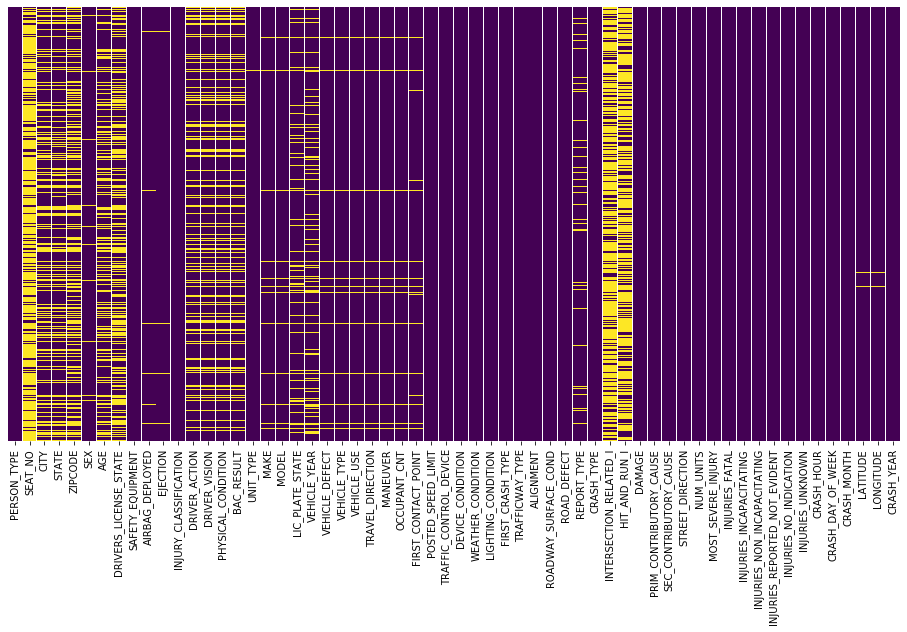

In [47]:
plt.figure(figsize=(16,8))
sns.heatmap(dfcovid195.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
df_dict = dict()
df_list = []
df_tuple = ()
for col in dfcovid195.columns:
    df_list.append(round(dfcovid195[col].isnull().sum()/dfcovid195.shape[0],6))
    #print(col, round(dfcovid195[col].isnull().sum()/dfcovid195.shape[0],6))

df_dict = {'features':list(dfcovid195.columns.values), 'nullValue':df_list}
df_tuple = list(zip(list(dfcovid195.columns.values), df_list)) 
dfcovid196 = pd.DataFrame(df_tuple, columns=['features', 'nullValue'])
dfcovid196.head(60)

,features,nullValue
0,PERSON_TYPE,0.000000
1,SEAT_NO,0.784602
2,CITY,0.282317
3,STATE,0.266107
4,ZIPCODE,0.357106
5,SEX,0.019184
6,AGE,0.299080
7,DRIVERS_LICENSE_STATE,0.439206
8,SAFETY_EQUIPMENT,0.003797
9,AIRBAG_DEPLOYED,0.021646


In [49]:
dfcovid197 = dfcovid196.set_index('features')
dfcovid197.head(60)

,nullValue
features,
PERSON_TYPE,0.000000
SEAT_NO,0.784602
CITY,0.282317
STATE,0.266107
ZIPCODE,0.357106
SEX,0.019184
AGE,0.299080
DRIVERS_LICENSE_STATE,0.439206
SAFETY_EQUIPMENT,0.003797


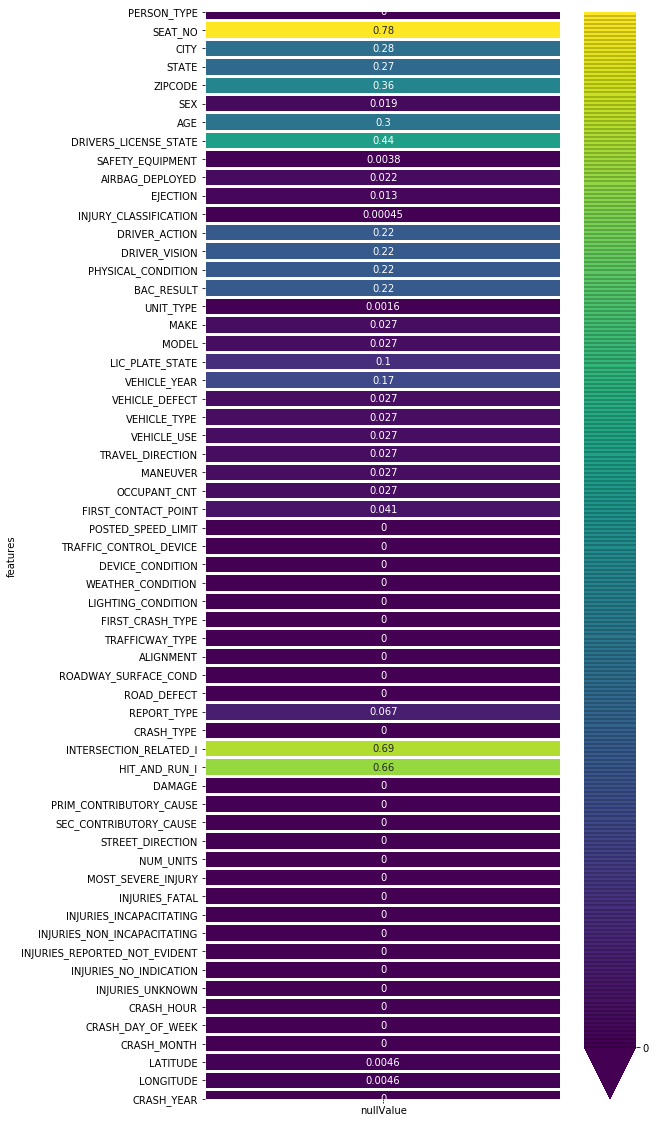

In [50]:
plt.figure(figsize=(8,20))
cbar_kws = {"orientation":"vertical", 
            "shrink":1.,
            'extend':'min', 
            'extendfrac':0.05, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(dfcovid197, yticklabels=True, cbar=True, cmap='viridis', linewidths=2, annot=True, cbar_kws=cbar_kws)

In [51]:
dfcovid195.loc[(dfcovid195['INTERSECTION_RELATED_I'].isnull()==True) & (dfcovid195['HIT_AND_RUN_I'].isnull()==True), ['SEAT_NO','INTERSECTION_RELATED_I','HIT_AND_RUN_I']]

,SEAT_NO,INTERSECTION_RELATED_I,HIT_AND_RUN_I
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
8,NaN,NaN,NaN
...,...,...,...
140897,NaN,NaN,NaN
140898,NaN,NaN,NaN
140899,NaN,NaN,NaN
140900,NaN,NaN,NaN


In [52]:
dfcovid195 = dfcovid195.dropna(subset=['INTERSECTION_RELATED_I','HIT_AND_RUN_I'], axis=0)
dfcovid195.shape

(11421, 60)

In [53]:
dfcovid195.loc[(dfcovid195['CITY'].isnull()==True) & (dfcovid195['STATE'].isnull()==True) & (dfcovid195['ZIPCODE'].isnull()==True) & (dfcovid195['DRIVERS_LICENSE_STATE'].isnull()==True) & (dfcovid195['LIC_PLATE_STATE'].isnull()==True), ['LATITUDE','LONGITUDE']]

,LATITUDE,LONGITUDE
49,41.899277,-87.702616
50,41.899277,-87.702616
425,41.772642,-87.640887
441,41.808977,-87.645657
753,41.869807,-87.643670
...,...,...
139363,41.949512,-87.771913
139749,41.903519,-87.662583
140055,41.887836,-87.757639
140459,41.935720,-87.702760


In [54]:
all_nulls = (dfcovid195['CITY'].isnull()==True) & (dfcovid195['STATE'].isnull()==True) & (dfcovid195['ZIPCODE'].isnull()==True) & (dfcovid195['DRIVERS_LICENSE_STATE'].isnull()==True) & (dfcovid195['LIC_PLATE_STATE'].isnull()==True) 
dfcovid195['is_null'] = 1
dfcovid195.loc[all_nulls, 'is_null'] = np.nan
dfcovid195['is_null'].value_counts(normalize=True, dropna=False)

1.0    0.928378
NaN    0.071622
Name: is_null, dtype: float64

In [55]:
dfcovid195 = dfcovid195.dropna(subset=['is_null'], axis=0)
dfcovid198 = dfcovid195.drop(['is_null'], axis=1)
dfcovid198.shape

(10603, 60)

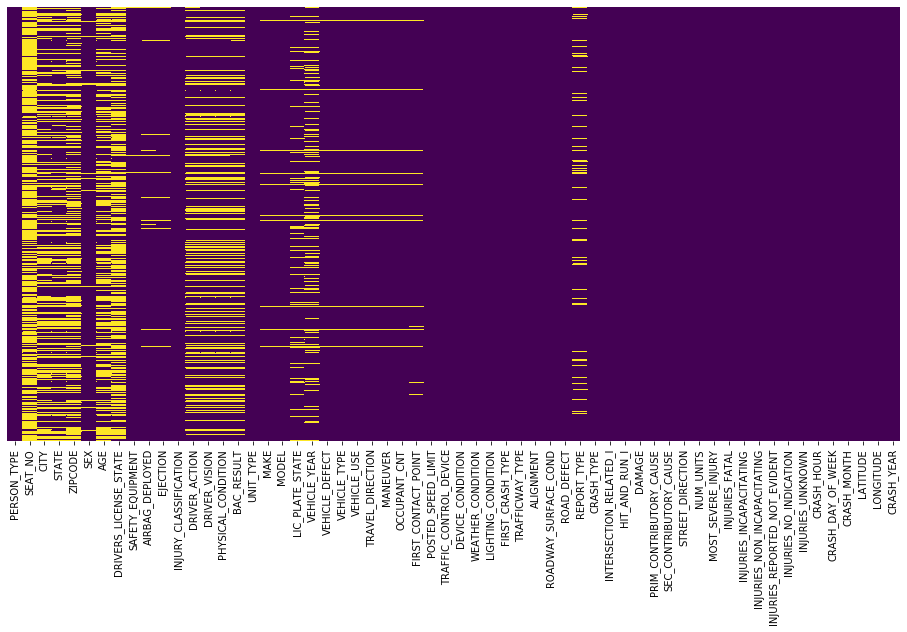

In [56]:
plt.figure(figsize=(16,8))
sns.heatmap(dfcovid198.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [57]:
df_dict = dict()
df_list = []
df_tuple = ()
for col in dfcovid198.columns:
    df_list.append(round(dfcovid198[col].isnull().sum()/dfcovid198.shape[0],6))
    #print(col, round(dfcovid198[col].isnull().sum()/dfcovid198.shape[0],6))

df_dict = {'features':list(dfcovid198.columns.values), 'nullValue':df_list}
df_tuple = list(zip(list(dfcovid198.columns.values), df_list)) 
dfcovid199 = pd.DataFrame(df_tuple, columns=['features', 'nullValue'])
dfcovid199.head(60)

,features,nullValue
0,PERSON_TYPE,0.000000
1,SEAT_NO,0.747053
2,CITY,0.389135
3,STATE,0.351787
4,ZIPCODE,0.469961
5,SEX,0.032632
6,AGE,0.426483
7,DRIVERS_LICENSE_STATE,0.557861
8,SAFETY_EQUIPMENT,0.005564
9,AIRBAG_DEPLOYED,0.030840


In [58]:
dfcovid200 = dfcovid199.set_index('features')
dfcovid200.head(60)

,nullValue
features,
PERSON_TYPE,0.000000
SEAT_NO,0.747053
CITY,0.389135
STATE,0.351787
ZIPCODE,0.469961
SEX,0.032632
AGE,0.426483
DRIVERS_LICENSE_STATE,0.557861
SAFETY_EQUIPMENT,0.005564


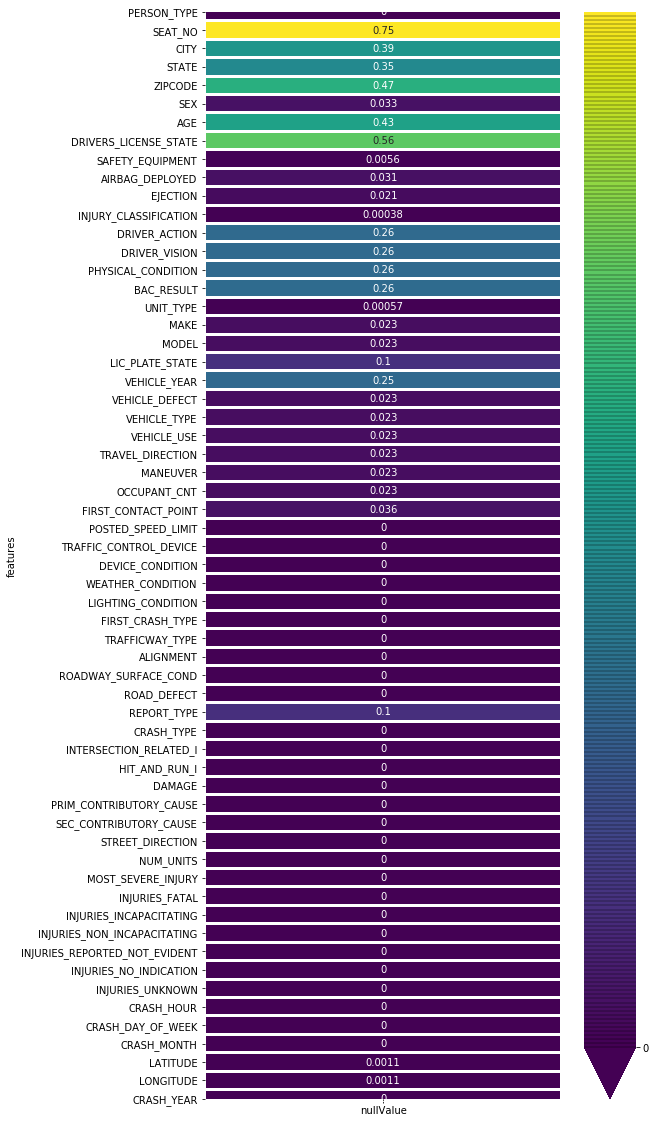

In [59]:
plt.figure(figsize=(8,20))
cbar_kws = {"orientation":"vertical", 
            "shrink":1.,
            'extend':'min', 
            'extendfrac':0.05, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(dfcovid200, yticklabels=True, cbar=True, cmap='viridis', linewidths=2, annot=True, cbar_kws=cbar_kws)

## replacement of useful (meaningful) features
### injury class

* MOST_SEVERE_INJURY

Most severe injury sustained by any person involved in the crash

unique values: 5 ('NaN' included) NaN exists? False

       * NO_INDICATION_OF_INJURY     0.772360
       * NONINCAPACITATING_INJURY    0.133320
       * REPORTED_NOT_EVIDENT        0.059559
       * INCAPACITATING_INJURY       0.031100
       * FATAL                       0.003662

Name: MOST_SEVERE_INJURY, dtype: float64

=========================================================================================

* INJURY_CLASSIFICATION

Severity of injury person sustained in the crash

unique values: 6 ('NaN' included) NaN exists? True

       * NO_INDICATION_OF_INJURY     0.887730
       * NONINCAPACITATING_INJURY    0.066145
       * REPORTED_NOT_EVIDENT        0.031667
       * INCAPACITATING_INJURY       0.012903
       * FATAL                       0.001100
       * NaN                         0.000454

Name: INJURY_CLASSIFICATION, dtype: float64

In [60]:
dfcovid198[dfcovid198['INJURY_CLASSIFICATION']==dfcovid198['MOST_SEVERE_INJURY']].shape[0]/dfcovid198.shape[0]

0.8243893237762897

In [61]:
dfcovid198['MOST_SEVERE_INJURY'] = dfcovid198['MOST_SEVERE_INJURY'].replace({'FATAL': 4, 'INCAPACITATING_INJURY': 3, 'NONINCAPACITATING_INJURY': 2, 'REPORTED_NOT_EVIDENT': 1, 'NO_INDICATION_OF_INJURY': 0})
dfcovid198['MOST_SEVERE_INJURY'].value_counts(normalize=True, dropna=False)

0    0.686975
2    0.187966
1    0.076205
3    0.040649
4    0.008205
Name: MOST_SEVERE_INJURY, dtype: float64

### injury count

* NUM_UNITS

    Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or another non-passenger roadway user. Each unit represents a mode of traffic with an independent trajectory.

    unique values: 11 ('NaN' included) NaN exists? False
    

       * 2     0.796468
       * 3     0.123660
       * 4     0.037892
       * 1     0.017707
       * 5     0.013442
       * 6     0.006558
       * 7     0.002158
       * 14    0.001093
       * 8     0.000625
       * 9     0.000319
       * 11    0.000078

    Name: NUM_UNITS, dtype: float64
    
=========================================================================================

* OCCUPANT_CNT	       

    The number of people in the unit, as determined by the reporting officer

    OCCUPANT_CNT unique values: 16 ('NaN' included) NaN exists? True
    

       * 1.0     0.626279
       * 2.0     0.160303
       * 0.0     0.090808
       * 3.0     0.053136
       * 4.0     0.027601
       * NaN     0.026955
       * 5.0     0.009780
       * 6.0     0.002889
       * 7.0     0.001235
       * 8.0     0.000305
       * 11.0    0.000177
       * 12.0    0.000177
       * 14.0    0.000106
       * 13.0    0.000099
       * 10.0    0.000078
       * 9.0     0.000071

    Name: OCCUPANT_CNT, dtype: float64
    
=========================================================================================

* PERSON_TYPE

    Type of roadway user involved in crash

    unique values: 6 ('NaN' included) NaN exists? False
    

       * DRIVER                 0.762040
       * PASSENGER              0.215398
       * PEDESTRIAN             0.011653
       * BICYCLE                0.009269
       * NON_MOTOR_VEHICLE      0.001249
       * NON_CONTACT_VEHICLE    0.000390

    Name: PERSON_TYPE, dtype: float64
    
=========================================================================================

* CRASH_TYPE	    

    A general severity classification for the crash. 
    Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

    unique values: 2 ('NaN' included) NaN exists? False
    

       * NO_INJURY_DRIVE_AWAY              0.597408
       * INJURY_AND_OR_TOW_DUE_TO_CRASH    0.402592
   
    Name: CRASH_TYPE, dtype: float64

In [62]:
dfcovid198 = dfcovid198.dropna(subset=['OCCUPANT_CNT'], axis=0)
dfcovid198.shape

(10354, 60)

In [63]:
dfcovid198['INJURIES_SUM'] = dfcovid198['INJURIES_FATAL'] + dfcovid198['INJURIES_INCAPACITATING'] + dfcovid198['INJURIES_NON_INCAPACITATING'] + dfcovid198['INJURIES_REPORTED_NOT_EVIDENT'] + dfcovid198['INJURIES_NO_INDICATION'] + dfcovid198['INJURIES_UNKNOWN']
dfcovid198[dfcovid198['INJURIES_SUM']>=dfcovid198['OCCUPANT_CNT']].shape[0]/dfcovid198.shape[0]

1.0

In [64]:
dfcovid201 = dfcovid198.drop(['SEAT_NO','INJURY_CLASSIFICATION','INJURIES_SUM','OCCUPANT_CNT'], axis=1)
dfcovid201.shape

(10354, 57)

### removal of NaN rows
#### Vehicle @ 4.2 for removal of erratic symbols in object-type data points

* VEHICLE_DEFECT	

    unique values: 17 ('NaN' included) NaN exists? True

        * NONE                0.508268  (0)
        * UNKNOWN             0.454479  (-1)
        * NaN                 0.026955
        * BRAKES              0.004386  (1)
        * OTHER               0.004230  (2)
        * TIRES               0.000561  (3)
        * STEERING            0.000461  (4)
        * WHEELS              0.000241  (5) 
        * SUSPENSION          0.000114  (6)
        * LIGHTS              0.000078  (7)
        * ENGINE_MOTOR        0.000071  (8)
        * CARGO               0.000057  (9)
        * WINDOWS             0.000035  (10)
        * FUEL_SYSTEM         0.000028  (11)
        * SIGNALS             0.000014  (12)
        * RESTRAINT_SYSTEM    0.000014  (13)
        * EXHAUST             0.000007  (14)

    Name: VEHICLE_DEFECT, dtype: float64
    

* VEHICLE_TYPE	

    unique values: 21 ('NaN' included) NaN exists? True

        * PASSENGER                               0.645342 (1)
        * SPORT_UTILITY_VEHICLE_SUV               0.119516 (2)
        * UNKNOWN_NA                              0.075968 (-1)
        * VAN_MINI_VAN                            0.046380 (3)
        * PICKUP                                  0.033321 (4)
        * NaN                                     0.026955
        * TRUCK_SINGLE_UNIT                       0.015067 (5)
        * OTHER                                   0.010404 (6)
        * BUS_OVER_15_PASS                        0.008595 (7)
        * TRACTOR_WSEMI_TRAILER                   0.007729 (8)
        * MOTORCYCLE_OVER_150CC                   0.004535 (9)
        * SINGLE_UNIT_TRUCK_WITH_TRAILER          0.002150 (10)
        * TRACTOR_W_O_SEMI_TRAILER                0.001235 (11)
        * OTHER_VEHICLE_WITH_TRAILER              0.001022 (12)
        * BUS_UP_TO_15_PASS                       0.000866 (13)
        * MOPED_OR_MOTORIZED_BICYCLE              0.000504 (14)
        * ALL_TERRAIN_VEHICLE_ATV                 0.000270 (15)
        * AUTOCYCLE                               0.000057 (16)
        * 3_WHEELED_MOTORCYCLE_2_REAR_WHEELS      0.000050 (17)
        * FARM_EQUIPMENT                          0.000028 (18)
        * RECREATIONAL_OFF_HIGHWAY_VEHICLE_ROV    0.000007 (19)
        
     Name: VEHICLE_TYPE, dtype: float64
     

* VEHICLE_USE	

    unique values: 25 ('NaN' included) NaN exists? True

        * PERSONAL                      0.674419 (1)
        * UNKNOWN_NA                    0.184866 (-1)
        * NOT_IN_USE                    0.037168 (0)
        * OTHER                         0.027147 (2)
        * NaN                           0.026955
        * POLICE                        0.011696 (3)
        * COMMERCIAL_SINGLE_UNIT        0.009766 (4)
        * CTA                           0.007601 (5)
        * RIDESHARE_SERVICE             0.005067 (6)
        * CONSTRUCTION_MAINTENANCE      0.004159 (7)
        * COMMERCIAL_MULTI_UNIT         0.002491 (8)
        * TOW_TRUCK                     0.001945 (9)
        * TAXI_FOR_HIRE                 0.001817 (10)
        * AMBULANCE                     0.001519 (11)
        * FIRE                          0.001270 (12)
        * DRIVER_EDUCATION              0.000610 (13)
        * STATE_OWNED                   0.000561 (14)
        * LAWN_CARE_LANDSCAPING         0.000483 (15)
        * AGRICULTURE                   0.000206 (16)
        * SCHOOL_BUS                    0.000121 (17)
        * HOUSE_TRAILER                 0.000043 (18)
        * OTHER_TRANSIT                 0.000035 (19)
        * MILITARY                      0.000035 (20)
        * CAMPER_RV_TOWED_MULTI_UNIT    0.000014 (21)
        * CAMPER_RV_SINGLE_UNIT         0.000007 (22)
        
     Name: VEHICLE_USE, dtype: float64


* TRAVEL_DIRECTION	

    unique values: 10 ('NaN' included) NaN exists? True

        * S          0.232963 (10)
        * N          0.231026 (20)
        * W          0.214823 (30)
        * E          0.209600 (40)
        * UNKNOWN    0.045287 (0)
        * NaN        0.026955
        * SE         0.011462 (14)
        * NW         0.010341 (23)
        * NE         0.009269 (24)
        * SW         0.008275 (13)

    Name: TRAVEL_DIRECTION, dtype: float64


* MANEUVER	

    unique values: 26 ('NaN' included) NaN exists? True

        * STRAIGHT_AHEAD                        0.511121 (1)
        * PARKED                                0.099523 (2)
        * SLOW_STOP_IN_TRAFFIC                  0.076138 (3)
        * TURNING_LEFT                          0.063945 (4)
        * UNKNOWN_NA                            0.055571 (0)
        * BACKING                               0.033413 (5)
        * TURNING_RIGHT                         0.030511 (6)
        * NaN                                   0.026955 
        * PASSING_OVERTAKING                    0.021057 (7)
        * OTHER                                 0.018048 (8)
        * CHANGING_LANES                        0.014521 (9)
        * ENTERING_TRAFFIC_LANE_FROM_PARKING    0.009759 (10)
        * U_TURN                                0.007204 (11)
        * STARTING_IN_TRAFFIC                   0.005727 (12)
        * MERGING                               0.005174 (13)
        * AVOIDING_VEHICLES_OBJECTS             0.004528 (14)
        * ENTER_FROM_DRIVE_ALLEY                0.004081 (15)
        * LEAVING_TRAFFIC_LANE_TO_PARK          0.003329 (16)
        * SKIDDING_CONTROL_LOSS                 0.002889 (17)
        * DRIVING_WRONG_WAY                     0.002299 (18)
        * PARKED_IN_TRAFFIC_LANE                0.002016 (19)
        * NEGOTIATING_A_CURVE                   0.001128 (20)
        * TURNING_ON_RED                        0.000539 (21)
        * DRIVERLESS                            0.000334 (22)
        * DIVERGING                             0.000114 (23)
        * DISABLED                              0.000078 (24)

    Name: MANEUVER, dtype: float64

In [65]:
all_nulls = (dfcovid201['VEHICLE_DEFECT'].isnull()==True) | (dfcovid201['VEHICLE_TYPE'].isnull()==True) | (dfcovid201['VEHICLE_USE'].isnull()==True) | (dfcovid201['TRAVEL_DIRECTION'].isnull()==True) | (dfcovid201['MANEUVER'].isnull()==True) 
dfcovid201['is_null'] = 1
dfcovid201.loc[all_nulls, 'is_null'] = np.nan
dfcovid201['is_null'].value_counts(normalize=True, dropna=False)

1.0    1.0
Name: is_null, dtype: float64

In [66]:
dfcovid201 = dfcovid201.dropna(subset=['is_null'], axis=0)
dfcovid202 = dfcovid201.drop(['is_null'], axis=1)
dfcovid202.shape

(10354, 57)

In [67]:
dfcovid202['VEHICLE_DEFECT'].value_counts(dropna=False)

UNKNOWN     6184
NONE        4091
OTHER         50
BRAKES        16
WHEELS         4
LIGHTS         4
STEERING       3
WINDOWS        1
TIRES          1
Name: VEHICLE_DEFECT, dtype: int64

In [68]:
dfcovid202['VEHICLE_DEFECT'] = dfcovid202['VEHICLE_DEFECT'].replace({'UNKNOWN': -1, 'NONE': 0, 'OTHER': 1, 'BRAKES': 2, 'WHEELS': 3, 'STEERING': 3, 'LIGHTS': 3, 'TIRES': 4, 'WINDOWS': 4})
dfcovid202['VEHICLE_DEFECT'].value_counts(normalize=True, dropna=False)

-1    0.597257
 0    0.395113
 1    0.004829
 2    0.001545
 3    0.001062
 4    0.000193
Name: VEHICLE_DEFECT, dtype: float64

In [69]:
dfcovid202['VEHICLE_TYPE'].value_counts(dropna=False)

PASSENGER                         6995
SPORT_UTILITY_VEHICLE_SUV         1197
UNKNOWN_NA                        1118
VAN_MINI_VAN                       398
PICKUP                             294
BUS_OVER_15_PASS                    99
TRUCK_SINGLE_UNIT                   85
MOTORCYCLE_OVER_150CC               81
TRACTOR_WSEMI_TRAILER               37
OTHER                               23
TRACTOR_W_O_SEMI_TRAILER             8
BUS_UP_TO_15_PASS                    7
ALL_TERRAIN_VEHICLE_ATV              5
SINGLE_UNIT_TRUCK_WITH_TRAILER       4
MOPED_OR_MOTORIZED_BICYCLE           2
AUTOCYCLE                            1
Name: VEHICLE_TYPE, dtype: int64

In [70]:
vehicle_type_dict = {}
vehicle_type_dict['PASSENGER'] = 1
vehicle_type_dict['SPORT_UTILITY_VEHICLE_SUV'] = 2
vehicle_type_dict['UNKNOWN_NA'] = -1
vehicle_type_dict['VAN_MINI_VAN'] = 3
vehicle_type_dict['PICKUP'] = 4
vehicle_type_dict['BUS_OVER_15_PASS'] = 5
vehicle_type_dict['MOTORCYCLE_OVER_150CC'] = 6
vehicle_type_dict['TRUCK_SINGLE_UNIT'] = 7
vehicle_type_dict['TRACTOR_WSEMI_TRAILER'] = 8
vehicle_type_dict['OTHER'] = 9
vehicle_type_dict['TRACTOR_W_O_SEMI_TRAILER'] = 10
vehicle_type_dict['BUS_UP_TO_15_PASS'] = 10
vehicle_type_dict['ALL_TERRAIN_VEHICLE_ATV'] = 11
vehicle_type_dict['SINGLE_UNIT_TRUCK_WITH_TRAILER'] = 12
vehicle_type_dict['MOPED_OR_MOTORIZED_BICYCLE'] = 13
vehicle_type_dict['AUTOCYCLE'] = 13
vehicle_type_dict

{'PASSENGER': 1,
 'SPORT_UTILITY_VEHICLE_SUV': 2,
 'UNKNOWN_NA': -1,
 'VAN_MINI_VAN': 3,
 'PICKUP': 4,
 'BUS_OVER_15_PASS': 5,
 'MOTORCYCLE_OVER_150CC': 6,
 'TRUCK_SINGLE_UNIT': 7,
 'TRACTOR_WSEMI_TRAILER': 8,
 'OTHER': 9,
 'TRACTOR_W_O_SEMI_TRAILER': 10,
 'BUS_UP_TO_15_PASS': 10,
 'ALL_TERRAIN_VEHICLE_ATV': 11,
 'SINGLE_UNIT_TRUCK_WITH_TRAILER': 12,
 'MOPED_OR_MOTORIZED_BICYCLE': 13,
 'AUTOCYCLE': 13}

In [71]:
dfcovid202['VEHICLE_TYPE'] = dfcovid202['VEHICLE_TYPE'].replace(vehicle_type_dict)
dfcovid202['VEHICLE_TYPE'].value_counts(normalize=True, dropna=False)

 1     0.675584
 2     0.115607
-1     0.107978
 3     0.038439
 4     0.028395
 5     0.009562
 7     0.008209
 6     0.007823
 8     0.003573
 9     0.002221
 10    0.001449
 11    0.000483
 12    0.000386
 13    0.000290
Name: VEHICLE_TYPE, dtype: float64

In [72]:
dfcovid202['VEHICLE_USE'].value_counts(dropna=False)

PERSONAL                    6290
UNKNOWN_NA                  3405
OTHER                        205
NOT_IN_USE                   124
CTA                           90
RIDESHARE_SERVICE             74
POLICE                        69
COMMERCIAL_SINGLE_UNIT        35
CONSTRUCTION_MAINTENANCE      26
COMMERCIAL_MULTI_UNIT          7
TOW_TRUCK                      6
TAXI_FOR_HIRE                  6
AMBULANCE                      6
SCHOOL_BUS                     5
DRIVER_EDUCATION               3
STATE_OWNED                    2
FIRE                           1
Name: VEHICLE_USE, dtype: int64

In [73]:
vehicle_use_dict = {}
vehicle_use_dict['PERSONAL'] = 1
vehicle_use_dict['UNKNOWN_NA'] = -1
vehicle_use_dict['OTHER'] = 2 
vehicle_use_dict['NOT_IN_USE'] = 0
vehicle_use_dict['CTA'] = 3
vehicle_use_dict['POLICE'] = 4
vehicle_use_dict['RIDESHARE_SERVICE'] = 5
vehicle_use_dict['COMMERCIAL_SINGLE_UNIT'] = 6
vehicle_use_dict['CONSTRUCTION_MAINTENANCE'] = 7
vehicle_use_dict['AMBULANCE'] = 8
vehicle_use_dict['TOW_TRUCK'] = 9
vehicle_use_dict['COMMERCIAL_MULTI_UNIT'] = 10
vehicle_use_dict['SCHOOL_BUS'] = 11
vehicle_use_dict['TAXI_FOR_HIRE'] = 11
vehicle_use_dict['DRIVER_EDUCATION'] = 12
vehicle_use_dict['FIRE'] = 13
vehicle_use_dict['STATE_OWNED'] = 13
vehicle_use_dict

{'PERSONAL': 1,
 'UNKNOWN_NA': -1,
 'OTHER': 2,
 'NOT_IN_USE': 0,
 'CTA': 3,
 'POLICE': 4,
 'RIDESHARE_SERVICE': 5,
 'COMMERCIAL_SINGLE_UNIT': 6,
 'CONSTRUCTION_MAINTENANCE': 7,
 'AMBULANCE': 8,
 'TOW_TRUCK': 9,
 'COMMERCIAL_MULTI_UNIT': 10,
 'SCHOOL_BUS': 11,
 'TAXI_FOR_HIRE': 11,
 'DRIVER_EDUCATION': 12,
 'FIRE': 13,
 'STATE_OWNED': 13}

In [74]:
dfcovid202['VEHICLE_USE'] = dfcovid202['VEHICLE_USE'].replace(vehicle_use_dict)
dfcovid202['VEHICLE_USE'].value_counts(normalize=True, dropna=False)

 1     0.607495
-1     0.328858
 2     0.019799
 0     0.011976
 3     0.008692
 5     0.007147
 4     0.006664
 6     0.003380
 7     0.002511
 11    0.001062
 10    0.000676
 9     0.000579
 8     0.000579
 13    0.000290
 12    0.000290
Name: VEHICLE_USE, dtype: float64

In [75]:
dfcovid202['TRAVEL_DIRECTION'].value_counts(dropna=False)

S          2568
W          2464
N          2452
E          2175
UNKNOWN     186
SE          155
NE          122
SW          119
NW          113
Name: TRAVEL_DIRECTION, dtype: int64

In [76]:
travel_direction_dict = {}
travel_direction_dict['S'] = 1
travel_direction_dict['W'] = 2
travel_direction_dict['N'] = 3 
travel_direction_dict['E'] = 4
travel_direction_dict['UNKNOWN'] = -1
travel_direction_dict['SE'] = 5
travel_direction_dict['SW'] = 6
travel_direction_dict['NW'] = 7
travel_direction_dict['NE'] = 8
travel_direction_dict

{'S': 1,
 'W': 2,
 'N': 3,
 'E': 4,
 'UNKNOWN': -1,
 'SE': 5,
 'SW': 6,
 'NW': 7,
 'NE': 8}

In [77]:
dfcovid202['TRAVEL_DIRECTION'] = dfcovid202['TRAVEL_DIRECTION'].replace(travel_direction_dict)
dfcovid202['TRAVEL_DIRECTION'].value_counts(normalize=True, dropna=False)

 1    0.248020
 2    0.237976
 3    0.236817
 4    0.210064
-1    0.017964
 5    0.014970
 8    0.011783
 6    0.011493
 7    0.010914
Name: TRAVEL_DIRECTION, dtype: float64

In [78]:
dfcovid202['MANEUVER'].value_counts(dropna=False)

STRAIGHT_AHEAD                        6422
TURNING_LEFT                           971
SLOW_STOP_IN_TRAFFIC                   872
TURNING_RIGHT                          508
UNKNOWN_NA                             494
PARKED                                 323
PASSING_OVERTAKING                     263
OTHER                                  107
CHANGING_LANES                          78
STARTING_IN_TRAFFIC                     61
BACKING                                 55
U_TURN                                  35
DRIVING_WRONG_WAY                       32
AVOIDING_VEHICLES_OBJECTS               28
SKIDDING_CONTROL_LOSS                   26
MERGING                                 25
TURNING_ON_RED                          23
ENTER_FROM_DRIVE_ALLEY                  15
ENTERING_TRAFFIC_LANE_FROM_PARKING      12
DIVERGING                                3
DRIVERLESS                               1
Name: MANEUVER, dtype: int64

In [79]:
maneuver_dict = {}
maneuver_dict['STRAIGHT_AHEAD'] = 1
maneuver_dict['TURNING_LEFT'] = 2
maneuver_dict['SLOW_STOP_IN_TRAFFIC'] = 3 
maneuver_dict['TURNING_RIGHT'] = 4
maneuver_dict['UNKNOWN_NA'] = -1
maneuver_dict['PARKED'] = 5
maneuver_dict['PASSING_OVERTAKING'] = 6
maneuver_dict['OTHER'] = 7
maneuver_dict['CHANGING_LANES'] = 8
maneuver_dict['STARTING_IN_TRAFFIC'] = 9
maneuver_dict['BACKING'] = 10
maneuver_dict['DRIVING_WRONG_WAY'] = 11
maneuver_dict['U_TURN'] = 12
maneuver_dict['MERGING'] = 13
maneuver_dict['AVOIDING_VEHICLES_OBJECTS'] = 13
maneuver_dict['SKIDDING_CONTROL_LOSS'] = 14
maneuver_dict['TURNING_ON_RED'] = 15
maneuver_dict['ENTER_FROM_DRIVE_ALLEY'] = 16
maneuver_dict['ENTERING_TRAFFIC_LANE_FROM_PARKING'] = 17
maneuver_dict['DIVERGING'] = 18
maneuver_dict['DRIVERLESS'] = 19
maneuver_dict

{'STRAIGHT_AHEAD': 1,
 'TURNING_LEFT': 2,
 'SLOW_STOP_IN_TRAFFIC': 3,
 'TURNING_RIGHT': 4,
 'UNKNOWN_NA': -1,
 'PARKED': 5,
 'PASSING_OVERTAKING': 6,
 'OTHER': 7,
 'CHANGING_LANES': 8,
 'STARTING_IN_TRAFFIC': 9,
 'BACKING': 10,
 'DRIVING_WRONG_WAY': 11,
 'U_TURN': 12,
 'MERGING': 13,
 'AVOIDING_VEHICLES_OBJECTS': 13,
 'SKIDDING_CONTROL_LOSS': 14,
 'TURNING_ON_RED': 15,
 'ENTER_FROM_DRIVE_ALLEY': 16,
 'ENTERING_TRAFFIC_LANE_FROM_PARKING': 17,
 'DIVERGING': 18,
 'DRIVERLESS': 19}

In [80]:
dfcovid202['MANEUVER'] = dfcovid202['MANEUVER'].replace(maneuver_dict)
dfcovid202['MANEUVER'].value_counts(normalize=True, dropna=False)

 1     0.620243
 2     0.093780
 3     0.084219
 4     0.049063
-1     0.047711
 5     0.031196
 6     0.025401
 7     0.010334
 8     0.007533
 9     0.005891
 10    0.005312
 13    0.005119
 12    0.003380
 11    0.003091
 14    0.002511
 15    0.002221
 16    0.001449
 17    0.001159
 18    0.000290
 19    0.000097
Name: MANEUVER, dtype: float64

#### People for 4.2 : removal of erratic symbols in object-type data points

* DRIVER_ACTION	

    unique values: 20 ('NaN' included) NaN exists? True

        * NONE                                 0.266327 (0)
        * NaN                                  0.218244
        * UNKNOWN                              0.215597 (-1)
        * OTHER                                0.071397 (1)
        * FAILED_TO_YIELD                      0.067040 (2)
        * FOLLOWED_TOO_CLOSELY                 0.042654 (3)
        * IMPROPER_BACKING                     0.021781 (4)
        * DISREGARDED_CONTROL_DEVICES          0.019503 (5)
        * IMPROPER_TURN                        0.018985 (6)
        * IMPROPER_LANE_CHANGE                 0.015926 (7)
        * IMPROPER_PASSING                     0.015238 (8)
        * TOO_FAST_FOR_CONDITIONS              0.013073 (9)
        * WRONG_WAY_SIDE                       0.004883 (10)
        * IMPROPER_PARKING                     0.002647 (11)
        * OVERCORRECTED                        0.002328 (12)
        * EVADING_POLICE_VEHICLE               0.001938 (13)
        * EMERGENCY_VEHICLE_ON_CALL            0.001207 (14)
        * CELL_PHONE_USE_OTHER_THAN_TEXTING    0.000852 (15)
        * TEXTING                              0.000348 (16)
        * LICENSE_RESTRICTIONS                 0.000035 (17)

     Name: DRIVER_ACTION, dtype: float64


* DRIVER_VISION

    unique values: 14 ('NaN' included) NaN exists? True
    
        * UNKNOWN                 0.390718 (-1)
        * NOT_OBSCURED            0.374076 (1)
        * NaN                     0.218542
        * OTHER                   0.007445 (2)
        * PARKED_VEHICLES         0.002789 (3)
        * MOVING_VEHICLES         0.002711 (4)
        * WINDSHIELD_WATER_ICE    0.001945 (5)
        * BLINDED_SUNLIGHT        0.000823 (6)
        * TREES_PLANTS            0.000525 (7)
        * BUILDINGS               0.000263 (8)
        * HILLCREST               0.000064 (9)
        * BLOWING_MATERIALS       0.000057 (10)
        * BLINDED_HEADLIGHTS      0.000028 (11)
        * SIGNBOARD               0.000014 (12)

    Name: DRIVER_VISION, dtype: float64


* PHYSICAL_CONDITION	

    unique values: 13 ('NaN' included) NaN exists? True
    
    
        * NORMAL                        0.489915 (1)
        * UNKNOWN                       0.272140 (-1)
        * NaN                           0.217612
        * IMPAIRED_ALCOHOL              0.005514 (2)
        * REMOVED_BY_EMS                0.003634 (3)
        * OTHER                         0.002839 (4)
        * FATIGUED_ASLEEP               0.002519 (5)
        * EMOTIONAL                     0.002342 (6)
        * ILLNESS_FAINTED               0.001128 (7)
        * IMPAIRED_DRUGS                0.000979 (8)
        * HAD_BEEN_DRINKING             0.000617 (9)
        * IMPAIRED_ALCOHOL_AND_DRUGS    0.000589 (10)
        * MEDICATED                     0.000170 (11)
        
    Name: PHYSICAL_CONDITION, dtype: float64
    

* BAC_RESULT	

    unique values: 5 ('NaN' included) NaN exists? True
    

        TEST_NOT_OFFERED                  0.766483 (0)
        NaN                               0.218223
        TEST_REFUSED                      0.010241 (1) 
        TEST_TAKEN                        0.002541 (2)
        TEST_PERFORMED_RESULTS_UNKNOWN    0.002512 (-1)

    Name: BAC_RESULT, dtype: float64


In [81]:
all_nulls = (dfcovid202['DRIVER_ACTION'].isnull()==True) & (dfcovid202['DRIVER_VISION'].isnull()==True) & (dfcovid202['PHYSICAL_CONDITION'].isnull()==True) & (dfcovid202['BAC_RESULT'].isnull()==True) 
dfcovid202['is_null'] = 1
dfcovid202.loc[all_nulls, 'is_null'] = np.nan
dfcovid202['is_null'].value_counts(normalize=True, dropna=False)

1.0    0.743481
NaN    0.256519
Name: is_null, dtype: float64

In [82]:
dfcovid202 = dfcovid202.dropna(subset=['is_null'], axis=0)
dfcovid203 = dfcovid202.drop(['is_null'], axis=1)
dfcovid203.shape

(7698, 57)

In [83]:
dfcovid203['DRIVER_ACTION'].value_counts(dropna=False)

NONE                                 3124
UNKNOWN                              1817
DISREGARDED_CONTROL_DEVICES           647
FAILED_TO_YIELD                       606
OTHER                                 444
FOLLOWED_TOO_CLOSELY                  300
IMPROPER_TURN                         213
TOO_FAST_FOR_CONDITIONS               140
IMPROPER_PASSING                      127
IMPROPER_LANE_CHANGE                  119
IMPROPER_BACKING                       43
WRONG_WAY_SIDE                         42
EVADING_POLICE_VEHICLE                 38
EMERGENCY_VEHICLE_ON_CALL              12
NaN                                    10
OVERCORRECTED                           8
CELL_PHONE_USE_OTHER_THAN_TEXTING       4
TEXTING                                 4
Name: DRIVER_ACTION, dtype: int64

In [84]:
driver_action_dict = {}
driver_action_dict['NONE'] = 0
driver_action_dict['UNKNOWN'] = -1
driver_action_dict['OTHER'] = 1 
driver_action_dict['FAILED_TO_YIELD'] = 2
driver_action_dict['DISREGARDED_CONTROL_DEVICES'] = 3
driver_action_dict['FOLLOWED_TOO_CLOSELY'] = 4
driver_action_dict['IMPROPER_TURN'] = 5
driver_action_dict['TOO_FAST_FOR_CONDITIONS'] = 6
driver_action_dict['IMPROPER_PASSING'] = 7
driver_action_dict['IMPROPER_LANE_CHANGE'] = 8
driver_action_dict['EVADING_POLICE_VEHICLE'] = 9
driver_action_dict['WRONG_WAY_SIDE'] = 10
driver_action_dict['EMERGENCY_VEHICLE_ON_CALL'] = 11
driver_action_dict['IMPROPER_BACKING'] = 12
driver_action_dict['OVERCORRECTED'] = 13
driver_action_dict['CELL_PHONE_USE_OTHER_THAN_TEXTING'] = 14
driver_action_dict['TEXTING'] = 14
driver_action_dict

{'NONE': 0,
 'UNKNOWN': -1,
 'OTHER': 1,
 'FAILED_TO_YIELD': 2,
 'DISREGARDED_CONTROL_DEVICES': 3,
 'FOLLOWED_TOO_CLOSELY': 4,
 'IMPROPER_TURN': 5,
 'TOO_FAST_FOR_CONDITIONS': 6,
 'IMPROPER_PASSING': 7,
 'IMPROPER_LANE_CHANGE': 8,
 'EVADING_POLICE_VEHICLE': 9,
 'WRONG_WAY_SIDE': 10,
 'EMERGENCY_VEHICLE_ON_CALL': 11,
 'IMPROPER_BACKING': 12,
 'OVERCORRECTED': 13,
 'CELL_PHONE_USE_OTHER_THAN_TEXTING': 14,
 'TEXTING': 14}

In [85]:
dfcovid203['DRIVER_ACTION'] = dfcovid203['DRIVER_ACTION'].replace(driver_action_dict)
dfcovid203['DRIVER_ACTION'].value_counts(normalize=True, dropna=False)

 0.0     0.405820
-1.0     0.236035
 3.0     0.084048
 2.0     0.078722
 1.0     0.057677
 4.0     0.038971
 5.0     0.027670
 6.0     0.018187
 7.0     0.016498
 8.0     0.015459
 12.0    0.005586
 10.0    0.005456
 9.0     0.004936
 11.0    0.001559
 NaN     0.001299
 13.0    0.001039
 14.0    0.001039
Name: DRIVER_ACTION, dtype: float64

In [86]:
dfcovid203['DRIVER_ACTION'].fillna(12, inplace=True)
dfcovid203['DRIVER_ACTION'].value_counts(normalize=True, dropna=False)

 0.0     0.405820
-1.0     0.236035
 3.0     0.084048
 2.0     0.078722
 1.0     0.057677
 4.0     0.038971
 5.0     0.027670
 6.0     0.018187
 7.0     0.016498
 8.0     0.015459
 12.0    0.006885
 10.0    0.005456
 9.0     0.004936
 11.0    0.001559
 14.0    0.001039
 13.0    0.001039
Name: DRIVER_ACTION, dtype: float64

In [87]:
dfcovid203['DRIVER_VISION'].value_counts(dropna=False)

UNKNOWN                 4525
NOT_OBSCURED            3096
OTHER                     30
WINDSHIELD_WATER_ICE      16
NaN                       12
PARKED_VEHICLES            8
BUILDINGS                  5
MOVING_VEHICLES            5
BLINDED_SUNLIGHT           1
Name: DRIVER_VISION, dtype: int64

In [88]:
driver_vision_dict = {}
driver_vision_dict['NOT_OBSCURED'] = 1
driver_vision_dict['UNKNOWN'] = -1
driver_vision_dict['OTHER'] = 2 
driver_vision_dict['WINDSHIELD_WATER_ICE'] = 3
driver_vision_dict['PARKED_VEHICLES'] = 4
driver_vision_dict['MOVING_VEHICLES'] = 5
driver_vision_dict['BUILDINGS'] = 6
driver_vision_dict['BLINDED_SUNLIGHT'] = 7
driver_vision_dict

{'NOT_OBSCURED': 1,
 'UNKNOWN': -1,
 'OTHER': 2,
 'WINDSHIELD_WATER_ICE': 3,
 'PARKED_VEHICLES': 4,
 'MOVING_VEHICLES': 5,
 'BUILDINGS': 6,
 'BLINDED_SUNLIGHT': 7}

In [89]:
dfcovid203['DRIVER_VISION'] = dfcovid203['DRIVER_VISION'].replace(driver_vision_dict)
dfcovid203['DRIVER_VISION'].value_counts(normalize=True, dropna=False)

-1.0    0.587815
 1.0    0.402182
 2.0    0.003897
 3.0    0.002078
 NaN    0.001559
 4.0    0.001039
 5.0    0.000650
 6.0    0.000650
 7.0    0.000130
Name: DRIVER_VISION, dtype: float64

In [90]:
dfcovid203['DRIVER_VISION'].fillna(3, inplace=True)
dfcovid203['DRIVER_VISION'].value_counts(normalize=True, dropna=False)

-1.0    0.587815
 1.0    0.402182
 2.0    0.003897
 3.0    0.003637
 4.0    0.001039
 5.0    0.000650
 6.0    0.000650
 7.0    0.000130
Name: DRIVER_VISION, dtype: float64

In [91]:
dfcovid203['PHYSICAL_CONDITION'].value_counts(dropna=False)

NORMAL               3880
UNKNOWN              3663
IMPAIRED_ALCOHOL       41
REMOVED_BY_EMS         34
EMOTIONAL              28
OTHER                  23
HAD_BEEN_DRINKING      16
NaN                    10
IMPAIRED_DRUGS          2
ILLNESS_FAINTED         1
Name: PHYSICAL_CONDITION, dtype: int64

In [92]:
phys_condition_dict = {}
phys_condition_dict['NORMAL'] = 1
phys_condition_dict['UNKNOWN'] = -1
phys_condition_dict['IMPAIRED_ALCOHOL'] = 2 
phys_condition_dict['REMOVED_BY_EMS'] = 3
phys_condition_dict['EMOTIONAL'] = 4
phys_condition_dict['OTHER'] = 5
phys_condition_dict['HAD_BEEN_DRINKING'] = 6
phys_condition_dict['IMPAIRED_DRUGS'] = 7
phys_condition_dict['ILLNESS_FAINTED'] = 8
phys_condition_dict

{'NORMAL': 1,
 'UNKNOWN': -1,
 'IMPAIRED_ALCOHOL': 2,
 'REMOVED_BY_EMS': 3,
 'EMOTIONAL': 4,
 'OTHER': 5,
 'HAD_BEEN_DRINKING': 6,
 'IMPAIRED_DRUGS': 7,
 'ILLNESS_FAINTED': 8}

In [93]:
dfcovid203['PHYSICAL_CONDITION'] = dfcovid203['PHYSICAL_CONDITION'].replace(phys_condition_dict)
dfcovid203['PHYSICAL_CONDITION'].value_counts(normalize=True, dropna=False)

 1.0    0.504027
-1.0    0.475838
 2.0    0.005326
 3.0    0.004417
 4.0    0.003637
 5.0    0.002988
 6.0    0.002078
 NaN    0.001299
 7.0    0.000260
 8.0    0.000130
Name: PHYSICAL_CONDITION, dtype: float64

In [94]:
dfcovid203['PHYSICAL_CONDITION'].fillna(6, inplace=True)
dfcovid203['PHYSICAL_CONDITION'].value_counts(normalize=True, dropna=False)

 1.0    0.504027
-1.0    0.475838
 2.0    0.005326
 3.0    0.004417
 4.0    0.003637
 6.0    0.003378
 5.0    0.002988
 7.0    0.000260
 8.0    0.000130
Name: PHYSICAL_CONDITION, dtype: float64

In [95]:
dfcovid203['BAC_RESULT'].value_counts(dropna=False)

TEST_NOT_OFFERED                  7580
TEST_REFUSED                        52
NaN                                 24
TEST_PERFORMED_RESULTS_UNKNOWN      21
TEST_TAKEN                          21
Name: BAC_RESULT, dtype: int64

In [96]:
bac_result_dict = {}
bac_result_dict['TEST_NOT_OFFERED'] = 0
bac_result_dict['TEST_REFUSED'] = 1
bac_result_dict['TEST_TAKEN'] = 2 
bac_result_dict['TEST_PERFORMED_RESULTS_UNKNOWN'] = -1
bac_result_dict

{'TEST_NOT_OFFERED': 0,
 'TEST_REFUSED': 1,
 'TEST_TAKEN': 2,
 'TEST_PERFORMED_RESULTS_UNKNOWN': -1}

In [97]:
dfcovid203['BAC_RESULT'] = dfcovid203['BAC_RESULT'].replace(bac_result_dict)
dfcovid203['BAC_RESULT'].value_counts(normalize=True, dropna=False)

 0.0    0.984671
 1.0    0.006755
 NaN    0.003118
 2.0    0.002728
-1.0    0.002728
Name: BAC_RESULT, dtype: float64

In [98]:
dfcovid203['BAC_RESULT'].fillna(2, inplace=True)
dfcovid203['BAC_RESULT'].value_counts(normalize=True, dropna=False)

 0.0    0.984671
 1.0    0.006755
 2.0    0.005846
-1.0    0.002728
Name: BAC_RESULT, dtype: float64

In [99]:
dfcovid203.to_csv('Traffic_Crashes_-_CPV_v2.csv')

In [ ]:
#dfcovid203 = pd.read_csv('Traffic_Crashes_-_CPV_v2.csv')

# Assigning target: fatal rate (COVID-19 era only)
## assessment of fatal rating

In [100]:
fatalrate_cols = ['INJURIES_FATAL','INJURIES_INCAPACITATING','INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN']

In [101]:
dfcovid203['INJURIES_SUM'] = dfcovid203['INJURIES_FATAL'] + dfcovid203['INJURIES_INCAPACITATING'] + dfcovid203['INJURIES_NON_INCAPACITATING'] + dfcovid203['INJURIES_REPORTED_NOT_EVIDENT'] + dfcovid203['INJURIES_NO_INDICATION'] + dfcovid203['INJURIES_UNKNOWN']

In [102]:
dfcovid203['FATAL_RATE'] = dfcovid203['INJURIES_FATAL'] * 1600 + dfcovid203['INJURIES_INCAPACITATING'] * 400 + dfcovid203['INJURIES_NON_INCAPACITATING'] * 100 + dfcovid203['INJURIES_REPORTED_NOT_EVIDENT'] * 1 + dfcovid203['INJURIES_NO_INDICATION'] * 0 + dfcovid203['INJURIES_UNKNOWN'] * (-1)
dfcovid203['FATAL_RATE'] = dfcovid203['FATAL_RATE'] / dfcovid203['INJURIES_SUM'] 

In [103]:
dfcovid203['FATAL_RATE'].value_counts(normalize=True,dropna=False)

0.000000      0.733827
50.000000     0.063783
33.333333     0.022084
0.500000      0.020395
66.666667     0.018316
0.333333      0.018187
20.000000     0.013120
25.000000     0.012731
100.000000    0.012601
200.000000    0.010133
75.000000     0.006365
133.333333    0.005976
16.666667     0.005586
0.200000      0.005456
0.666667      0.005196
0.250000      0.005066
0.142857      0.005066
0.750000      0.003118
14.285714     0.002338
514.285714    0.002078
10.000000     0.002078
0.400000      0.002078
33.666667     0.002078
85.857143     0.002078
25.250000     0.001949
57.142857     0.001559
80.000000     0.001559
28.571429     0.001299
266.666667    0.001299
83.500000     0.001169
0.166667      0.000909
40.000000     0.000909
800.000000    0.000909
1.000000      0.000779
50.250000     0.000779
300.000000    0.000520
60.000000     0.000520
0.125000      0.000520
20.200000     0.000520
120.000000    0.000520
166.666667    0.000520
80.400000     0.000520
85.714286     0.000520
400.000000 

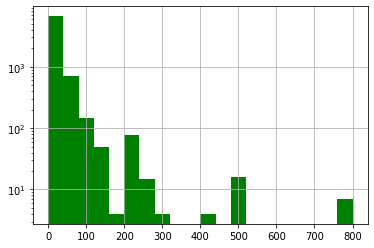

In [104]:
dfcovid203['FATAL_RATE'].hist(bins=20,log=True,color='green')

* driver, passenger(s) and vehicle all involved in a crash 

In [105]:
dfcovid203['FATAL_INBOTH'] = ((dfcovid203['PERSON_TYPE']=='DRIVER') | (dfcovid203['PERSON_TYPE']=='PASSENGER')) & (dfcovid203['CRASH_TYPE']=='INJURY_AND_OR_TOW_DUE_TO_CRASH')
dfcovid203['FATAL_INBOTH'] = dfcovid203['FATAL_INBOTH'].astype(float)
dfcovid203['FATAL_INBOTH'].value_counts(normalize=True, dropna=False)

0.0    0.550013
1.0    0.449987
Name: FATAL_INBOTH, dtype: float64

* driver and passenger(s) involved in a crash but vehicle is still operable

In [106]:
dfcovid203['FATAL_CARPPL'] = ((dfcovid203['PERSON_TYPE']=='DRIVER') | (dfcovid203['PERSON_TYPE']=='PASSENGER')) & (dfcovid203['CRASH_TYPE']=='NO_INJURY_DRIVE_AWAY')
dfcovid203['FATAL_CARPPL'] = dfcovid203['FATAL_CARPPL'].astype(float)
dfcovid203['FATAL_CARPPL'].value_counts(normalize=True, dropna=False)

1.0    0.5265
0.0    0.4735
Name: FATAL_CARPPL, dtype: float64

* driver, passenger(s) and vehicle are all fine but people not in vehicle and/or other non-auto/auto transportation tools involved in a crash

In [107]:
dfcovid203['FATAL_OTHPPL'] = (dfcovid203['PERSON_TYPE']!='DRIVER') & (dfcovid203['PERSON_TYPE']!='PASSENGER') & (dfcovid203['CRASH_TYPE']=='NO_INJURY_DRIVE_AWAY')
dfcovid203['FATAL_OTHPPL'] = dfcovid203['FATAL_OTHPPL'].astype(float)
dfcovid203['FATAL_OTHPPL'].value_counts(normalize=True, dropna=False)

0.0    0.997272
1.0    0.002728
Name: FATAL_OTHPPL, dtype: float64

* only vehicle involved in a crash but driver, passenger(s) and people in the surrounding are all fine

In [108]:
dfcovid203['FATAL_INAUTO'] = (dfcovid203['PERSON_TYPE']!='DRIVER') & (dfcovid203['PERSON_TYPE']!='PASSENGER') & (dfcovid203['PERSON_TYPE']!='PEDESTRIAN') & (dfcovid203['CRASH_TYPE']=='INJURY_AND_OR_TOW_DUE_TO_CRASH')
dfcovid203['FATAL_INAUTO'] = dfcovid203['FATAL_INAUTO'].astype(float)
dfcovid203['FATAL_INAUTO'].value_counts(normalize=True, dropna=False)

0.0    0.992595
1.0    0.007405
Name: FATAL_INAUTO, dtype: float64

## conversion of fatal rating to groups of fatal degrees: 
0 (<0.05), 1 (>=0.05 && <21.05), 2 (>=21.05 && <51.05), 3 (>=51.05)

-1 (unknown), 0 (no indication), 1 (not evident), 100 (non-incapacitating), 400 (incapacitating), 1600 (fatal)

In [109]:
import sys
bins = [-1., 0.05, 21.05, 51.05, sys.maxsize]
labels=[0., 1., 2., 3.]

dfcovid203 = dfcovid203.assign(FATAL_DEGREE = lambda x: pd.cut(dfcovid203['FATAL_RATE'], bins=bins, labels=labels))
dfcovid203.head()

,PERSON_TYPE,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,...,LATITUDE,LONGITUDE,CRASH_YEAR,INJURIES_SUM,FATAL_RATE,FATAL_INBOTH,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE
52,PEDESTRIAN,CHICAGO,IL,NaN,M,28.0,NaN,NONE_PRESENT,NaN,NaN,...,41.899277,-87.702616,2020,2.0,0.000000,0.0,0.0,1.0,0.0,0.0
53,DRIVER,CHICAGO,IL,60647,F,23.0,IL,NONE_PRESENT,DEPLOYED_FRONT,NONE,...,41.935475,-87.727228,2020,3.0,0.333333,1.0,0.0,0.0,0.0,1.0
54,DRIVER,CHICAGO,IL,60647,F,23.0,IL,NONE_PRESENT,DEPLOYED_FRONT,NONE,...,41.935475,-87.727228,2020,3.0,0.333333,1.0,0.0,0.0,0.0,1.0
55,DRIVER,NaN,NaN,NaN,F,NaN,NaN,USAGE_UNKNOWN,DEPLOYMENT_UNKNOWN,UNKNOWN,...,41.935475,-87.727228,2020,3.0,0.333333,1.0,0.0,0.0,0.0,1.0
56,DRIVER,NaN,NaN,NaN,F,NaN,NaN,USAGE_UNKNOWN,DEPLOYMENT_UNKNOWN,UNKNOWN,...,41.935475,-87.727228,2020,3.0,0.333333,1.0,0.0,0.0,0.0,1.0


In [110]:
dfcovid203[dfcovid203['MOST_SEVERE_INJURY']==dfcovid203['FATAL_DEGREE']].shape[0]/dfcovid203.shape[0]

0.9388152766952456

In [111]:
dfcovid203['MOST_SEVERE_INJURY'].value_counts(normalize=True, dropna=False)

0    0.733827
2    0.163809
1    0.067160
3    0.031697
4    0.003507
Name: MOST_SEVERE_INJURY, dtype: float64

In [112]:
dfcovid203['is_compare'] = np.array(dfcovid203['MOST_SEVERE_INJURY']) - np.array(dfcovid203['FATAL_DEGREE'])
dfcovid203['is_compare'].value_counts(normalize=True, dropna=False)

 0.0    0.938815
-1.0    0.034035
 1.0    0.027150
Name: is_compare, dtype: float64

In [113]:
dfcovid203['FATAL_DEGREE'].value_counts(normalize=True,dropna=False)

0.0    0.733827
2.0    0.106131
1.0    0.090803
3.0    0.069239
Name: FATAL_DEGREE, dtype: float64

In [114]:
dfcovid203['FATAL_DEGREE'].value_counts(dropna=False)

0.0    5649
2.0     817
1.0     699
3.0     533
Name: FATAL_DEGREE, dtype: int64

In [115]:
dfcovid204 = dfcovid203.drop(['INJURIES_SUM','FATAL_RATE','PERSON_TYPE','CRASH_TYPE','MOST_SEVERE_INJURY','is_compare'], axis=1)
dfcovid204.shape

(7698, 59)

In [116]:
dfcovid204.to_csv('Traffic_Crashes_-_CPV_FatalDegree.csv')

In [ ]:
#dfcovid204 = pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree.csv')

# Exploring features (COVID-19 era only)
## replacement of missing values

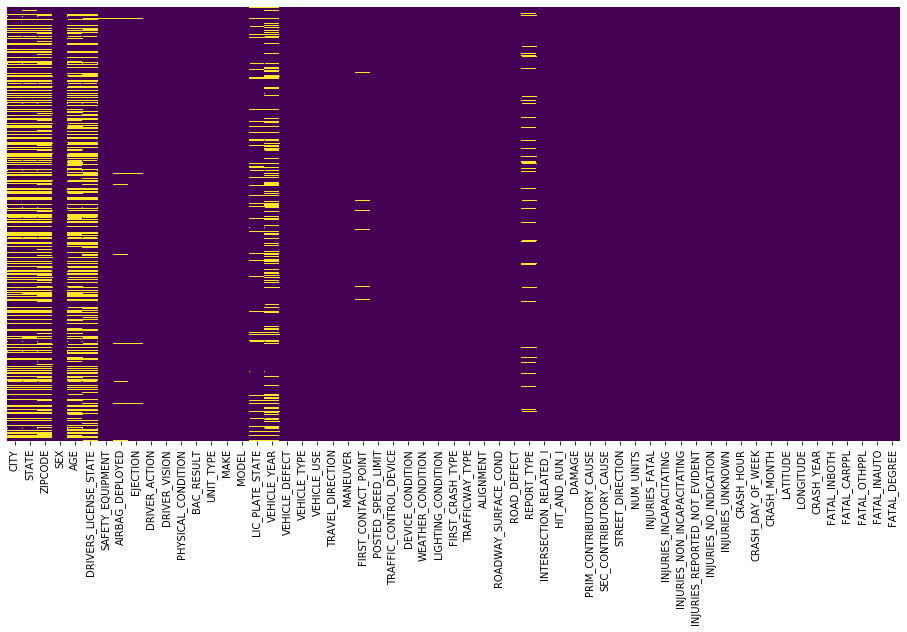

In [117]:
plt.figure(figsize=(16,8))
sns.heatmap(dfcovid204.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [118]:
df_dict = dict()
df_list = []
df_tuple = ()
for col in dfcovid204.columns:
    df_list.append(round(dfcovid204[col].isnull().sum()/dfcovid204.shape[0],6))
    #print(col, round(dfcovid195[col].isnull().sum()/dfcovid195.shape[0],6))

df_dict = {'features':list(dfcovid204.columns.values), 'nullValue':df_list}
df_tuple = list(zip(list(dfcovid204.columns.values), df_list)) 
dfcovid205 = pd.DataFrame(df_tuple, columns=['features', 'nullValue'])
dfcovid205.head(60)

,features,nullValue
0,CITY,0.386204
1,STATE,0.395297
2,ZIPCODE,0.451026
3,SEX,0.000260
4,AGE,0.429072
5,DRIVERS_LICENSE_STATE,0.397506
6,SAFETY_EQUIPMENT,0.003507
7,AIRBAG_DEPLOYED,0.021564
8,EJECTION,0.014160
9,DRIVER_ACTION,0.000000


In [119]:
dfcovid206 = dfcovid205.set_index('features')
dfcovid206.head(60)

,nullValue
features,
CITY,0.386204
STATE,0.395297
ZIPCODE,0.451026
SEX,0.000260
AGE,0.429072
DRIVERS_LICENSE_STATE,0.397506
SAFETY_EQUIPMENT,0.003507
AIRBAG_DEPLOYED,0.021564
EJECTION,0.014160


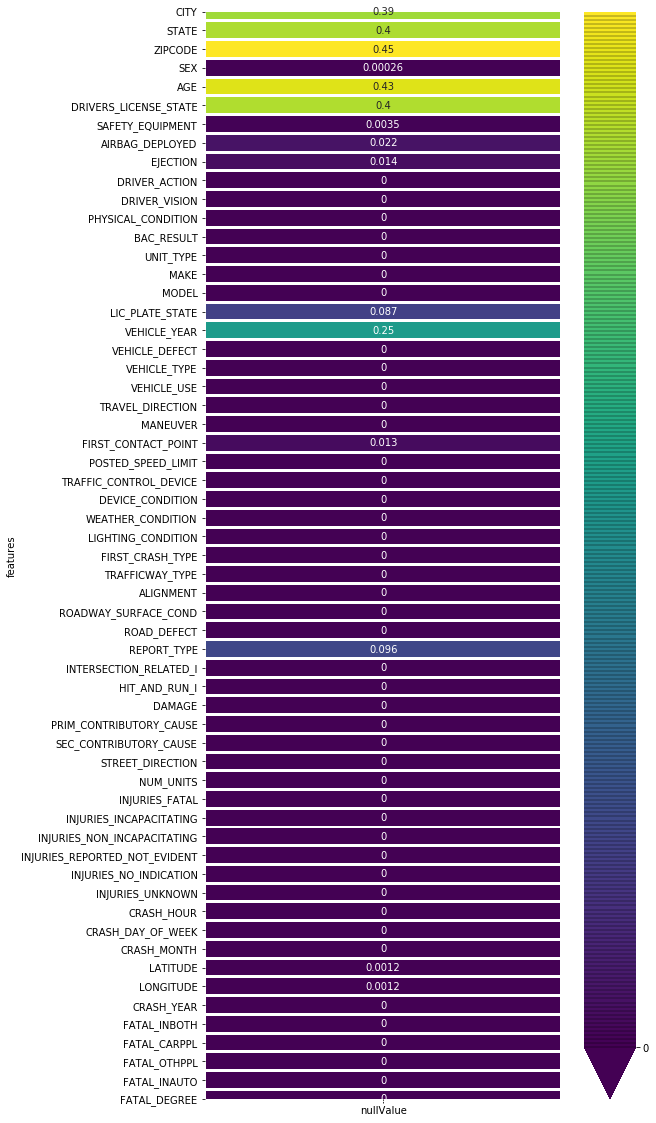

In [120]:
plt.figure(figsize=(8,20))
cbar_kws = {"orientation":"vertical", 
            "shrink":1.,
            'extend':'min', 
            'extendfrac':0.05, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(dfcovid206, yticklabels=True, cbar=True, cmap='viridis', linewidths=2, annot=True, cbar_kws=cbar_kws)

### missing city. state. driver_license_state. license_plate_state : forward fill method

In [121]:
df_zipcode = dfcovid204.loc[dfcovid204['ZIPCODE'].isna(),['CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]
df_zipcode.loc[:,['CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,CHICAGO,IL,NaN,NaN
55,NaN,NaN,NaN,IL
56,NaN,NaN,NaN,IL
195,NaN,NaN,NaN,IL
196,NaN,NaN,NaN,IL
...,...,...,...,...
140681,NaN,NaN,XX,IL
140722,NaN,NaN,XX,NaN
140794,ELMWOOD_PARK,IL,NaN,IL
140795,ELMWOOD_PARK,IL,NaN,IL


In [122]:
df_zipcode['STATE'].fillna(method = 'ffill', inplace=True)
df_zipcode['STATE'].value_counts(normalize=True, dropna=False)

IL    0.685772
XX    0.288306
FL    0.008929
WI    0.005760
MI    0.005472
TX    0.004320
IA    0.001440
Name: STATE, dtype: float64

In [123]:
df_zipcode['CITY'].fillna(method = 'ffill', inplace=True)
df_zipcode['CITY'].value_counts(normalize=True, dropna=False)

CHICAGO          0.600230
UNKNOWN          0.252592
UNK              0.040323
DOLTON           0.011233
MAYWOOD          0.009793
BOLINGBROOK      0.009217
TALLAHASEE       0.008929
NORTHLAKE        0.008641
WEST_CHESTER     0.007776
OAK_LAWN         0.006912
NORRIDGE         0.006624
FOND_DU_LAC      0.005760
WESTLAND         0.005472
WESTCHESTER      0.005184
BERWYN           0.004032
KATY             0.003168
MONTGOMERY       0.002016
DES_PLAINES      0.001728
ELMWOOD_PARK     0.001728
LANSING          0.001440
FRUITLAND        0.001440
MOLINE           0.001152
HARVEY           0.001152
PARK_RIDGE       0.001152
BELLWOOD         0.000864
SOUTH_HOLLAND    0.000576
STERLING         0.000576
RIVER_GROVE      0.000288
Name: CITY, dtype: float64

In [124]:
df_zipcode['DRIVERS_LICENSE_STATE'].fillna(value=df_zipcode['STATE'], inplace=True)
df_zipcode['DRIVERS_LICENSE_STATE'].value_counts(normalize=True, dropna=False)

IL    0.615783
XX    0.353687
FL    0.007776
TX    0.006048
WI    0.005760
MI    0.005472
IA    0.002016
OK    0.000576
MD    0.000576
TN    0.000576
IN    0.000576
MN    0.000576
CA    0.000576
Name: DRIVERS_LICENSE_STATE, dtype: float64

In [125]:
df_zipcode['LIC_PLATE_STATE'].fillna(value=df_zipcode['DRIVERS_LICENSE_STATE'], inplace=True)
df_zipcode['LIC_PLATE_STATE'].value_counts(normalize=True, dropna=False)

IL    0.889977
XX    0.042627
IN    0.022753
FL    0.005472
WI    0.005184
MI    0.003456
TX    0.002880
TN    0.002592
IA    0.002304
MN    0.002304
MS    0.002016
PA    0.002016
CA    0.002016
MD    0.001728
OH    0.001152
AZ    0.001152
MO    0.000864
OK    0.000864
NY    0.000864
CO    0.000864
GA    0.000864
UT    0.000576
KS    0.000576
AL    0.000576
AR    0.000576
KY    0.000576
NC    0.000576
LA    0.000576
NB    0.000576
CT    0.000288
MA    0.000288
NJ    0.000288
WA    0.000288
VA    0.000288
Name: LIC_PLATE_STATE, dtype: float64

In [126]:
def replace_nan(df1, df2):
    
    df_clone = df1.copy()
    
    for idx, row in df2.iterrows():
        
        df_clone.loc[idx, 'CITY'] = df2.loc[idx,'CITY']
        df_clone.loc[idx, 'STATE'] = df2.loc[idx,'STATE']
        df_clone.loc[idx, 'DRIVERS_LICENSE_STATE'] = df2.loc[idx,'DRIVERS_LICENSE_STATE']
        df_clone.loc[idx, 'LIC_PLATE_STATE'] = df2.loc[idx,'LIC_PLATE_STATE']
            
    return df_clone

In [127]:
dfcovid205 = replace_nan(dfcovid204, df_zipcode)
dfcovid205.loc[:,['CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,CHICAGO,IL,IL,IL
53,CHICAGO,IL,IL,IL
54,CHICAGO,IL,IL,IL
55,CHICAGO,IL,IL,IL
56,CHICAGO,IL,IL,IL
...,...,...,...,...
140796,CHICAGO,IL,IL,IL
140797,CHICAGO,IL,IL,IL
140882,ELMWOOD_PARK,IL,IL,IL
140883,SOUTH_HOLLAND,IL,IL,NaN


In [128]:
dfcovid205['STATE'].fillna(method = 'ffill', inplace=True)
dfcovid205['STATE'].value_counts(normalize=True, dropna=False)

IL    0.834762
XX    0.131333
IN    0.008704
WI    0.006495
FL    0.005196
MI    0.003507
TX    0.002598
IA    0.001429
MN    0.001299
GA    0.000779
CA    0.000520
MD    0.000520
NY    0.000390
OH    0.000390
WA    0.000260
AL    0.000260
AZ    0.000260
PA    0.000260
NJ    0.000260
MO    0.000260
VA    0.000260
AR    0.000260
Name: STATE, dtype: float64

In [129]:
dfcovid205['CITY'].fillna(method = 'ffill', inplace=True)
dfcovid205['CITY'].value_counts(normalize=True, dropna=False)

CHICAGO         0.673032
UNKNOWN         0.113926
UNK             0.018446
DOLTON          0.009353
MAYWOOD         0.007924
                  ...   
RIVER_FOREST    0.000260
MONROE          0.000130
WILMETTE        0.000130
BREWYN          0.000130
DALLAS          0.000130
Name: CITY, Length: 237, dtype: float64

In [130]:
dfcovid205['DRIVERS_LICENSE_STATE'].fillna(value=dfcovid205['STATE'], inplace=True)
dfcovid205['DRIVERS_LICENSE_STATE'].value_counts(normalize=True, dropna=False)

IL    0.793583
XX    0.165627
IN    0.008574
WI    0.006235
FL    0.004936
MI    0.003507
TX    0.003378
IA    0.002078
MN    0.001949
MD    0.001299
TN    0.001039
GA    0.001039
AZ    0.001039
CA    0.000779
MO    0.000779
OK    0.000520
PA    0.000520
OH    0.000520
AR    0.000520
NY    0.000390
WA    0.000260
AL    0.000260
PR    0.000260
NJ    0.000260
VA    0.000260
CO    0.000260
MS    0.000130
Name: DRIVERS_LICENSE_STATE, dtype: float64

In [131]:
dfcovid205['LIC_PLATE_STATE'].fillna(value=dfcovid205['DRIVERS_LICENSE_STATE'], inplace=True)
dfcovid205['LIC_PLATE_STATE'].value_counts(normalize=True, dropna=False)

IL    0.902832
XX    0.030268
IN    0.023253
WI    0.006625
FL    0.004806
TX    0.002988
MI    0.002988
TN    0.002728
AZ    0.001949
IA    0.001949
MD    0.001689
CA    0.001689
PA    0.001559
MN    0.001429
CO    0.001299
MS    0.001169
MO    0.001169
OH    0.001039
AL    0.000909
GA    0.000909
NY    0.000779
AR    0.000779
KY    0.000779
OK    0.000650
UT    0.000650
LA    0.000520
NB    0.000520
KS    0.000390
NC    0.000390
NJ    0.000260
MA    0.000260
CT    0.000260
WA    0.000260
VA    0.000260
Name: LIC_PLATE_STATE, dtype: float64

### missing zipcode : forward & backward & one-by-one fill methods

In [132]:
dfcovid205.loc[:,['ZIPCODE','CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,ZIPCODE,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,NaN,CHICAGO,IL,IL,IL
53,60647,CHICAGO,IL,IL,IL
54,60647,CHICAGO,IL,IL,IL
55,NaN,CHICAGO,IL,IL,IL
56,NaN,CHICAGO,IL,IL,IL
...,...,...,...,...,...
140796,60617,CHICAGO,IL,IL,IL
140797,60617,CHICAGO,IL,IL,IL
140882,NaN,ELMWOOD_PARK,IL,IL,IL
140883,60473,SOUTH_HOLLAND,IL,IL,IL


In [133]:
def fill_unknown_nan(df):
    df_clone = df.copy()
    
    for idx, row in df_clone.iterrows():
        if row['CITY'] == 'UNK' or row['CITY'] == 'UNKNOWN':
            df_clone.loc[idx, 'ZIPCODE'] = 0.
        else:
            continue
            
    return df_clone

In [134]:
dfcovid206 = fill_unknown_nan(dfcovid205)
dfcovid206.loc[:,['ZIPCODE','CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,ZIPCODE,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,NaN,CHICAGO,IL,IL,IL
53,60647,CHICAGO,IL,IL,IL
54,60647,CHICAGO,IL,IL,IL
55,NaN,CHICAGO,IL,IL,IL
56,NaN,CHICAGO,IL,IL,IL
...,...,...,...,...,...
140796,60617,CHICAGO,IL,IL,IL
140797,60617,CHICAGO,IL,IL,IL
140882,NaN,ELMWOOD_PARK,IL,IL,IL
140883,60473,SOUTH_HOLLAND,IL,IL,IL


In [135]:
dfcovid206['is_null_zipcode'] = dfcovid206['ZIPCODE'].isnull()
dfcovid206.loc[:, ['ZIPCODE','is_null_zipcode','CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,ZIPCODE,is_null_zipcode,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,NaN,True,CHICAGO,IL,IL,IL
53,60647,False,CHICAGO,IL,IL,IL
54,60647,False,CHICAGO,IL,IL,IL
55,NaN,True,CHICAGO,IL,IL,IL
56,NaN,True,CHICAGO,IL,IL,IL
...,...,...,...,...,...,...
140796,60617,False,CHICAGO,IL,IL,IL
140797,60617,False,CHICAGO,IL,IL,IL
140882,NaN,True,ELMWOOD_PARK,IL,IL,IL
140883,60473,False,SOUTH_HOLLAND,IL,IL,IL


In [136]:
def findCityInMissingZipcode(df):
    df_clone = df.copy()
    noZipcodeCities = set()
    
    for idx, row in df_clone.iterrows():
        if row['is_null_zipcode']:
            noZipcodeCities.add(row['CITY'])
        else:
            continue
            
    return list(noZipcodeCities)

In [137]:
noCityList = findCityInMissingZipcode(dfcovid206)
print(noCityList)

['NORRIDGE', 'DES_PLAINES', 'BOLINGBROOK', 'WESTCHESTER', 'DOLTON', 'WESTLAND', 'WEST_CHESTER', 'LANSING', 'SOUTH_HOLLAND', 'NORTHLAKE', 'MONTGOMERY', 'RIVER_GROVE', 'PARK_RIDGE', 'STERLING', 'BERWYN', 'ELMWOOD_PARK', 'MOLINE', 'FOND_DU_LAC', 'HARVEY', 'TALLAHASEE', 'FRUITLAND', 'CHICAGO', 'OAK_LAWN', 'KATY', 'BELLWOOD', 'MAYWOOD']


#### Chicago

In [138]:
df_MissingChicago = dfcovid206[dfcovid206['CITY']=='CHICAGO']
df_MissingChicago.loc[:, ['ZIPCODE','is_null_zipcode','CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,ZIPCODE,is_null_zipcode,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,NaN,True,CHICAGO,IL,IL,IL
53,60647,False,CHICAGO,IL,IL,IL
54,60647,False,CHICAGO,IL,IL,IL
55,NaN,True,CHICAGO,IL,IL,IL
56,NaN,True,CHICAGO,IL,IL,IL
...,...,...,...,...,...,...
140683,60615,False,CHICAGO,IL,IL,IL
140722,NaN,True,CHICAGO,IL,XX,XX
140724,60625,False,CHICAGO,IL,IL,IL
140796,60617,False,CHICAGO,IL,IL,IL


In [139]:
df_MissingChicago['ZIPCODE'].fillna(method='ffill', inplace=True)
df_MissingChicago['ZIPCODE'].fillna(method='bfill', inplace=True)
df_MissingChicago.loc[:, ['ZIPCODE','is_null_zipcode','CITY','STATE','DRIVERS_LICENSE_STATE','LIC_PLATE_STATE']]

,ZIPCODE,is_null_zipcode,CITY,STATE,DRIVERS_LICENSE_STATE,LIC_PLATE_STATE
52,60647,True,CHICAGO,IL,IL,IL
53,60647,False,CHICAGO,IL,IL,IL
54,60647,False,CHICAGO,IL,IL,IL
55,60647,True,CHICAGO,IL,IL,IL
56,60647,True,CHICAGO,IL,IL,IL
...,...,...,...,...,...,...
140683,60615,False,CHICAGO,IL,IL,IL
140722,60615,True,CHICAGO,IL,XX,XX
140724,60625,False,CHICAGO,IL,IL,IL
140796,60617,False,CHICAGO,IL,IL,IL


In [140]:
df_MissingChicago['ZIPCODE'].value_counts(normalize=True, dropna=False)

60620    0.060220
60619    0.055974
60644    0.045937
60617    0.044972
60629    0.043621
           ...   
60453    0.000579
60642    0.000579
60627    0.000386
60680    0.000386
60633    0.000386
Name: ZIPCODE, Length: 61, dtype: float64

#### Others

'WESTLAND' (48185), 'MOLINE' (61265), 'BERWYN' (60402), 'DOLTON' (60419), 'PARK_RIDGE' (60068), 
'WEST_CHESTER' (60154), 'ELMWOOD_PARK' (60707), 'LANSING' (60438), 'MONTGOMERY' (60538), 'OAK_LAWN' (60453), 
'NORRIDGE' (60706), 'WESTCHESTER' (60154), 'MAYWOOD' (60153), 'FOND_DU_LAC' (54935), 'FRUITLAND' (52749), 
'HARVEY' (60426), 'RIVER_GROVE' (60171), 'SOUTH_HOLLAND' (60473), 'DES_PLAINES' (60016), 'BOLINGBROOK' (60440), 
'KATY' (77493), 'STERLING' (61081), 'BELLWOOD' (60104), 'TALLAHASEE' (32303), 'NORTHLAKE' (60164)

In [141]:
def refill_nan(df1, df2, zipnum):
    
    df_clone = df1.copy()
    
    for idx, row in df2.iterrows():
        if df_clone.loc[idx, 'CITY'] == df2.loc[idx,'CITY']:
            df_clone.loc[idx, 'ZIPCODE'] = zipnum
            
    return df_clone

* WESTLAND (48185)

In [142]:
df_MissingWestland = dfcovid206[dfcovid206['CITY']=='WESTLAND']
print(df_MissingWestland['STATE'])
df_MissingWestland['ZIPCODE'].value_counts(normalize=True, dropna=False)

92577    MI
92578    MI
92662    MI
92928    MI
93116    MI
93117    MI
93275    MI
93276    MI
93452    MI
93453    MI
93524    MI
93525    MI
93526    MI
93527    MI
93528    MI
93630    MI
93640    MI
93641    MI
93642    MI
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [143]:
dfcovid207 = refill_nan(dfcovid206, df_MissingWestland, 48185)
dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE']

92577    48185
92578    48185
92662    48185
92928    48185
93116    48185
93117    48185
93275    48185
93276    48185
93452    48185
93453    48185
93524    48185
93525    48185
93526    48185
93527    48185
93528    48185
93630    48185
93640    48185
93641    48185
93642    48185
Name: ZIPCODE, dtype: object

* MOLINE (61265)

In [144]:
df_MissingMoline = dfcovid206[dfcovid206['CITY']=='MOLINE']
print(df_MissingMoline['STATE'])
df_MissingMoline['ZIPCODE'].value_counts(normalize=True, dropna=False)

77238    IL
77239    IL
77287    IL
77288    IL
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [145]:
dfcovid207 = refill_nan(dfcovid207, df_MissingMoline, 61265)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE']

77238    61265
77239    61265
77287    61265
77288    61265
Name: ZIPCODE, dtype: object

* BERWYN (60402)

In [146]:
df_MissingBerwyn = dfcovid206[dfcovid206['CITY']=='BERWYN']
print(df_MissingBerwyn['STATE'])
df_MissingBerwyn['ZIPCODE'].value_counts(normalize=True, dropna=False)

8669      IL
8670      IL
15373     IL
15374     IL
21046     IL
21047     IL
21048     IL
21118     IL
21119     IL
43547     IL
43548     IL
43549     IL
96521     IL
96522     IL
109495    IL
109496    IL
109772    IL
109773    IL
121449    IL
121450    IL
121530    IL
121531    IL
121749    IL
121792    IL
121793    IL
121830    IL
121831    IL
122288    IL
122289    IL
122516    IL
122526    IL
122621    IL
129079    IL
129080    IL
Name: STATE, dtype: object


60402    0.588235
NaN      0.411765
Name: ZIPCODE, dtype: float64

In [147]:
dfcovid207 = refill_nan(dfcovid207, df_MissingBerwyn, 60402)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE']

8669      60402
8670      60402
15373     60402
15374     60402
21046     60402
21047     60402
21048     60402
21118     60402
21119     60402
43547     60402
43548     60402
43549     60402
96521     60402
96522     60402
109495    60402
109496    60402
109772    60402
109773    60402
121449    60402
121450    60402
121530    60402
121531    60402
121749    60402
121792    60402
121793    60402
121830    60402
121831    60402
122288    60402
122289    60402
122516    60402
122526    60402
122621    60402
129079    60402
129080    60402
Name: ZIPCODE, dtype: object

* DOLTON (60419)

In [148]:
df_MissingDolton = dfcovid206[dfcovid206['CITY']=='DOLTON']
print(df_MissingDolton['STATE'])
df_MissingDolton['ZIPCODE'].value_counts(normalize=True, dropna=False)

12967     IL
12968     IL
22181     IL
22182     IL
36729     IL
          ..
124249    IL
126862    IL
126863    IL
133491    IL
133492    IL
Name: STATE, Length: 72, dtype: object


NaN      0.541667
60419    0.458333
Name: ZIPCODE, dtype: float64

In [149]:
dfcovid207 = refill_nan(dfcovid207, df_MissingDolton, 60419)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE']

12967     60419
12968     60419
22181     60419
22182     60419
36729     60419
          ...  
124249    60419
126862    60419
126863    60419
133491    60419
133492    60419
Name: ZIPCODE, Length: 72, dtype: object

* PARK_RIDGE (60068)

In [150]:
df_MissingParkridge = dfcovid206[dfcovid206['CITY']=='PARK_RIDGE']
print(df_MissingParkridge['STATE'])
df_MissingParkridge['ZIPCODE'].value_counts(normalize=True, dropna=False)

1107      IL
79122     IL
79123     IL
86179     IL
86180     IL
86181     IL
86182     IL
127528    IL
127529    IL
127551    IL
127552    IL
Name: STATE, dtype: object


60068    0.636364
NaN      0.363636
Name: ZIPCODE, dtype: float64

In [151]:
dfcovid207 = refill_nan(dfcovid207, df_MissingParkridge, 60068)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE']

1107      60068
79122     60068
79123     60068
86179     60068
86180     60068
86181     60068
86182     60068
127528    60068
127529    60068
127551    60068
127552    60068
Name: ZIPCODE, dtype: object

* WEST_CHESTER = WESTCHESTER (60154)

In [152]:
df_MissingWestchester = dfcovid206[(dfcovid206['CITY']=='WEST_CHESTER') | (dfcovid206['CITY']=='WESTCHESTER')]
print(df_MissingWestchester['STATE'])
df_MissingWestchester['ZIPCODE'].value_counts(normalize=True, dropna=False)

9883      IL
9884      IL
9885      IL
10036     IL
10037     IL
10152     IL
10153     IL
10210     IL
10214     IL
10215     IL
10357     IL
10358     IL
10380     IL
10411     IL
10471     IL
10755     IL
10756     IL
10833     IL
10834     IL
10850     IL
10894     IL
10895     IL
10929     IL
10930     IL
10931     IL
10947     IL
11103     IL
55524     IL
55525     IL
55534     IL
55553     IL
55554     IL
55647     IL
55648     IL
55799     IL
55800     IL
55932     IL
56015     IL
56016     IL
56279     IL
56280     IL
56404     IL
56683     IL
56684     IL
56785     IL
121751    IL
121752    IL
121753    IL
Name: STATE, dtype: object


NaN      0.9375
60154    0.0625
Name: ZIPCODE, dtype: float64

In [153]:
dfcovid207 = refill_nan(dfcovid207, df_MissingWestchester, 60154)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE']

9883      60154
9884      60154
9885      60154
10036     60154
10037     60154
10152     60154
10153     60154
10210     60154
10214     60154
10215     60154
10357     60154
10358     60154
10380     60154
10411     60154
10471     60154
10755     60154
10756     60154
10833     60154
10834     60154
10850     60154
10894     60154
10895     60154
10929     60154
10930     60154
10931     60154
10947     60154
11103     60154
55524     60154
55525     60154
55534     60154
55553     60154
55554     60154
55647     60154
55648     60154
55799     60154
55800     60154
55932     60154
56015     60154
56016     60154
56279     60154
56280     60154
56404     60154
56683     60154
56684     60154
56785     60154
121751    60154
121752    60154
121753    60154
Name: ZIPCODE, dtype: object

* ELMWOOD_PARK (60707)

In [154]:
df_MissingElmwoodpark = dfcovid206[dfcovid206['CITY']=='ELMWOOD_PARK']
print(df_MissingElmwoodpark['STATE'])
df_MissingElmwoodpark['ZIPCODE'].value_counts(normalize=True, dropna=False)

20000     IL
20001     IL
20002     IL
21998     IL
21999     IL
43535     IL
43536     IL
43537     IL
73612     IL
73613     IL
94045     IL
94046     IL
120662    IL
120663    IL
140794    IL
140795    IL
140882    IL
Name: STATE, dtype: object


60707    0.647059
NaN      0.352941
Name: ZIPCODE, dtype: float64

In [155]:
dfcovid207 = refill_nan(dfcovid207, df_MissingElmwoodpark, 60707)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE']

20000     60707
20001     60707
20002     60707
21998     60707
21999     60707
43535     60707
43536     60707
43537     60707
73612     60707
73613     60707
94045     60707
94046     60707
120662    60707
120663    60707
140794    60707
140795    60707
140882    60707
Name: ZIPCODE, dtype: object

* LANSING (60438)

In [156]:
df_MissingLansing = dfcovid206[dfcovid206['CITY']=='LANSING']
print(df_MissingLansing['STATE'])
df_MissingLansing['ZIPCODE'].value_counts(normalize=True, dropna=False)

4372      IL
4373      IL
12584     IL
12585     IL
25446     IL
25447     IL
45368     IL
45369     IL
63122     IL
63123     IL
63124     IL
63135     IL
63136     IL
68984     IL
68985     IL
102990    IL
102991    IL
116567    IL
116568    IL
133575    IL
133576    IL
Name: STATE, dtype: object


60438    0.761905
NaN      0.238095
Name: ZIPCODE, dtype: float64

In [157]:
dfcovid207 = refill_nan(dfcovid207, df_MissingLansing, 60438)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE']

4372      60438
4373      60438
12584     60438
12585     60438
25446     60438
25447     60438
45368     60438
45369     60438
63122     60438
63123     60438
63124     60438
63135     60438
63136     60438
68984     60438
68985     60438
102990    60438
102991    60438
116567    60438
116568    60438
133575    60438
133576    60438
Name: ZIPCODE, dtype: object

* MONTGOMERY (60538)

In [158]:
df_MissingMontgomery = dfcovid206[dfcovid206['CITY']=='MONTGOMERY']
print(df_MissingMontgomery['STATE'])
df_MissingMontgomery['ZIPCODE'].value_counts(normalize=True, dropna=False)

106294    IL
106295    IL
106448    IL
106449    IL
106461    IL
106501    IL
106502    IL
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [159]:
dfcovid207 = refill_nan(dfcovid207, df_MissingMontgomery, 60538)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE']

106294    60538
106295    60538
106448    60538
106449    60538
106461    60538
106501    60538
106502    60538
Name: ZIPCODE, dtype: object

* OAK_LAWN (60453)

In [160]:
df_MissingOaklawn = dfcovid206[dfcovid206['CITY']=='OAK_LAWN']
print(df_MissingOaklawn['STATE'])
df_MissingOaklawn['ZIPCODE'].value_counts(normalize=True, dropna=False)

47964    IL
47965    IL
48278    IL
48279    IL
48344    IL
48379    IL
48380    IL
48381    IL
48382    IL
48387    IL
48388    IL
48389    IL
48390    IL
48544    IL
53546    IL
53547    IL
53554    IL
53555    IL
53608    IL
53609    IL
53647    IL
53648    IL
53699    IL
53700    IL
78309    IL
78310    IL
81746    IL
81747    IL
Name: STATE, dtype: object


NaN      0.857143
60453    0.142857
Name: ZIPCODE, dtype: float64

In [161]:
dfcovid207 = refill_nan(dfcovid207, df_MissingOaklawn, 60453)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE']

47964    60453
47965    60453
48278    60453
48279    60453
48344    60453
48379    60453
48380    60453
48381    60453
48382    60453
48387    60453
48388    60453
48389    60453
48390    60453
48544    60453
53546    60453
53547    60453
53554    60453
53555    60453
53608    60453
53609    60453
53647    60453
53648    60453
53699    60453
53700    60453
78309    60453
78310    60453
81746    60453
81747    60453
Name: ZIPCODE, dtype: object

* NORRIDGE (60706)

In [162]:
df_MissingNorridge = dfcovid206[dfcovid206['CITY']=='NORRIDGE']
print(df_MissingNorridge['STATE'])
df_MissingNorridge['ZIPCODE'].value_counts(normalize=True, dropna=False)

70178     IL
70179     IL
70180     IL
70181     IL
70182     IL
70183     IL
70189     IL
70196     IL
70197     IL
70267     IL
70268     IL
70681     IL
70682     IL
70709     IL
70710     IL
70764     IL
70765     IL
70779     IL
70780     IL
70792     IL
70793     IL
70838     IL
70839     IL
135897    IL
135898    IL
Name: STATE, dtype: object


NaN      0.92
60706    0.08
Name: ZIPCODE, dtype: float64

In [163]:
dfcovid207 = refill_nan(dfcovid207, df_MissingNorridge, 60706)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE']

70178     60706
70179     60706
70180     60706
70181     60706
70182     60706
70183     60706
70189     60706
70196     60706
70197     60706
70267     60706
70268     60706
70681     60706
70682     60706
70709     60706
70710     60706
70764     60706
70765     60706
70779     60706
70780     60706
70792     60706
70793     60706
70838     60706
70839     60706
135897    60706
135898    60706
Name: ZIPCODE, dtype: object

* MAYWOOD (60153)

In [164]:
df_MissingMaywood = dfcovid206[dfcovid206['CITY']=='MAYWOOD']
print(df_MissingMaywood['STATE'])
df_MissingMaywood['ZIPCODE'].value_counts(normalize=True, dropna=False)

350       IL
351       IL
352       IL
18690     IL
18691     IL
          ..
133959    IL
133960    IL
133961    IL
139132    IL
139133    IL
Name: STATE, Length: 61, dtype: object


NaN      0.557377
60153    0.360656
60653    0.049180
60155    0.032787
Name: ZIPCODE, dtype: float64

In [165]:
dfcovid207 = refill_nan(dfcovid207, df_MissingMaywood, 60153)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE']

350       60153
351       60153
352       60153
18690     60153
18691     60153
          ...  
133959    60153
133960    60153
133961    60153
139132    60153
139133    60153
Name: ZIPCODE, Length: 61, dtype: object

* FOND_DU_LAC (54935)

In [166]:
df_MissingFonddulac = dfcovid206[dfcovid206['CITY']=='FOND_DU_LAC']
print(df_MissingFonddulac['STATE'])
df_MissingFonddulac['ZIPCODE'].value_counts(normalize=True, dropna=False)

56787    WI
56968    WI
57145    WI
57146    WI
57362    WI
57363    WI
57390    WI
57398    WI
57399    WI
57459    WI
57460    WI
57474    WI
57530    WI
57531    WI
57536    WI
57537    WI
57624    WI
57684    WI
57685    WI
57690    WI
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [167]:
dfcovid207 = refill_nan(dfcovid207, df_MissingFonddulac, 54935)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE']

56787    54935
56968    54935
57145    54935
57146    54935
57362    54935
57363    54935
57390    54935
57398    54935
57399    54935
57459    54935
57460    54935
57474    54935
57530    54935
57531    54935
57536    54935
57537    54935
57624    54935
57684    54935
57685    54935
57690    54935
Name: ZIPCODE, dtype: object

* FRUITLAND (52749)

In [168]:
df_MissingFruitland = dfcovid206[dfcovid206['CITY']=='FRUITLAND']
print(df_MissingFruitland['STATE'])
df_MissingFruitland['ZIPCODE'].value_counts(normalize=True, dropna=False)

63057    IA
63058    IA
63116    IA
63117    IA
63118    IA
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [169]:
dfcovid207 = refill_nan(dfcovid207, df_MissingFruitland, 52749)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE']

63057    52749
63058    52749
63116    52749
63117    52749
63118    52749
Name: ZIPCODE, dtype: object

* HARVEY (60426)

In [170]:
df_MissingHarvey = dfcovid206[dfcovid206['CITY']=='HARVEY']
print(df_MissingHarvey['STATE'])
df_MissingHarvey['ZIPCODE'].value_counts(normalize=True, dropna=False)

4746      IL
4747      IL
13451     IL
13452     IL
13506     IL
13507     IL
61152     IL
61153     IL
71339     IL
110554    IL
110555    IL
117588    IL
117589    IL
117590    IL
Name: STATE, dtype: object


60426    0.714286
NaN      0.285714
Name: ZIPCODE, dtype: float64

In [171]:
dfcovid207 = refill_nan(dfcovid207, df_MissingHarvey, 60426)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE']

4746      60426
4747      60426
13451     60426
13452     60426
13506     60426
13507     60426
61152     60426
61153     60426
71339     60426
110554    60426
110555    60426
117588    60426
117589    60426
117590    60426
Name: ZIPCODE, dtype: object

* RIVER_GROVE (60171)

In [172]:
df_MissingRivergrove = dfcovid206[dfcovid206['CITY']=='RIVER_GROVE']
print(df_MissingRivergrove['STATE'])
df_MissingRivergrove['ZIPCODE'].value_counts(normalize=True, dropna=False)

4977     IL
30395    IL
30396    IL
Name: STATE, dtype: object


60171    0.666667
NaN      0.333333
Name: ZIPCODE, dtype: float64

In [173]:
dfcovid207 = refill_nan(dfcovid207, df_MissingRivergrove, 60171)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE']

4977     60171
30395    60171
30396    60171
Name: ZIPCODE, dtype: object

* SOUTH_HOLLAND (60473)

In [174]:
df_MissingSouthholland = dfcovid206[dfcovid206['CITY']=='SOUTH_HOLLAND']
print(df_MissingSouthholland['STATE'])
df_MissingSouthholland['ZIPCODE'].value_counts(normalize=True, dropna=False)

9726      IL
23287     IL
23288     IL
24193     IL
24194     IL
26732     IL
26733     IL
28006     IL
28007     IL
28526     IL
28527     IL
32105     IL
32106     IL
44382     IL
59550     IL
59551     IL
73974     IL
73975     IL
76237     IL
76238     IL
111751    IL
111752    IL
134590    IL
134591    IL
140883    IL
140884    IL
Name: STATE, dtype: object


60473    0.923077
NaN      0.076923
Name: ZIPCODE, dtype: float64

In [175]:
dfcovid207 = refill_nan(dfcovid207, df_MissingSouthholland, 60473)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE']

9726      60473
23287     60473
23288     60473
24193     60473
24194     60473
26732     60473
26733     60473
28006     60473
28007     60473
28526     60473
28527     60473
32105     60473
32106     60473
44382     60473
59550     60473
59551     60473
73974     60473
73975     60473
76237     60473
76238     60473
111751    60473
111752    60473
134590    60473
134591    60473
140883    60473
140884    60473
Name: ZIPCODE, dtype: object

* DES_PLAINES (60016)

In [176]:
df_MissingDesplaines = dfcovid206[dfcovid206['CITY']=='DES_PLAINES']
print(df_MissingDesplaines['STATE'])
df_MissingDesplaines['ZIPCODE'].value_counts(normalize=True, dropna=False)

4772      IL
4773      IL
32944     IL
32945     IL
37804     IL
37805     IL
44465     IL
44466     IL
46001     IL
46002     IL
127553    IL
127554    IL
127675    IL
127676    IL
127677    IL
127760    IL
Name: STATE, dtype: object


60016    0.500
NaN      0.375
60018    0.125
Name: ZIPCODE, dtype: float64

In [177]:
dfcovid207 = refill_nan(dfcovid207, df_MissingDesplaines, 60016)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE']

4772      60016
4773      60016
32944     60016
32945     60016
37804     60016
37805     60016
44465     60016
44466     60016
46001     60016
46002     60016
127553    60016
127554    60016
127675    60016
127676    60016
127677    60016
127760    60016
Name: ZIPCODE, dtype: object

* BOLINGBROOK (60440)

In [178]:
df_MissingBolingbrook = dfcovid206[dfcovid206['CITY']=='BOLINGBROOK']
print(df_MissingBolingbrook['STATE'])
df_MissingBolingbrook['ZIPCODE'].value_counts(normalize=True, dropna=False)

35996     IL
35997     IL
76195     IL
84203     IL
84204     IL
100561    IL
100562    IL
100568    IL
100577    IL
100585    IL
100631    IL
100632    IL
100639    IL
100640    IL
100641    IL
100645    IL
100646    IL
100647    IL
100689    IL
100690    IL
100705    IL
100706    IL
100757    IL
100758    IL
100879    IL
100880    IL
100887    IL
100888    IL
100890    IL
100891    IL
100954    IL
100955    IL
100962    IL
100963    IL
101049    IL
101050    IL
101129    IL
Name: STATE, dtype: object


NaN      0.864865
60440    0.135135
Name: ZIPCODE, dtype: float64

In [179]:
dfcovid207 = refill_nan(dfcovid207, df_MissingBolingbrook, 60440)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='BOLINGBROOK','ZIPCODE']

35996     60440
35997     60440
76195     60440
84203     60440
84204     60440
100561    60440
100562    60440
100568    60440
100577    60440
100585    60440
100631    60440
100632    60440
100639    60440
100640    60440
100641    60440
100645    60440
100646    60440
100647    60440
100689    60440
100690    60440
100705    60440
100706    60440
100757    60440
100758    60440
100879    60440
100880    60440
100887    60440
100888    60440
100890    60440
100891    60440
100954    60440
100955    60440
100962    60440
100963    60440
101049    60440
101050    60440
101129    60440
Name: ZIPCODE, dtype: object

* KATY (77493)

In [180]:
df_MissingKaty = dfcovid206[dfcovid206['CITY']=='KATY']
print(df_MissingKaty['STATE'])
df_MissingKaty['ZIPCODE'].value_counts(normalize=True, dropna=False)

81950    TX
81951    TX
81998    TX
82017    TX
82018    TX
82078    TX
82079    TX
82090    TX
82091    TX
82294    TX
82382    TX
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [181]:
dfcovid207 = refill_nan(dfcovid207, df_MissingKaty, 77493)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BOLINGBROOK','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='KATY','ZIPCODE']

81950    77493
81951    77493
81998    77493
82017    77493
82018    77493
82078    77493
82079    77493
82090    77493
82091    77493
82294    77493
82382    77493
Name: ZIPCODE, dtype: object

* STERLING (61081)

In [182]:
df_MissingSterling = dfcovid206[dfcovid206['CITY']=='STERLING']
print(df_MissingSterling['STATE'])
df_MissingSterling['ZIPCODE'].value_counts(normalize=True, dropna=False)

53701    IL
53702    IL
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [183]:
dfcovid207 = refill_nan(dfcovid207, df_MissingSterling, 61081)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BOLINGBROOK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='KATY','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='STERLING','ZIPCODE']

53701    61081
53702    61081
Name: ZIPCODE, dtype: object

* BELLWOOD (60104)

In [184]:
df_MissingBellwood = dfcovid206[dfcovid206['CITY']=='BELLWOOD']
print(df_MissingBellwood['STATE'])
df_MissingBellwood['ZIPCODE'].value_counts(normalize=True, dropna=False)

36502     IL
36503     IL
36504     IL
36505     IL
36506     IL
36507     IL
81125     IL
81126     IL
82919     IL
82920     IL
97311     IL
97312     IL
102313    IL
102314    IL
107857    IL
107858    IL
117591    IL
117592    IL
117593    IL
127460    IL
127461    IL
127527    IL
Name: STATE, dtype: object


60104    0.863636
NaN      0.136364
Name: ZIPCODE, dtype: float64

In [185]:
dfcovid207 = refill_nan(dfcovid207, df_MissingBellwood, 60104)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BOLINGBROOK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='KATY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='STERLING','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='BELLWOOD','ZIPCODE']

36502     60104
36503     60104
36504     60104
36505     60104
36506     60104
36507     60104
81125     60104
81126     60104
82919     60104
82920     60104
97311     60104
97312     60104
102313    60104
102314    60104
107857    60104
107858    60104
117591    60104
117592    60104
117593    60104
127460    60104
127461    60104
127527    60104
Name: ZIPCODE, dtype: object

* TALLAHASEE (32303)

In [186]:
df_MissingTallahasee = dfcovid206[dfcovid206['CITY']=='TALLAHASEE']
print(df_MissingTallahasee['STATE'])
df_MissingTallahasee['ZIPCODE'].value_counts(normalize=True, dropna=False)

102473    FL
102474    FL
102482    FL
102598    FL
102599    FL
102982    FL
102983    FL
103032    FL
103033    FL
103226    FL
103227    FL
103274    FL
103275    FL
103419    FL
103420    FL
103425    FL
103426    FL
103441    FL
103442    FL
103506    FL
103507    FL
103578    FL
104061    FL
104062    FL
104093    FL
104116    FL
104117    FL
104207    FL
104208    FL
104351    FL
104591    FL
Name: STATE, dtype: object


NaN    1.0
Name: ZIPCODE, dtype: float64

In [187]:
dfcovid207 = refill_nan(dfcovid207, df_MissingTallahasee, 32303)
#print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
#print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BOLINGBROOK','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='KATY','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='STERLING','ZIPCODE'])
#print(dfcovid207.loc[dfcovid207['CITY']=='BELLWOOD','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='TALLAHASEE','ZIPCODE']

102473    32303
102474    32303
102482    32303
102598    32303
102599    32303
102982    32303
102983    32303
103032    32303
103033    32303
103226    32303
103227    32303
103274    32303
103275    32303
103419    32303
103420    32303
103425    32303
103426    32303
103441    32303
103442    32303
103506    32303
103507    32303
103578    32303
104061    32303
104062    32303
104093    32303
104116    32303
104117    32303
104207    32303
104208    32303
104351    32303
104591    32303
Name: ZIPCODE, dtype: object

* NORTHLAKE (60164)

In [188]:
df_MissingNorthlake = dfcovid206[dfcovid206['CITY']=='NORTHLAKE']
print(df_MissingNorthlake['STATE'])
df_MissingNorthlake['ZIPCODE'].value_counts(normalize=True, dropna=False)

21621     IL
21622     IL
106503    IL
106504    IL
113588    IL
113589    IL
113613    IL
113614    IL
113621    IL
113795    IL
113796    IL
113797    IL
113801    IL
113802    IL
113803    IL
113830    IL
113831    IL
113943    IL
113952    IL
113953    IL
113969    IL
114140    IL
114148    IL
114149    IL
114266    IL
114302    IL
114303    IL
114413    IL
114453    IL
114454    IL
114510    IL
114513    IL
114514    IL
114585    IL
Name: STATE, dtype: object


NaN      0.882353
60164    0.117647
Name: ZIPCODE, dtype: float64

In [189]:
dfcovid207 = refill_nan(dfcovid207, df_MissingNorthlake, 60164)
print(dfcovid207.loc[dfcovid207['CITY']=='WESTLAND','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='MOLINE','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='BERWYN','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='DOLTON','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='PARK_RIDGE','ZIPCODE'])
print(dfcovid207.loc[(dfcovid207['CITY']=='WEST_CHESTER') | (dfcovid207['CITY']=='WESTCHESTER'),'ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='ELMWOOD_PARK','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='LANSING','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='MONTGOMERY','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='OAK_LAWN','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='NORRIDGE','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='MAYWOOD','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='FOND_DU_LAC','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='FRUITLAND','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='HARVEY','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='RIVER_GROVE','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='SOUTH_HOLLAND','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='DES_PLAINES','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='BOLINGBROOK','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='KATY','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='STERLING','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='BELLWOOD','ZIPCODE'])
print(dfcovid207.loc[dfcovid207['CITY']=='TALLAHASEE','ZIPCODE'])
dfcovid207.loc[dfcovid207['CITY']=='NORTHLAKE','ZIPCODE']

92577    48185
92578    48185
92662    48185
92928    48185
93116    48185
93117    48185
93275    48185
93276    48185
93452    48185
93453    48185
93524    48185
93525    48185
93526    48185
93527    48185
93528    48185
93630    48185
93640    48185
93641    48185
93642    48185
Name: ZIPCODE, dtype: object
77238    61265
77239    61265
77287    61265
77288    61265
Name: ZIPCODE, dtype: object
8669      60402
8670      60402
15373     60402
15374     60402
21046     60402
21047     60402
21048     60402
21118     60402
21119     60402
43547     60402
43548     60402
43549     60402
96521     60402
96522     60402
109495    60402
109496    60402
109772    60402
109773    60402
121449    60402
121450    60402
121530    60402
121531    60402
121749    60402
121792    60402
121793    60402
121830    60402
121831    60402
122288    60402
122289    60402
122516    60402
122526    60402
122621    60402
129079    60402
129080    60402
Name: ZIPCODE, dtype: object
12967     60419
12968   

21621     60164
21622     60164
106503    60164
106504    60164
113588    60164
113589    60164
113613    60164
113614    60164
113621    60164
113795    60164
113796    60164
113797    60164
113801    60164
113802    60164
113803    60164
113830    60164
113831    60164
113943    60164
113952    60164
113953    60164
113969    60164
114140    60164
114148    60164
114149    60164
114266    60164
114302    60164
114303    60164
114413    60164
114453    60164
114454    60164
114510    60164
114513    60164
114514    60164
114585    60164
Name: ZIPCODE, dtype: object

In [190]:
dfcovid207.columns

Index(['CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE', 'DRIVERS_LICENSE_STATE',
       'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT', 'UNIT_TYPE',
       'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'FIRST_CONTACT_POINT', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION',
       'NUM_UNITS', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF

In [191]:
dfcovid208 = dfcovid207.drop(['DRIVERS_LICENSE_STATE', 'LIC_PLATE_STATE', 'is_null_zipcode'], axis=1)
dfcovid208.shape

(7698, 57)

In [192]:
def refill_chicago(df1, df2):
    
    df_clone = df1.copy()
    
    for idx, row in df2.iterrows():
        if df_clone.loc[idx, 'CITY'] == df2.loc[idx,'CITY']:
            df_clone.loc[idx, 'ZIPCODE'] = df2.loc[idx, 'ZIPCODE']
            
    return df_clone

In [193]:
dfcovid208 = refill_chicago(dfcovid208, df_MissingChicago)
dfcovid208.loc[dfcovid208['CITY']=='CHICAGO','ZIPCODE']

52        60647
53        60647
54        60647
55        60647
56        60647
          ...  
140683    60615
140722    60615
140724    60625
140796    60617
140797    60617
Name: ZIPCODE, Length: 5181, dtype: object

In [194]:
dfcovid208.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v2.csv')

In [ ]:
#dfcovid208 = pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_v2.csv')

### remaining missing features

In [195]:
df_dict = dict()
df_list = []
df_tuple = ()
for col in dfcovid208.columns:
    df_list.append(round(dfcovid208[col].isnull().sum()/dfcovid208.shape[0],6))
    #print(col, round(dfcovid195[col].isnull().sum()/dfcovid195.shape[0],6))

df_dict = {'features':list(dfcovid208.columns.values), 'nullValue':df_list}
df_tuple = list(zip(list(dfcovid208.columns.values), df_list)) 
dfcovid209 = pd.DataFrame(df_tuple, columns=['features', 'nullValue'])
dfcovid209.head(60)

,features,nullValue
0,CITY,0.000000
1,STATE,0.000000
2,ZIPCODE,0.000000
3,SEX,0.000260
4,AGE,0.429072
5,SAFETY_EQUIPMENT,0.003507
6,AIRBAG_DEPLOYED,0.021564
7,EJECTION,0.014160
8,DRIVER_ACTION,0.000000
9,DRIVER_VISION,0.000000


In [196]:
dfcovid210 = dfcovid209.set_index('features')
dfcovid210.head(60)

,nullValue
features,
CITY,0.000000
STATE,0.000000
ZIPCODE,0.000000
SEX,0.000260
AGE,0.429072
SAFETY_EQUIPMENT,0.003507
AIRBAG_DEPLOYED,0.021564
EJECTION,0.014160
DRIVER_ACTION,0.000000


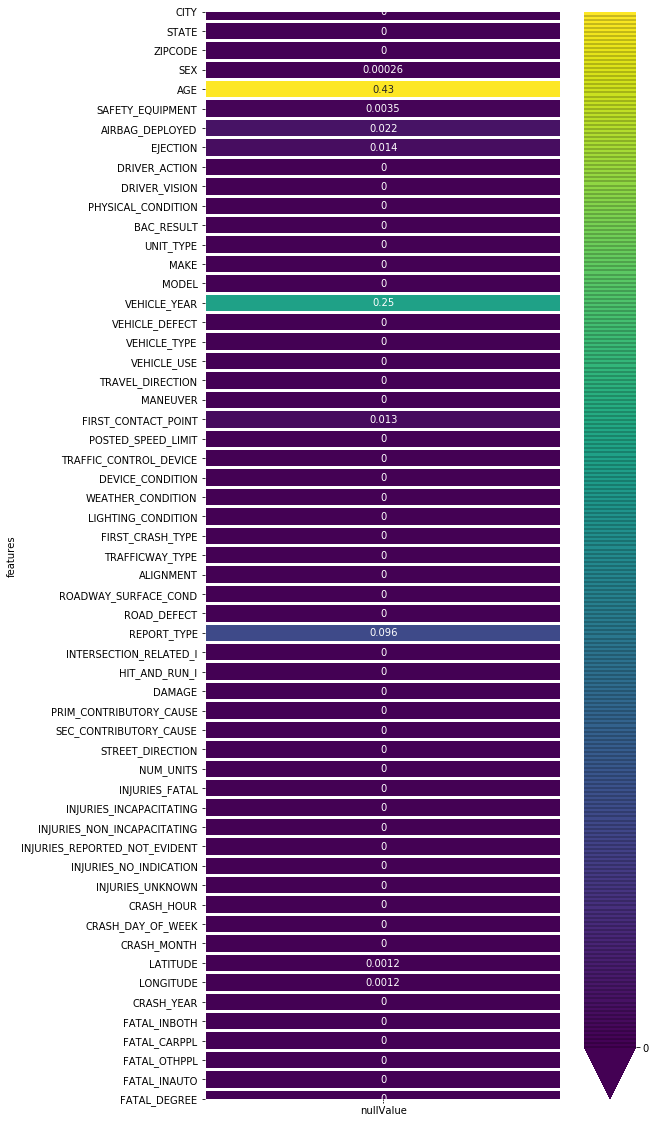

In [197]:
plt.figure(figsize=(8,20))
cbar_kws = {"orientation":"vertical", 
            "shrink":1.,
            'extend':'min', 
            'extendfrac':0.05, 
            "ticks":np.arange(0,2), 
            "drawedges":True,
           }
sns.heatmap(dfcovid210, yticklabels=True, cbar=True, cmap='viridis', linewidths=2, annot=True, cbar_kws=cbar_kws)

#### Sex (Gender) : removed from raw data

In [198]:
dfsex_null = dfcovid208.loc[dfcovid208['SEX'].isna(),:]
dfsex_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

0.0    1.0
3.0    0.0
2.0    0.0
1.0    0.0
Name: FATAL_DEGREE, dtype: float64

In [199]:
dfcovid209 = dfcovid208.dropna(subset=['SEX'], axis=0)
dfcovid209['SEX'].value_counts(normalize=True, dropna=False)

M    0.538591
F    0.313929
X    0.147479
Name: SEX, dtype: float64

#### Safety Equipment : -1 as default

In [200]:
dfsafety_null = dfcovid209.loc[dfcovid209['SAFETY_EQUIPMENT'].isna(),:]
dfsafety_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

2.0    0.64
3.0    0.32
1.0    0.04
0.0    0.00
Name: FATAL_DEGREE, dtype: float64

In [201]:
dfcovid209['SAFETY_EQUIPMENT'].value_counts(normalize=True, dropna=False)

USAGE_UNKNOWN                               0.599662
SAFETY_BELT_USED                            0.349532
NONE_PRESENT                                0.028846
HELMET_NOT_USED                             0.010135
DOT_COMPLIANT_MOTORCYCLE_HELMET             0.004158
NaN                                         0.003248
BICYCLE_HELMET_PEDACYCLIST_INVOLVED_ONLY    0.002599
SAFETY_BELT_NOT_USED                        0.001689
WHEELCHAIR                                  0.000130
Name: SAFETY_EQUIPMENT, dtype: float64

In [202]:
safety_equip_dict = {}
safety_equip_dict['SAFETY_BELT_USED'] = 1
safety_equip_dict['USAGE_UNKNOWN'] = -1
safety_equip_dict['NONE_PRESENT'] = 0 
safety_equip_dict['HELMET_NOT_USED'] = 2
safety_equip_dict['DOT_COMPLIANT_MOTORCYCLE_HELMET'] = 3
safety_equip_dict['BICYCLE_HELMET_PEDACYCLIST_INVOLVED_ONLY'] = 4
safety_equip_dict['SAFETY_BELT_NOT_USED'] = 5
safety_equip_dict['WHEELCHAIR'] = 6
safety_equip_dict

{'SAFETY_BELT_USED': 1,
 'USAGE_UNKNOWN': -1,
 'NONE_PRESENT': 0,
 'HELMET_NOT_USED': 2,
 'DOT_COMPLIANT_MOTORCYCLE_HELMET': 3,
 'BICYCLE_HELMET_PEDACYCLIST_INVOLVED_ONLY': 4,
 'SAFETY_BELT_NOT_USED': 5,
 'WHEELCHAIR': 6}

In [203]:
dfcovid209['SAFETY_EQUIPMENT'] = dfcovid209['SAFETY_EQUIPMENT'].replace(safety_equip_dict)
dfcovid209['SAFETY_EQUIPMENT'].fillna(value=-1, inplace=True)

In [204]:
dfcovid209['SAFETY_EQUIPMENT'].value_counts(normalize=True, dropna=False)

-1.0    0.602911
 1.0    0.349532
 0.0    0.028846
 2.0    0.010135
 3.0    0.004158
 4.0    0.002599
 5.0    0.001689
 6.0    0.000130
Name: SAFETY_EQUIPMENT, dtype: float64

In [205]:
dfcovid209.groupby('SAFETY_EQUIPMENT')['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

SAFETY_EQUIPMENT  FATAL_DEGREE
-1.0              0.0             0.750431
                  2.0             0.100216
                  1.0             0.077586
                  3.0             0.071767
 0.0              0.0             0.554054
                  2.0             0.216216
                  1.0             0.117117
                  3.0             0.112613
 1.0              0.0             0.737918
                  1.0             0.112639
                  2.0             0.091450
                  3.0             0.057993
 2.0              2.0             0.448718
                  0.0             0.358974
                  3.0             0.128205
                  1.0             0.064103
 3.0              0.0             0.500000
                  2.0             0.250000
                  3.0             0.218750
                  1.0             0.031250
 4.0              2.0             0.600000
                  1.0             0.200000
                  0.0  

#### Air Bag Deployed : -2 as default

In [206]:
dfairbag_null = dfcovid209.loc[dfcovid209['AIRBAG_DEPLOYED'].isna(),:]
dfairbag_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

2.0    0.536145
3.0    0.271084
0.0    0.108434
1.0    0.084337
Name: FATAL_DEGREE, dtype: float64

In [207]:
dfcovid209['AIRBAG_DEPLOYED'].value_counts(normalize=True, dropna=False)

DEPLOYMENT_UNKNOWN                  0.386305
DID_NOT_DEPLOY                      0.321856
NOT_APPLICABLE                      0.143581
DEPLOYED_FRONT                      0.057692
DEPLOYED_COMBINATION                0.048727
NaN                                 0.021570
DEPLOYED_SIDE                       0.019491
DEPLOYED_OTHER_KNEE_AIR_BELT_ETC    0.000780
Name: AIRBAG_DEPLOYED, dtype: float64

In [208]:
airbag_dep_dict = {}
airbag_dep_dict['DID_NOT_DEPLOY'] = 0
airbag_dep_dict['NOT_APPLICABLE'] = -1
airbag_dep_dict['DEPLOYMENT_UNKNOWN'] = -2 
airbag_dep_dict['DEPLOYED_FRONT'] = 1
airbag_dep_dict['DEPLOYED_COMBINATION'] = 2
airbag_dep_dict['DEPLOYED_SIDE'] = 3
airbag_dep_dict['DEPLOYED_OTHER_KNEE_AIR_BELT_ETC'] = 4
airbag_dep_dict

{'DID_NOT_DEPLOY': 0,
 'NOT_APPLICABLE': -1,
 'DEPLOYMENT_UNKNOWN': -2,
 'DEPLOYED_FRONT': 1,
 'DEPLOYED_COMBINATION': 2,
 'DEPLOYED_SIDE': 3,
 'DEPLOYED_OTHER_KNEE_AIR_BELT_ETC': 4}

In [209]:
dfcovid209['AIRBAG_DEPLOYED'] = dfcovid209['AIRBAG_DEPLOYED'].replace(airbag_dep_dict)
dfcovid209['AIRBAG_DEPLOYED'].fillna(value=-2, inplace=True)

In [210]:
dfcovid209['AIRBAG_DEPLOYED'].value_counts(normalize=True, dropna=False)

-2.0    0.407874
 0.0    0.321856
-1.0    0.143581
 1.0    0.057692
 2.0    0.048727
 3.0    0.019491
 4.0    0.000780
Name: AIRBAG_DEPLOYED, dtype: float64

In [211]:
dfcovid209.groupby('AIRBAG_DEPLOYED')['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

AIRBAG_DEPLOYED  FATAL_DEGREE
-2.0             0.0             0.718700
                 2.0             0.131252
                 3.0             0.076139
                 1.0             0.073909
-1.0             0.0             0.804525
                 1.0             0.084163
                 2.0             0.074208
                 3.0             0.037104
 0.0             0.0             0.830036
                 1.0             0.079532
                 2.0             0.056520
                 3.0             0.033912
 1.0             0.0             0.484234
                 2.0             0.209459
                 1.0             0.162162
                 3.0             0.144144
 2.0             0.0             0.429333
                 3.0             0.200000
                 1.0             0.189333
                 2.0             0.181333
 3.0             0.0             0.440000
                 1.0             0.226667
                 3.0             0.200000
    

#### Ejection : -1 as default

In [212]:
dfejection_null = dfcovid209.loc[dfcovid209['EJECTION'].isna(),:]
dfejection_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

2.0    0.532110
3.0    0.348624
1.0    0.064220
0.0    0.055046
Name: FATAL_DEGREE, dtype: float64

In [213]:
dfcovid209['EJECTION'].value_counts(normalize=True, dropna=False)

NONE                  0.893581
UNKNOWN               0.086798
NaN                   0.014163
TOTALLY_EJECTED       0.004158
PARTIALLY_EJECTED     0.000780
TRAPPED_EXTRICATED    0.000520
Name: EJECTION, dtype: float64

In [214]:
eject_dict = {}
eject_dict['NONE'] = 0
eject_dict['UNKNOWN'] = -1
eject_dict['TOTALLY_EJECTED'] = 1
eject_dict['PARTIALLY_EJECTED'] = 2
eject_dict['TRAPPED_EXTRICATED'] = 3
eject_dict

{'NONE': 0,
 'UNKNOWN': -1,
 'TOTALLY_EJECTED': 1,
 'PARTIALLY_EJECTED': 2,
 'TRAPPED_EXTRICATED': 3}

In [215]:
dfcovid209['EJECTION'] = dfcovid209['EJECTION'].replace(eject_dict)
dfcovid209['EJECTION'].fillna(value=-1, inplace=True)

In [216]:
dfcovid209['EJECTION'].value_counts(normalize=True, dropna=False)

 0.0    0.893581
-1.0    0.100962
 1.0    0.004158
 2.0    0.000780
 3.0    0.000520
Name: EJECTION, dtype: float64

In [217]:
dfcovid209.groupby('EJECTION')['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

EJECTION  FATAL_DEGREE
-1.0      0.0             0.639640
          2.0             0.148005
          3.0             0.136422
          1.0             0.075933
 0.0      0.0             0.748001
          2.0             0.099753
          1.0             0.092482
          3.0             0.059764
 1.0      2.0             0.437500
          3.0             0.375000
          0.0             0.125000
          1.0             0.062500
 2.0      0.0             0.333333
          1.0             0.333333
          2.0             0.333333
 3.0      3.0             1.000000
Name: FATAL_DEGREE, dtype: float64

#### First Contact Point : -1 as default

In [218]:
df1contact_null = dfcovid209.loc[dfcovid209['FIRST_CONTACT_POINT'].isna(),:]
df1contact_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

0.0    0.636364
3.0    0.222222
1.0    0.111111
2.0    0.030303
Name: FATAL_DEGREE, dtype: float64

In [219]:
dfcovid209['FIRST_CONTACT_POINT'].value_counts(normalize=True, dropna=False)

OTHER              0.292490
REAR_LEFT          0.128898
TOTAL_ALL_AREAS    0.114605
UNKNOWN            0.096804
FRONT              0.091346
ROOF               0.058472
SIDE_RIGHT         0.056133
SIDE_LEFT          0.032095
REAR               0.028326
FRONT_LEFT         0.027417
REAR_RIGHT         0.022609
FRONT_RIGHT        0.019491
UNDER_CARRIAGE     0.016372
NaN                0.012864
NONE               0.002079
Name: FIRST_CONTACT_POINT, dtype: float64

In [220]:
contact_pnt_dict = {}
contact_pnt_dict['OTHER'] = 1
contact_pnt_dict['REAR_LEFT'] = 2
contact_pnt_dict['TOTAL_ALL_AREAS'] = 3
contact_pnt_dict['UNKNOWN'] = -1
contact_pnt_dict['FRONT'] = 4
contact_pnt_dict['ROOF'] = 5
contact_pnt_dict['SIDE_RIGHT'] = 6
contact_pnt_dict['SIDE_LEFT'] = 7
contact_pnt_dict['REAR'] = 8
contact_pnt_dict['FRONT_LEFT'] = 9
contact_pnt_dict['REAR_RIGHT'] = 10
contact_pnt_dict['FRONT_RIGHT'] = 11
contact_pnt_dict['UNDER_CARRIAGE'] = 12
contact_pnt_dict['NONE'] = 0
contact_pnt_dict

{'OTHER': 1,
 'REAR_LEFT': 2,
 'TOTAL_ALL_AREAS': 3,
 'UNKNOWN': -1,
 'FRONT': 4,
 'ROOF': 5,
 'SIDE_RIGHT': 6,
 'SIDE_LEFT': 7,
 'REAR': 8,
 'FRONT_LEFT': 9,
 'REAR_RIGHT': 10,
 'FRONT_RIGHT': 11,
 'UNDER_CARRIAGE': 12,
 'NONE': 0}

In [221]:
dfcovid209['FIRST_CONTACT_POINT'] = dfcovid209['FIRST_CONTACT_POINT'].replace(contact_pnt_dict)
dfcovid209['FIRST_CONTACT_POINT'].fillna(value=-1, inplace=True)

In [222]:
dfcovid209['FIRST_CONTACT_POINT'].value_counts(normalize=True, dropna=False)

 1.0     0.292490
 2.0     0.128898
 3.0     0.114605
-1.0     0.109667
 4.0     0.091346
 5.0     0.058472
 6.0     0.056133
 7.0     0.032095
 8.0     0.028326
 9.0     0.027417
 10.0    0.022609
 11.0    0.019491
 12.0    0.016372
 0.0     0.002079
Name: FIRST_CONTACT_POINT, dtype: float64

In [223]:
dfcovid209.groupby('FIRST_CONTACT_POINT')['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

FIRST_CONTACT_POINT  FATAL_DEGREE
-1.0                 0.0             0.731043
                     2.0             0.112559
                     3.0             0.097156
                     1.0             0.059242
 0.0                 0.0             0.500000
                     3.0             0.500000
 1.0                 0.0             0.687250
                     2.0             0.132830
                     1.0             0.106619
                     3.0             0.073301
 2.0                 0.0             0.780242
                     1.0             0.103831
                     2.0             0.065524
                     3.0             0.050403
 3.0                 0.0             0.719955
                     2.0             0.115646
                     1.0             0.088435
                     3.0             0.075964
 4.0                 0.0             0.786629
                     2.0             0.100996
                     1.0             0.061166


#### Report Type : -1 as default 

In [224]:
dfreport_null = dfcovid209.loc[dfcovid209['REPORT_TYPE'].isna(),:]
dfreport_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

0.0    0.618084
2.0    0.165992
1.0    0.114710
3.0    0.101215
Name: FATAL_DEGREE, dtype: float64

In [225]:
dfcovid209['REPORT_TYPE'].value_counts(normalize=True, dropna=False)

ON_SCENE                    0.564839
NOT_ON_SCENE_DESK_REPORT    0.338877
NaN                         0.096284
Name: REPORT_TYPE, dtype: float64

In [226]:
report_type_dict = {}
report_type_dict['ON_SCENE'] = 1
report_type_dict['NOT_ON_SCENE_DESK_REPORT'] = 0
report_type_dict

{'ON_SCENE': 1, 'NOT_ON_SCENE_DESK_REPORT': 0}

In [227]:
dfcovid209['REPORT_TYPE'] = dfcovid209['REPORT_TYPE'].replace(report_type_dict)
dfcovid209['REPORT_TYPE'].fillna(value=-1, inplace=True)

In [228]:
dfcovid209['REPORT_TYPE'].value_counts(normalize=True, dropna=False)

 1.0    0.564839
 0.0    0.338877
-1.0    0.096284
Name: REPORT_TYPE, dtype: float64

In [229]:
dfcovid209.groupby('REPORT_TYPE')['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

REPORT_TYPE  FATAL_DEGREE
-1.0         0.0             0.618084
             2.0             0.165992
             1.0             0.114710
             3.0             0.101215
 0.0         0.0             0.896089
             1.0             0.051764
             2.0             0.039110
             3.0             0.013037
 1.0         0.0             0.656085
             2.0             0.136186
             1.0             0.110191
             3.0             0.097539
Name: FATAL_DEGREE, dtype: float64

#### Latitude & Longitude : Medium

In [230]:
dfcovid209['LATITUDE'].fillna(value=dfcovid209['LATITUDE'].median(), inplace=True)
dfcovid209['LONGITUDE'].fillna(value=dfcovid209['LONGITUDE'].median(), inplace=True)

In [231]:
print(dfcovid209['LATITUDE'].value_counts(normalize=True, dropna=False))
print(dfcovid209['LONGITUDE'].value_counts(normalize=True, dropna=False))

41.808747    0.008316
41.692671    0.004678
41.736381    0.004678
41.938716    0.004678
41.751461    0.004548
               ...   
41.837853    0.000130
41.721561    0.000130
41.801897    0.000130
41.770112    0.000130
42.000281    0.000130
Name: LATITUDE, Length: 1730, dtype: float64
-87.662475    0.008316
-87.642533    0.004678
-87.746808    0.004678
-87.625426    0.004678
-87.585972    0.004548
                ...   
-87.670299    0.000130
-87.660558    0.000130
-87.748113    0.000130
-87.776783    0.000130
-87.628521    0.000130
Name: LONGITUDE, Length: 1730, dtype: float64


In [232]:
dfcovid211 = dfcovid209.drop(['INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 
                              'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'], axis=1)
dfcovid211.shape

(7696, 51)

In [233]:
dfcovid211.isna().sum()

CITY                          0
STATE                         0
ZIPCODE                       0
SEX                           0
AGE                        3301
SAFETY_EQUIPMENT              0
AIRBAG_DEPLOYED               0
EJECTION                      0
DRIVER_ACTION                 0
DRIVER_VISION                 0
PHYSICAL_CONDITION            0
BAC_RESULT                    0
UNIT_TYPE                     0
MAKE                          0
MODEL                         0
VEHICLE_YEAR               1892
VEHICLE_DEFECT                0
VEHICLE_TYPE                  0
VEHICLE_USE                   0
TRAVEL_DIRECTION              0
MANEUVER                      0
FIRST_CONTACT_POINT           0
POSTED_SPEED_LIMIT            0
TRAFFIC_CONTROL_DEVICE        0
DEVICE_CONDITION              0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
ALIGNMENT                     0
ROADWAY_SURFACE_COND          0
ROAD_DEF

In [234]:
dfcovid211.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v3.csv')

In [ ]:
#dfcovid203 = pd.read_csv('Traffic_Crashes_-_CPV_v3.csv')

# Encoding Categorical Features

* Label Encoding

* One-hot Encoding

* Binary Encoding

In [235]:
dfcovid211.dtypes

CITY                         object
STATE                        object
ZIPCODE                      object
SEX                          object
AGE                         float64
SAFETY_EQUIPMENT            float64
AIRBAG_DEPLOYED             float64
EJECTION                    float64
DRIVER_ACTION               float64
DRIVER_VISION               float64
PHYSICAL_CONDITION          float64
BAC_RESULT                  float64
UNIT_TYPE                    object
MAKE                         object
MODEL                        object
VEHICLE_YEAR                float64
VEHICLE_DEFECT                int64
VEHICLE_TYPE                  int64
VEHICLE_USE                   int64
TRAVEL_DIRECTION              int64
MANEUVER                      int64
FIRST_CONTACT_POINT         float64
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE       object
DEVICE_CONDITION             object
WEATHER_CONDITION            object
LIGHTING_CONDITION           object
FIRST_CRASH_TYPE            

In [236]:
def convert_dtype(df):
    df_clone = df.copy()
    sel_list = ['VEHICLE_DEFECT','VEHICLE_TYPE','VEHICLE_USE','TRAVEL_DIRECTION','MANEUVER']
    
    for col in df_clone.columns:
        if col == 'AGE' or col == 'VEHICLE_YEAR' or col == 'LATITUDE' or col == 'LONGITUDE':
            continue
        else:
            if df_clone[col].dtype == 'float64':
                df_clone[col] = df_clone[col].astype('category')
            elif col in sel_list and df_clone[col].dtype != 'float64':
                df_clone[col] = df_clone[col].astype('category')
            else:
                continue
                
    return df_clone

In [237]:
dfcovid212 = convert_dtype(dfcovid211)
dfcovid212.dtypes

CITY                         object
STATE                        object
ZIPCODE                      object
SEX                          object
AGE                         float64
SAFETY_EQUIPMENT           category
AIRBAG_DEPLOYED            category
EJECTION                   category
DRIVER_ACTION              category
DRIVER_VISION              category
PHYSICAL_CONDITION         category
BAC_RESULT                 category
UNIT_TYPE                    object
MAKE                         object
MODEL                        object
VEHICLE_YEAR                float64
VEHICLE_DEFECT             category
VEHICLE_TYPE               category
VEHICLE_USE                category
TRAVEL_DIRECTION           category
MANEUVER                   category
FIRST_CONTACT_POINT        category
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE       object
DEVICE_CONDITION             object
WEATHER_CONDITION            object
LIGHTING_CONDITION           object
FIRST_CRASH_TYPE            

In [238]:
dfcovid212['ZIPCODE'] = dfcovid212['ZIPCODE'].astype('int64')

In [239]:
obj_df = dfcovid212.select_dtypes(include=['object']).copy()
obj_df.drop(['CITY','STATE','SEX'], axis=1, inplace=True)

In [240]:
obj_df[obj_df.isnull().any(axis=1)]

,UNIT_TYPE,MAKE,MODEL,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION


In [241]:
obj_df.columns

Index(['UNIT_TYPE', 'MAKE', 'MODEL', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION'],
      dtype='object')

In [242]:
check_cols(obj_df)

-----------------------------------------------------------------------------------------------------------
UNIT_TYPE
unique values: 4 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
DRIVER                 0.970504
PARKED                 0.026377
DRIVERLESS             0.002599
NON_CONTACT_VEHICLE    0.000520
Name: UNIT_TYPE, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
MAKE
unique values: 62 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
CHEVROLET                                              0.130587
UNKNOWN                                                0.130198
FORD                                              

## Label Encoding

In [243]:
label_obj = ['UNIT_TYPE','MAKE','MODEL','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','WEATHER_CONDITION','LIGHTING_CONDITION',
             'FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','PRIM_CONTRIBUTORY_CAUSE',
             'SEC_CONTRIBUTORY_CAUSE','STREET_DIRECTION']

In [244]:
def replace_unk(df, cols):
    df_clone = df.copy()
    
    for col in cols:
        df_clone[col].replace({'UNKNOWN':-1, 'NOT_APPLICABLE':-1, 'UNABLE_TO_DETERMINE':-1, 'NOT_REPORTED':-1}, inplace=True)
        df_clone[col].replace({'NON_CONTACT_VEHICLE':0, 'NO_CONTROLS':0, 'NOT_FUNCTIONING':0, 'NOT_DIVIDED':0, 'NO_DEFECTS':0}, inplace=True)
        df_clone[col] = df_clone[col].astype('category')
        labels = df_clone[col].cat.categories.tolist()
        labels_cleaned = list(lab for lab in labels if lab != 0 and lab != -1)
        #print('labels:',labels_cleaned)
        #print('**********************')
        counts = df_clone[col].value_counts().index.tolist()
        counts_cleaned = list(count for count in counts if count != 0 and count != -1)
        #print('counts:',counts_cleaned)
        #print('**********************')
        replace_map_comp = {k: v for k,v in zip(counts_cleaned, list(range(1,len(counts_cleaned)+1)))}
        print(col,':')
        print(replace_map_comp)
        print('-----------------------------------------------------------------------------------------------------------')
        df_clone[col].replace(replace_map_comp, inplace=True)
        df_clone[col] = df_clone[col].astype('category')
        #df_clone[col+'_cat'] = df_clone[col].cat.codes
        
    return df_clone

In [245]:
obj_df2 = replace_unk(obj_df, label_obj)
check_cols(obj_df2)

UNIT_TYPE :
{'DRIVER': 1, 'PARKED': 2, 'DRIVERLESS': 3}
-----------------------------------------------------------------------------------------------------------
MAKE :
{'CHEVROLET': 1, 'FORD': 2, 'TOYOTA': 3, 'NISSAN': 4, 'HONDA': 5, 'DODGE': 6, 'JEEP': 7, 'HYUNDAI': 8, 'KIA': 9, 'CHRYSLER': 10, 'BUICK': 11, 'VOLKSWAGEN': 12, 'PONTIAC': 13, 'GENERAL_MOTORS_CORPORATION_GMC': 14, 'CADILLAC': 15, 'LEXUS': 16, 'MAZDA': 17, 'BMW': 18, 'LINCOLN': 19, 'INFINITI': 20, 'MERCEDES_BENZ': 21, 'MITSUBISHI': 22, 'ACURA': 23, 'AUDI': 24, 'SUBARU': 25, 'VOLVO': 26, 'MERCURY': 27, 'NEW_FLYER': 28, 'JAGUAR': 29, 'SATURN': 30, 'HARLEY_DAVIDSON': 31, 'SUZUKI': 32, 'LAND_ROVER': 33, 'PORSCHE': 34, 'TESLA': 35, 'SCION': 36, 'ISUZU': 37, 'FREIGHTLINER_CORPORATION': 38, 'MINI': 39, 'OLDSMOBILE': 40, 'RANGE_ROVER_OF_NORTH_AMERICA': 41, 'KENWORTH_MOTOR_TRUCK_COMPANY': 42, 'HUMMER': 43, 'BLUEBIRD_INTERNATIONAL': 44, 'YAMAHA': 45, 'GEO': 46, 'MACK_TRUCKS_INC': 47, 'HOMEMADE_MOTORCYCLE_MOPEDETC': 48, 'INTERNATI

ROAD_DEFECT :
{'WORN_SURFACE': 1, 'OTHER': 2, 'SHOULDER_DEFECT': 3, 'RUT_HOLES': 4}
-----------------------------------------------------------------------------------------------------------
PRIM_CONTRIBUTORY_CAUSE :
{'DISREGARDING_TRAFFIC_SIGNALS': 1, 'FAILING_TO_YIELD_RIGHT_OF_WAY': 2, 'FOLLOWING_TOO_CLOSELY': 3, 'DISREGARDING_STOP_SIGN': 4, 'FAILING_TO_REDUCE_SPEED_TO_AVOID_CRASH': 5, 'IMPROPER_OVERTAKING_PASSING': 6, 'IMPROPER_TURNING_NO_SIGNAL': 7, 'OPERATING_VEHICLE_IN_ERRATIC_RECKLESS_CARELESS_NEGLIGENT_OR_AGGRESSIVE_MANNER': 8, 'IMPROPER_LANE_USAGE': 9, 'DRIVING_SKILLS_KNOWLEDGE_EXPERIENCE': 10, 'DRIVING_ON_WRONG_SIDE_WRONG_WAY': 11, 'IMPROPER_BACKING': 12, 'DISREGARDING_OTHER_TRAFFIC_SIGNS': 13, 'UNDER_THE_INFLUENCE_OF_ALCOHOL_DRUGS_USE_WHEN_ARREST_IS_EFFECTED': 14, 'DISTRACTION_FROM_INSIDE_VEHICLE': 15, 'TURNING_RIGHT_ON_RED': 16, 'HAD_BEEN_DRINKING_USE_WHEN_ARREST_IS_NOT_MADE': 17, 'DISREGARDING_ROAD_MARKINGS': 18, 'WEATHER': 19, 'DISREGARDING_YIELD_SIGN': 20, 'PHYSICAL_CON

Name: HIT_AND_RUN_I, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
DAMAGE
unique values: 3 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
OVER_1500      0.715307
501_1500       0.204392
500_OR_LESS    0.080301
Name: DAMAGE, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
PRIM_CONTRIBUTORY_CAUSE
unique values: 27 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
-1     0.296648
 1     0.133966
 2     0.130587
 3     0.082380
 4     0.07

In [246]:
dfcovid213 = replace_unk(dfcovid212, label_obj)
check_cols(dfcovid213)

UNIT_TYPE :
{'DRIVER': 1, 'PARKED': 2, 'DRIVERLESS': 3}
-----------------------------------------------------------------------------------------------------------
MAKE :
{'CHEVROLET': 1, 'FORD': 2, 'TOYOTA': 3, 'NISSAN': 4, 'HONDA': 5, 'DODGE': 6, 'JEEP': 7, 'HYUNDAI': 8, 'KIA': 9, 'CHRYSLER': 10, 'BUICK': 11, 'VOLKSWAGEN': 12, 'PONTIAC': 13, 'GENERAL_MOTORS_CORPORATION_GMC': 14, 'CADILLAC': 15, 'LEXUS': 16, 'MAZDA': 17, 'BMW': 18, 'LINCOLN': 19, 'INFINITI': 20, 'MERCEDES_BENZ': 21, 'MITSUBISHI': 22, 'ACURA': 23, 'AUDI': 24, 'SUBARU': 25, 'VOLVO': 26, 'MERCURY': 27, 'NEW_FLYER': 28, 'JAGUAR': 29, 'SATURN': 30, 'HARLEY_DAVIDSON': 31, 'SUZUKI': 32, 'LAND_ROVER': 33, 'PORSCHE': 34, 'TESLA': 35, 'SCION': 36, 'ISUZU': 37, 'FREIGHTLINER_CORPORATION': 38, 'MINI': 39, 'OLDSMOBILE': 40, 'RANGE_ROVER_OF_NORTH_AMERICA': 41, 'KENWORTH_MOTOR_TRUCK_COMPANY': 42, 'HUMMER': 43, 'BLUEBIRD_INTERNATIONAL': 44, 'YAMAHA': 45, 'GEO': 46, 'MACK_TRUCKS_INC': 47, 'HOMEMADE_MOTORCYCLE_MOPEDETC': 48, 'INTERNATI

ROAD_DEFECT :
{'WORN_SURFACE': 1, 'OTHER': 2, 'SHOULDER_DEFECT': 3, 'RUT_HOLES': 4}
-----------------------------------------------------------------------------------------------------------
PRIM_CONTRIBUTORY_CAUSE :
{'DISREGARDING_TRAFFIC_SIGNALS': 1, 'FAILING_TO_YIELD_RIGHT_OF_WAY': 2, 'FOLLOWING_TOO_CLOSELY': 3, 'DISREGARDING_STOP_SIGN': 4, 'FAILING_TO_REDUCE_SPEED_TO_AVOID_CRASH': 5, 'IMPROPER_OVERTAKING_PASSING': 6, 'IMPROPER_TURNING_NO_SIGNAL': 7, 'OPERATING_VEHICLE_IN_ERRATIC_RECKLESS_CARELESS_NEGLIGENT_OR_AGGRESSIVE_MANNER': 8, 'IMPROPER_LANE_USAGE': 9, 'DRIVING_SKILLS_KNOWLEDGE_EXPERIENCE': 10, 'DRIVING_ON_WRONG_SIDE_WRONG_WAY': 11, 'IMPROPER_BACKING': 12, 'DISREGARDING_OTHER_TRAFFIC_SIGNS': 13, 'UNDER_THE_INFLUENCE_OF_ALCOHOL_DRUGS_USE_WHEN_ARREST_IS_EFFECTED': 14, 'DISTRACTION_FROM_INSIDE_VEHICLE': 15, 'TURNING_RIGHT_ON_RED': 16, 'HAD_BEEN_DRINKING_USE_WHEN_ARREST_IS_NOT_MADE': 17, 'DISREGARDING_ROAD_MARKINGS': 18, 'WEATHER': 19, 'DISREGARDING_YIELD_SIGN': 20, 'PHYSICAL_CON

NaN exists? False
-----------------------------------------------------------------------------------------------------------
 1    0.247011
 2    0.235707
 3    0.232458
 4    0.216216
-1    0.020660
 5    0.014553
 6    0.011824
 7    0.010915
 8    0.010655
Name: TRAVEL_DIRECTION, dtype: float64
-----------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------
MANEUVER
unique values: 20 ('NaN' included)
NaN exists? False
-----------------------------------------------------------------------------------------------------------
 1     0.611357
 2     0.096284
 3     0.088617
 4     0.050806
-1     0.050416
 5     0.028067
 6     0.025338
 7     0.010915
 8     0.008576
 10    0.005717
 9     0.005457
 13    0.004678
 12    0.003378
 11    0.002339
 14    0.002339
 15    0.002209
 16    0.001689
 17    0.001299
 18    0.000390
 19    0

In [247]:
print(label_obj)
dfcovid213.dtypes

['UNIT_TYPE', 'MAKE', 'MODEL', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION']


CITY                         object
STATE                        object
ZIPCODE                       int64
SEX                          object
AGE                         float64
SAFETY_EQUIPMENT           category
AIRBAG_DEPLOYED            category
EJECTION                   category
DRIVER_ACTION              category
DRIVER_VISION              category
PHYSICAL_CONDITION         category
BAC_RESULT                 category
UNIT_TYPE                  category
MAKE                       category
MODEL                      category
VEHICLE_YEAR                float64
VEHICLE_DEFECT             category
VEHICLE_TYPE               category
VEHICLE_USE                category
TRAVEL_DIRECTION           category
MANEUVER                   category
FIRST_CONTACT_POINT        category
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE     category
DEVICE_CONDITION           category
WEATHER_CONDITION          category
LIGHTING_CONDITION         category
FIRST_CRASH_TYPE           c

## One Hot Encoding 

* Damage

In [248]:
ohe_df = dfcovid213.select_dtypes(include=['object','category']).copy()

In [249]:
ohe_df[ohe_df.isnull().any(axis=1)]

,CITY,STATE,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,...,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,FATAL_INBOTH,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE


In [250]:
ohe_df2 = pd.get_dummies(ohe_df, columns=['DAMAGE'], prefix=['DAMAGE'])
ohe_df2.head(20)

,CITY,STATE,SEX,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,BAC_RESULT,...,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,FATAL_INBOTH,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500
52,CHICAGO,IL,M,0.0,-2.0,-1.0,0.0,-1.0,1.0,0.0,...,-1,3,0.0,0.0,1.0,0.0,0.0,1,0,0
53,CHICAGO,IL,F,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4,3,1.0,0.0,0.0,0.0,1.0,0,1,0
54,CHICAGO,IL,F,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4,3,1.0,0.0,0.0,0.0,1.0,0,1,0
55,CHICAGO,IL,F,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,0.0,...,4,3,1.0,0.0,0.0,0.0,1.0,0,1,0
56,CHICAGO,IL,F,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,0.0,...,4,3,1.0,0.0,0.0,0.0,1.0,0,1,0
173,PALOS_HILLS,IL,F,-1.0,-1.0,0.0,3.0,-1.0,-1.0,0.0,...,4,4,0.0,1.0,0.0,0.0,0.0,1,0,0
174,PALOS_HILLS,IL,F,-1.0,-1.0,0.0,3.0,-1.0,-1.0,0.0,...,4,4,0.0,1.0,0.0,0.0,0.0,1,0,0
175,CHICAGO,IL,F,1.0,-1.0,0.0,0.0,1.0,1.0,0.0,...,4,4,0.0,1.0,0.0,0.0,0.0,1,0,0
176,CHICAGO,IL,F,1.0,-1.0,0.0,0.0,1.0,1.0,0.0,...,4,4,0.0,1.0,0.0,0.0,0.0,1,0,0
195,CHICAGO,IL,M,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,0.0,...,-1,2,0.0,1.0,0.0,0.0,0.0,0,0,1


In [251]:
dfcovid214 = pd.get_dummies(dfcovid213, columns=['DAMAGE'], prefix=['DAMAGE'])
dfcovid214.head(20)

,CITY,STATE,ZIPCODE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,...,LONGITUDE,CRASH_YEAR,FATAL_INBOTH,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500
52,CHICAGO,IL,60647,M,28.0,0.0,-2.0,-1.0,0.0,-1.0,...,-87.702616,2020,0.0,0.0,1.0,0.0,0.0,1,0,0
53,CHICAGO,IL,60647,F,23.0,0.0,1.0,0.0,0.0,1.0,...,-87.727228,2020,1.0,0.0,0.0,0.0,1.0,0,1,0
54,CHICAGO,IL,60647,F,23.0,0.0,1.0,0.0,0.0,1.0,...,-87.727228,2020,1.0,0.0,0.0,0.0,1.0,0,1,0
55,CHICAGO,IL,60647,F,NaN,-1.0,-2.0,-1.0,3.0,-1.0,...,-87.727228,2020,1.0,0.0,0.0,0.0,1.0,0,1,0
56,CHICAGO,IL,60647,F,NaN,-1.0,-2.0,-1.0,3.0,-1.0,...,-87.727228,2020,1.0,0.0,0.0,0.0,1.0,0,1,0
173,PALOS_HILLS,IL,60465,F,NaN,-1.0,-1.0,0.0,3.0,-1.0,...,-87.600279,2020,0.0,1.0,0.0,0.0,0.0,1,0,0
174,PALOS_HILLS,IL,60465,F,NaN,-1.0,-1.0,0.0,3.0,-1.0,...,-87.600279,2020,0.0,1.0,0.0,0.0,0.0,1,0,0
175,CHICAGO,IL,60617,F,47.0,1.0,-1.0,0.0,0.0,1.0,...,-87.600279,2020,0.0,1.0,0.0,0.0,0.0,1,0,0
176,CHICAGO,IL,60617,F,47.0,1.0,-1.0,0.0,0.0,1.0,...,-87.600279,2020,0.0,1.0,0.0,0.0,0.0,1,0,0
195,CHICAGO,IL,60617,M,NaN,-1.0,-2.0,-1.0,-1.0,-1.0,...,-87.666623,2020,0.0,1.0,0.0,0.0,0.0,0,0,1


## Custom Binary Encoding

* Sex

* Intersection related I

* Hit and run I

* Report type

* Fatal in both : vehicle + driver + passenger(s) in crash

* Fatal car ppl : driver + passenger(s) only in crash

* Fatal oth ppl : pedestrian(s) + bicyclist(s) only in crash

* Fatal in auto : vehicle only in crash

In [252]:
!pip install category_encoders
import category_encoders as ce

In [253]:
dfcovid215 = dfcovid214.copy()
dfcovid214.loc[:500,['SEX','INTERSECTION_RELATED_I','HIT_AND_RUN_I','REPORT_TYPE']]

,SEX,INTERSECTION_RELATED_I,HIT_AND_RUN_I,REPORT_TYPE
52,M,Y,Y,1.0
53,F,Y,Y,1.0
54,F,Y,Y,1.0
55,F,Y,Y,1.0
56,F,Y,Y,1.0
173,F,Y,Y,1.0
174,F,Y,Y,1.0
175,F,Y,Y,1.0
176,F,Y,Y,1.0
195,M,Y,Y,1.0


In [254]:
dfcovid215['SEX_CODE'] = np.where(dfcovid215['SEX']=='M', 1, 0)
dfcovid215.drop(['SEX'], axis=1, inplace=True)
dfcovid215.rename(columns={'SEX_CODE':'SEX'}, inplace=True)
dfcovid215['SEX'] = dfcovid215['SEX'].astype('category')
dfcovid215.head(33)

,CITY,STATE,ZIPCODE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,...,CRASH_YEAR,FATAL_INBOTH,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX
52,CHICAGO,IL,60647,28.0,0.0,-2.0,-1.0,0.0,-1.0,1.0,...,2020,0.0,0.0,1.0,0.0,0.0,1,0,0,1
53,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2020,1.0,0.0,0.0,0.0,1.0,0,1,0,0
54,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,2020,1.0,0.0,0.0,0.0,1.0,0,1,0,0
55,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,2020,1.0,0.0,0.0,0.0,1.0,0,1,0,0
56,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,2020,1.0,0.0,0.0,0.0,1.0,0,1,0,0
173,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,2020,0.0,1.0,0.0,0.0,0.0,1,0,0,0
174,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,2020,0.0,1.0,0.0,0.0,0.0,1,0,0,0
175,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,2020,0.0,1.0,0.0,0.0,0.0,1,0,0,0
176,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,2020,0.0,1.0,0.0,0.0,0.0,1,0,0,0
195,CHICAGO,IL,60617,NaN,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,...,2020,0.0,1.0,0.0,0.0,0.0,0,0,1,1


In [255]:
dfcovid215['INTERSECTION_RELATED_CODE'] = np.where(dfcovid215['INTERSECTION_RELATED_I']=='Y', 1, 0)
dfcovid215.drop(['INTERSECTION_RELATED_I'], axis=1, inplace=True)
dfcovid215.rename(columns={'INTERSECTION_RELATED_CODE':'INTERSECTION_RELATED'}, inplace=True)
dfcovid215['INTERSECTION_RELATED'] = dfcovid215['INTERSECTION_RELATED'].astype('category')
dfcovid215.head(33)

,CITY,STATE,ZIPCODE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,...,FATAL_INBOTH,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED
52,CHICAGO,IL,60647,28.0,0.0,-2.0,-1.0,0.0,-1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1,0,0,1,1
53,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0,1,0,0,1
54,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0,1,0,0,1
55,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,1.0,0,1,0,0,1
56,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,1.0,0,1,0,0,1
173,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
174,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
175,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
176,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,0,1
195,CHICAGO,IL,60617,NaN,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0,0,1,1,1


In [256]:
dfcovid215['HIT_AND_RUN_CODE'] = np.where(dfcovid215['HIT_AND_RUN_I']=='Y', 1, 0)
dfcovid215.drop(['HIT_AND_RUN_I'], axis=1, inplace=True)
dfcovid215.rename(columns={'HIT_AND_RUN_CODE':'HIT_AND_RUN'}, inplace=True)
dfcovid215['HIT_AND_RUN'] = dfcovid215['HIT_AND_RUN'].astype('category')
dfcovid215.head(33)

,CITY,STATE,ZIPCODE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,...,FATAL_CARPPL,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN
52,CHICAGO,IL,60647,28.0,0.0,-2.0,-1.0,0.0,-1.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,1,1
53,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0,1,0,0,1,1
54,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0,1,0,0,1,1
55,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,0,1,0,0,1,1
56,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,0.0,0.0,0.0,1.0,0,1,0,0,1,1
173,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,1,0,0,0,1,1
174,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,1,0,0,0,1,1
175,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1,0,0,0,1,1
176,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1,0,0,0,1,1
195,CHICAGO,IL,60617,NaN,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0,0,1,1,1,1


In [257]:
dfcovid215['REPORT_TYPE_CODE'] = np.where(dfcovid215['REPORT_TYPE']==1, 1, 0)
dfcovid215.drop(['REPORT_TYPE'], axis=1, inplace=True)
dfcovid215.rename(columns={'REPORT_TYPE_CODE':'REPORTYPE'}, inplace=True)
dfcovid215['REPORTYPE'] = dfcovid215['REPORTYPE'].astype('category')
dfcovid215.head(33)

,CITY,STATE,ZIPCODE,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,...,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE
52,CHICAGO,IL,60647,28.0,0.0,-2.0,-1.0,0.0,-1.0,1.0,...,1.0,0.0,0.0,1,0,0,1,1,1,1
53,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
54,CHICAGO,IL,60647,23.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
55,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
56,CHICAGO,IL,60647,NaN,-1.0,-2.0,-1.0,3.0,-1.0,-1.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
173,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,0.0,0.0,0.0,1,0,0,0,1,1,1
174,PALOS_HILLS,IL,60465,NaN,-1.0,-1.0,0.0,3.0,-1.0,-1.0,...,0.0,0.0,0.0,1,0,0,0,1,1,1
175,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1,0,0,0,1,1,1
176,CHICAGO,IL,60617,47.0,1.0,-1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1,0,0,0,1,1,1
195,CHICAGO,IL,60617,NaN,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,0.0,0,0,1,1,1,1,1


## Further Reduction of Redundant Data Falling in the 0-th Fatal Degree  

* Age

* Vehicle Year

* Zipcode

In [258]:
dfcovid216 = dfcovid215.copy()

In [259]:
dfage_null = dfcovid216.loc[dfcovid216['AGE'].isna(),:]
dfage_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

0.0    0.781278
2.0    0.096334
1.0    0.073311
3.0    0.049076
Name: FATAL_DEGREE, dtype: float64

In [260]:
dfvehicleyr_null = dfcovid216.loc[dfcovid216['VEHICLE_YEAR'].isna(),:]
dfvehicleyr_null['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

0.0    0.733087
2.0    0.108351
1.0    0.084038
3.0    0.074524
Name: FATAL_DEGREE, dtype: float64

In [261]:
dfzipcode_zero = dfcovid216.loc[dfcovid216['ZIPCODE']==0,:]
dfzipcode_zero['FATAL_DEGREE'].value_counts(normalize=True, dropna=False)

0.0    0.783121
2.0    0.094210
1.0    0.065751
3.0    0.056919
Name: FATAL_DEGREE, dtype: float64

In [262]:
age_null = (dfcovid216['AGE'].isna()) & (dfcovid216['FATAL_DEGREE'] == 0)
dfcovid216['age_null'] = 1
dfcovid216.loc[age_null, 'age_null'] = np.nan
dfcovid216['age_null'].value_counts(normalize=True, dropna=False)

1.0    0.664891
NaN    0.335109
Name: age_null, dtype: float64

In [263]:
dfcovid216 = dfcovid216.dropna(subset=['age_null'], axis=0)
dfcovid216 = dfcovid216.drop(['age_null'], axis=1)
dfcovid216.shape

(5117, 53)

In [264]:
vehicleyr_null = (dfcovid216['VEHICLE_YEAR'].isna()) & (dfcovid216['FATAL_DEGREE'] == 0)
dfcovid216['vehicleyr_null'] = 1
dfcovid216.loc[vehicleyr_null, 'vehicleyr_null'] = np.nan
dfcovid216['vehicleyr_null'].value_counts(normalize=True, dropna=False)

1.0    0.840727
NaN    0.159273
Name: vehicleyr_null, dtype: float64

In [265]:
dfcovid216 = dfcovid216.dropna(subset=['vehicleyr_null'], axis=0)
dfcovid216 = dfcovid216.drop(['vehicleyr_null'], axis=1)
dfcovid216.shape

(4302, 53)

In [266]:
zipcode_null = (dfcovid216['ZIPCODE'].isna()) & (dfcovid216['FATAL_DEGREE'] == 0)
dfcovid216['zipcode_null'] = 1
dfcovid216.loc[zipcode_null, 'zipcode_null'] = np.nan
dfcovid216['zipcode_null'].value_counts(normalize=True, dropna=False)

1.0    1.0
Name: zipcode_null, dtype: float64

In [267]:
dfcovid216 = dfcovid216.dropna(subset=['zipcode_null'], axis=0)
dfcovid216 = dfcovid216.drop(['zipcode_null'], axis=1)
dfcovid216.shape

(4302, 53)

In [268]:
dfcovid216['FATAL_DEGREE'].value_counts()

0.0    2253
2.0     817
1.0     699
3.0     533
Name: FATAL_DEGREE, dtype: int64

In [269]:
dfcovid216.dtypes

CITY                         object
STATE                        object
ZIPCODE                       int64
AGE                         float64
SAFETY_EQUIPMENT           category
AIRBAG_DEPLOYED            category
EJECTION                   category
DRIVER_ACTION              category
DRIVER_VISION              category
PHYSICAL_CONDITION         category
BAC_RESULT                 category
UNIT_TYPE                  category
MAKE                       category
MODEL                      category
VEHICLE_YEAR                float64
VEHICLE_DEFECT             category
VEHICLE_TYPE               category
VEHICLE_USE                category
TRAVEL_DIRECTION           category
MANEUVER                   category
FIRST_CONTACT_POINT        category
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE     category
DEVICE_CONDITION           category
WEATHER_CONDITION          category
LIGHTING_CONDITION         category
FIRST_CRASH_TYPE           category
TRAFFICWAY_TYPE            c

In [270]:
cat_features = ['DAMAGE_500_OR_LESS','DAMAGE_501_1500','DAMAGE_OVER_1500','SEX','INTERSECTION_RELATED',
                'HIT_AND_RUN','REPORTYPE']
for cat in cat_features:
    dfcovid216[cat] = dfcovid216[cat].astype('category')
    
dfcovid216.dtypes

CITY                         object
STATE                        object
ZIPCODE                       int64
AGE                         float64
SAFETY_EQUIPMENT           category
AIRBAG_DEPLOYED            category
EJECTION                   category
DRIVER_ACTION              category
DRIVER_VISION              category
PHYSICAL_CONDITION         category
BAC_RESULT                 category
UNIT_TYPE                  category
MAKE                       category
MODEL                      category
VEHICLE_YEAR                float64
VEHICLE_DEFECT             category
VEHICLE_TYPE               category
VEHICLE_USE                category
TRAVEL_DIRECTION           category
MANEUVER                   category
FIRST_CONTACT_POINT        category
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE     category
DEVICE_CONDITION           category
WEATHER_CONDITION          category
LIGHTING_CONDITION         category
FIRST_CRASH_TYPE           category
TRAFFICWAY_TYPE            c

In [271]:
df_cate = dfcovid216.select_dtypes(include=['category'])
df_cate.shape

(4302, 40)

In [272]:
cates_removed_list = []
for col in dfcovid216.columns:
    indices_list = []
    if dfcovid216[col].dtype.name == 'category' and col != 'FATAL_DEGREE':
        indices_list = dfcovid216[col].value_counts().index.tolist()
        #print(col,':')
        #print(indices_list)
        #print('-----------------------------------------------------------')
        if -1 in indices_list:
            cates_removed_list.append(col)
            
print(len(cates_removed_list))          
cates_removed_list

23


['SAFETY_EQUIPMENT',
 'AIRBAG_DEPLOYED',
 'EJECTION',
 'DRIVER_ACTION',
 'DRIVER_VISION',
 'PHYSICAL_CONDITION',
 'BAC_RESULT',
 'MAKE',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'FIRST_CONTACT_POINT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'TRAFFICWAY_TYPE',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE']

### Fatal Rate Class 0 - remove rows w/ most obscure features
e.g. unknown/unable_determined/not_applicable/no_reported...

In [273]:
dfcovid217 = dfcovid216.copy()
negrows_dict = {}
for idx, row in dfcovid217.iterrows():
    for cate in cates_removed_list:
        if (row[cate] == -1 or row[cate] == -2) and row['FATAL_DEGREE'] == 0:
            negrows_dict[idx] = negrows_dict.get(idx, 0) + 1
            
sorted_negrows_list = sorted(negrows_dict, key=negrows_dict.get, reverse=True)[:1401]
sorted_negrows_dict = {k:v for k, v in sorted(negrows_dict.items(), key=lambda x:x[1], reverse=True)[:1401]}
#print(sorted_negrows_list)
print(len(sorted_negrows_dict),'\n')
print(sorted_negrows_dict[sorted_negrows_list[1]])
print(sorted_negrows_dict[sorted_negrows_list[10]])
print(sorted_negrows_dict[sorted_negrows_list[50]])
print(sorted_negrows_dict[sorted_negrows_list[100]])
print(sorted_negrows_dict[sorted_negrows_list[200]])
print(sorted_negrows_dict[sorted_negrows_list[400]])
print(sorted_negrows_dict[sorted_negrows_list[800]])
print(sorted_negrows_dict[sorted_negrows_list[1000]])
print(sorted_negrows_dict[sorted_negrows_list[1200]])
print(sorted_negrows_dict[sorted_negrows_list[1400]])

1401 

17
14
10
9
7
6
4
3
3
2


In [274]:
dfcovid218 = dfcovid217.drop(sorted_negrows_list, axis=0)
dfcovid218['FATAL_DEGREE'].value_counts()

0.0    852
2.0    817
1.0    699
3.0    533
Name: FATAL_DEGREE, dtype: int64

### Fatal Rate Class 1 : remove columns w/ most indefinite counts from obscure features

In [275]:
dfcovid217 = dfcovid216.copy()
negrows_dict = {}
negcols_dict = {}
for idx, row in dfcovid217.iterrows():
    for cate in cates_removed_list:
        if (row[cate] == -1 or row[cate] == -2) and row['FATAL_DEGREE'] == 1:
            negrows_dict[idx] = negrows_dict.get(idx, 0) + 1
            negcols_dict[cate] = negcols_dict.get(cate, 0) + 1
            
sorted_negcols_list = sorted(negcols_dict, key=negcols_dict.get, reverse=True)
sorted_negrows_list = sorted(negrows_dict, key=negrows_dict.get, reverse=True)
sorted_negrows_dict = {k:v for k, v in sorted(negrows_dict.items(), key=lambda x:x[1], reverse=True)}
sorted_negcols_dict = {k:v for k, v in sorted(negcols_dict.items(), key=lambda x:x[1], reverse=True)}
#print(sorted_negrows_list)
print(len(sorted_negrows_dict),'\n')
print(sorted_negrows_dict[sorted_negrows_list[1]])
print(sorted_negrows_dict[sorted_negrows_list[len(sorted_negrows_dict)-1]])
print(sorted_negcols_dict)
#sorted_negcols_list

684 

15
1
{'SEC_CONTRIBUTORY_CAUSE': 441, 'VEHICLE_DEFECT': 423, 'DRIVER_VISION': 423, 'SAFETY_EQUIPMENT': 360, 'AIRBAG_DEPLOYED': 325, 'PHYSICAL_CONDITION': 292, 'VEHICLE_USE': 211, 'PRIM_CONTRIBUTORY_CAUSE': 178, 'DRIVER_ACTION': 116, 'ROAD_DEFECT': 85, 'VEHICLE_TYPE': 73, 'MAKE': 60, 'EJECTION': 59, 'FIRST_CONTACT_POINT': 50, 'MANEUVER': 30, 'DEVICE_CONDITION': 19, 'TRAVEL_DIRECTION': 12, 'WEATHER_CONDITION': 8, 'ROADWAY_SURFACE_COND': 8, 'LIGHTING_CONDITION': 4, 'TRAFFICWAY_TYPE': 4}


### Fatal Rate Class 2 : remove columns w/ most indefinite counts from obscure features

In [276]:
dfcovid217 = dfcovid216.copy()
negrows_dict = {}
negcols_dict = {}
for idx, row in dfcovid217.iterrows():
    for cate in cates_removed_list:
        if (row[cate] == -1 or row[cate] == -2) and row['FATAL_DEGREE'] == 2:
            negrows_dict[idx] = negrows_dict.get(idx, 0) + 1
            negcols_dict[cate] = negcols_dict.get(cate, 0) + 1
            
sorted_negcols_list = sorted(negcols_dict, key=negcols_dict.get, reverse=True)
sorted_negrows_list = sorted(negrows_dict, key=negrows_dict.get, reverse=True)
sorted_negrows_dict = {k:v for k, v in sorted(negrows_dict.items(), key=lambda x:x[1], reverse=True)}
sorted_negcols_dict = {k:v for k, v in sorted(negcols_dict.items(), key=lambda x:x[1], reverse=True)}
#print(sorted_negrows_list)
print(len(sorted_negrows_dict),'\n')
print(sorted_negrows_dict[sorted_negrows_list[1]])
print(sorted_negrows_dict[sorted_negrows_list[len(sorted_negrows_dict)-1]])
print(sorted_negcols_dict)
#sorted_negcols_list

774 

16
1
{'SEC_CONTRIBUTORY_CAUSE': 539, 'AIRBAG_DEPLOYED': 494, 'VEHICLE_DEFECT': 481, 'SAFETY_EQUIPMENT': 465, 'DRIVER_VISION': 442, 'PHYSICAL_CONDITION': 382, 'VEHICLE_USE': 300, 'PRIM_CONTRIBUTORY_CAUSE': 163, 'ROAD_DEFECT': 137, 'DRIVER_ACTION': 127, 'EJECTION': 115, 'VEHICLE_TYPE': 115, 'MAKE': 103, 'FIRST_CONTACT_POINT': 95, 'ROADWAY_SURFACE_COND': 46, 'DEVICE_CONDITION': 36, 'MANEUVER': 30, 'WEATHER_CONDITION': 19, 'TRAVEL_DIRECTION': 9, 'TRAFFIC_CONTROL_DEVICE': 9, 'LIGHTING_CONDITION': 7, 'TRAFFICWAY_TYPE': 4, 'BAC_RESULT': 1}


### Fatal Rate Class 3 : remove columns w/ most indefinite counts from obscure features

In [277]:
dfcovid217 = dfcovid216.copy()
negrows_dict = {}
negcols_dict = {}
for idx, row in dfcovid217.iterrows():
    for cate in cates_removed_list:
        if (row[cate] == -1 or row[cate] == -2) and row['FATAL_DEGREE'] == 3:
            negrows_dict[idx] = negrows_dict.get(idx, 0) + 1
            negcols_dict[cate] = negcols_dict.get(cate, 0) + 1
    
sorted_negcols_list = sorted(negcols_dict, key=negcols_dict.get, reverse=True)
sorted_negrows_list = sorted(negrows_dict, key=negrows_dict.get, reverse=True)
sorted_negrows_dict = {k:v for k, v in sorted(negrows_dict.items(), key=lambda x:x[1], reverse=True)}
sorted_negcols_dict = {k:v for k, v in sorted(negcols_dict.items(), key=lambda x:x[1], reverse=True)}
#print(sorted_negrows_list)
print(len(sorted_negrows_dict),'\n')
print(sorted_negrows_dict[sorted_negrows_list[1]])
print(sorted_negrows_dict[sorted_negrows_list[len(sorted_negrows_dict)-1]])
print(sorted_negcols_dict)
#sorted_negcols_list

512 

14
1
{'VEHICLE_DEFECT': 383, 'DRIVER_VISION': 355, 'SAFETY_EQUIPMENT': 333, 'SEC_CONTRIBUTORY_CAUSE': 323, 'AIRBAG_DEPLOYED': 280, 'PHYSICAL_CONDITION': 253, 'VEHICLE_USE': 188, 'DRIVER_ACTION': 135, 'PRIM_CONTRIBUTORY_CAUSE': 135, 'EJECTION': 106, 'ROAD_DEFECT': 86, 'FIRST_CONTACT_POINT': 82, 'MAKE': 70, 'VEHICLE_TYPE': 68, 'MANEUVER': 41, 'TRAVEL_DIRECTION': 23, 'DEVICE_CONDITION': 22, 'TRAFFIC_CONTROL_DEVICE': 11, 'BAC_RESULT': 9, 'ROADWAY_SURFACE_COND': 7, 'WEATHER_CONDITION': 4}


In [278]:
dfcovid216.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v4.csv')
dfcovid216.shape

(4302, 53)

In [ ]:
#dfcovid216 = pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_v4.csv')

* fatal rate class 1
['SEC_CONTRIBUTORY_CAUSE','VEHICLE_DEFECT','DRIVER_VISION','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','VEHICLE_USE',
 'PRIM_CONTRIBUTORY_CAUSE','PHYSICAL_CONDITION','ROAD_DEFECT','DRIVER_ACTION','VEHICLE_TYPE','MAKE',
 'FIRST_CONTACT_POINT','EJECTION','MANEUVER','DEVICE_CONDITION','TRAVEL_DIRECTION','WEATHER_CONDITION',
 'ROADWAY_SURFACE_COND','LIGHTING_CONDITION','TRAFFICWAY_TYPE']
 
    {'SEC_CONTRIBUTORY_CAUSE': 441, 'VEHICLE_DEFECT': 423, 'DRIVER_VISION': 423, 'SAFETY_EQUIPMENT': 360, 'AIRBAG_DEPLOYED': 325, 'PHYSICAL_CONDITION': 292, 'VEHICLE_USE': 211, 'PRIM_CONTRIBUTORY_CAUSE': 178, 'DRIVER_ACTION': 116, 'ROAD_DEFECT': 85, 'VEHICLE_TYPE': 73, 'MAKE': 60, 'EJECTION': 59, 'FIRST_CONTACT_POINT': 50, 'MANEUVER': 30, 'DEVICE_CONDITION': 19, 'TRAVEL_DIRECTION': 12, 'WEATHER_CONDITION': 8, 'ROADWAY_SURFACE_COND': 8, 'LIGHTING_CONDITION': 4, 'TRAFFICWAY_TYPE': 4}
 
 
* fatal rate class 2
['SEC_CONTRIBUTORY_CAUSE','VEHICLE_DEFECT','AIRBAG_DEPLOYED','SAFETY_EQUIPMENT','VEHICLE_USE','DRIVER_VISION',
 'PHYSICAL_CONDITION','PRIM_CONTRIBUTORY_CAUSE','ROAD_DEFECT','VEHICLE_TYPE','EJECTION','MAKE','FIRST_CONTACT_POINT',
 'DRIVER_ACTION','ROADWAY_SURFACE_COND','DEVICE_CONDITION','MANEUVER','WEATHER_CONDITION','TRAVEL_DIRECTION',
 'TRAFFIC_CONTROL_DEVICE','TRAFFICWAY_TYPE','LIGHTING_CONDITION']
 
    {'SEC_CONTRIBUTORY_CAUSE': 539, 'AIRBAG_DEPLOYED': 494, 'VEHICLE_DEFECT': 481, 'SAFETY_EQUIPMENT': 465, 'DRIVER_VISION': 442, 'PHYSICAL_CONDITION': 382, 'VEHICLE_USE': 300, 'PRIM_CONTRIBUTORY_CAUSE': 163, 'ROAD_DEFECT': 137, 'DRIVER_ACTION': 127, 'EJECTION': 115, 'VEHICLE_TYPE': 115, 'MAKE': 103, 'FIRST_CONTACT_POINT': 95, 'ROADWAY_SURFACE_COND': 46, 'DEVICE_CONDITION': 36, 'MANEUVER': 30, 'WEATHER_CONDITION': 19, 'TRAVEL_DIRECTION': 9, 'TRAFFIC_CONTROL_DEVICE': 9, 'LIGHTING_CONDITION': 7, 'TRAFFICWAY_TYPE': 4, 'BAC_RESULT': 1}
 
 
* fatal rate class 3
['VEHICLE_DEFECT','SEC_CONTRIBUTORY_CAUSE','DRIVER_VISION','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','PHYSICAL_CONDITION',
 'VEHICLE_USE','PRIM_CONTRIBUTORY_CAUSE','DRIVER_ACTION','EJECTION','FIRST_CONTACT_POINT','ROAD_DEFECT','MAKE',
 'VEHICLE_TYPE','MANEUVER','TRAVEL_DIRECTION','DEVICE_CONDITION','BAC_RESULT','TRAFFIC_CONTROL_DEVICE',
 'ROADWAY_SURFACE_COND','WEATHER_CONDITION']
 
    {'VEHICLE_DEFECT': 383, 'DRIVER_VISION': 355, 'SAFETY_EQUIPMENT': 333, 'SEC_CONTRIBUTORY_CAUSE': 323, 'AIRBAG_DEPLOYED': 280, 'PHYSICAL_CONDITION': 253, 'VEHICLE_USE': 188, 'DRIVER_ACTION': 135, 'PRIM_CONTRIBUTORY_CAUSE': 135, 'EJECTION': 106, 'ROAD_DEFECT': 86, 'FIRST_CONTACT_POINT': 82, 'MAKE': 70, 'VEHICLE_TYPE': 68, 'MANEUVER': 41, 'TRAVEL_DIRECTION': 23, 'DEVICE_CONDITION': 22, 'TRAFFIC_CONTROL_DEVICE': 11, 'BAC_RESULT': 9, 'ROADWAY_SURFACE_COND': 7, 'WEATHER_CONDITION': 4}
 
-----------------------------------------------------------------------------------------------------------------------------
 
conclusions:

1. SEC_CONTRIBUTORY_CAUSE (441, 539, 323)
2. VEHICLE_DEFECT (423, 481, 383)
3. DRIVER_VISION (423, 442, 355)
4. SAFETY_EQUIPMENT (360, 465, 333)
5. AIRBAG_DEPLOYED (325, 494, 280)
6. VEHICLE_USE (211, 300, 188)
7. PHYSICAL_CONDITION (292, 382, 253)
8. PRIM_CONTRIBUTORY_CAUSE (178, 163, 135)

these columns removed w/ more than 150 counts for each given undetermined scnerio

----------------------------------------------------------------------------------------------------------------------------

conclusions:

1. **LIGHTING_CONDITION** (4, 7, 0)
2. **WEATHER_CONDITION** (8, 19, 4)
3. **ROADWAY_SURFACE_COND** (8, 46, 7)
4. **TRAFFICWAY_TYPE** (4, 4, 0)
5. **TRAFFIC_CONTROL_DEVICE** (0, 9, 11)
6. **DEVICE_CONDITION** (19, 36, 22)
7. **TRAVEL_DIRECTION** (12, 9, 23)
8. **BAC_RESULT** (0, 1, 9)
9. MANEUVER (30, 30, 41)
10. FIRST_CONTACT_POINT (50, 95, 82)
11. ROAD_DEFECT (85, 137, 86)
12. DRIVER_ACTION (116, 127, 135)
13. VEHICLE_TYPE (73, 115, 68)
14. EJECTION (59, 115, 106)
15. MAKE (60, 103, 70)

these columns kept

In [279]:
removed_cols = ['SEC_CONTRIBUTORY_CAUSE','VEHICLE_DEFECT','DRIVER_VISION','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED',
                'VEHICLE_USE','PHYSICAL_CONDITION','PRIM_CONTRIBUTORY_CAUSE']
dfcovid219 = dfcovid218.drop(removed_cols, axis=1)

In [280]:
dfcovid219.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v5.csv')
dfcovid219.shape

(2901, 45)

In [281]:
dfcovid216.isna().any(axis=1)

53         True
54        False
55         True
56         True
175       False
          ...  
140632    False
140683    False
140796    False
140797    False
140884    False
Length: 4302, dtype: bool

In [282]:
dfcovid216.isna().sum()

CITY                         0
STATE                        0
ZIPCODE                      0
AGE                        722
SAFETY_EQUIPMENT             0
AIRBAG_DEPLOYED              0
EJECTION                     0
DRIVER_ACTION                0
DRIVER_VISION                0
PHYSICAL_CONDITION           0
BAC_RESULT                   0
UNIT_TYPE                    0
MAKE                         0
MODEL                        0
VEHICLE_YEAR               505
VEHICLE_DEFECT               0
VEHICLE_TYPE                 0
VEHICLE_USE                  0
TRAVEL_DIRECTION             0
MANEUVER                     0
FIRST_CONTACT_POINT          0
POSTED_SPEED_LIMIT           0
TRAFFIC_CONTROL_DEVICE       0
DEVICE_CONDITION             0
WEATHER_CONDITION            0
LIGHTING_CONDITION           0
FIRST_CRASH_TYPE             0
TRAFFICWAY_TYPE              0
ALIGNMENT                    0
ROADWAY_SURFACE_COND         0
ROAD_DEFECT                  0
PRIM_CONTRIBUTORY_CAUSE      0
SEC_CONT

In [283]:
dfcovid219.isna().sum()

CITY                        0
STATE                       0
ZIPCODE                     0
AGE                       722
EJECTION                    0
DRIVER_ACTION               0
BAC_RESULT                  0
UNIT_TYPE                   0
MAKE                        0
MODEL                       0
VEHICLE_YEAR              505
VEHICLE_TYPE                0
TRAVEL_DIRECTION            0
MANEUVER                    0
FIRST_CONTACT_POINT         0
POSTED_SPEED_LIMIT          0
TRAFFIC_CONTROL_DEVICE      0
DEVICE_CONDITION            0
WEATHER_CONDITION           0
LIGHTING_CONDITION          0
FIRST_CRASH_TYPE            0
TRAFFICWAY_TYPE             0
ALIGNMENT                   0
ROADWAY_SURFACE_COND        0
ROAD_DEFECT                 0
STREET_DIRECTION            0
NUM_UNITS                   0
CRASH_HOUR                  0
CRASH_DAY_OF_WEEK           0
CRASH_MONTH                 0
LATITUDE                    0
LONGITUDE                   0
CRASH_YEAR                  0
FATAL_INBO

# Crash Latitude/Longitude

In [284]:
dfcovid219['LATITUDE'].describe()

count    2901.000000
mean       41.690924
std         2.327545
min         0.000000
25%        41.756494
50%        41.812609
75%        41.882355
max        42.021285
Name: LATITUDE, dtype: float64

In [285]:
dfcovid219['LONGITUDE'].describe()

count    2901.000000
mean      -87.395915
std         4.876592
min       -87.837144
25%       -87.715403
50%       -87.654565
75%       -87.625451
max         0.000000
Name: LONGITUDE, dtype: float64

In [286]:
dfcovid219.loc[dfcovid219['LATITUDE']==0,'FATAL_DEGREE'].value_counts(dropna=False)

3.0    9
2.0    0
1.0    0
0.0    0
Name: FATAL_DEGREE, dtype: int64

In [287]:
dfcovid219.loc[dfcovid219['LONGITUDE']==0,'FATAL_DEGREE'].value_counts(dropna=False)

3.0    9
2.0    0
1.0    0
0.0    0
Name: FATAL_DEGREE, dtype: int64

In [288]:
dfcovid219.drop(list(dfcovid219[dfcovid219['LONGITUDE']==0].index), axis=0, inplace=True)
dfcovid219.loc[dfcovid219['LATITUDE']==0,'FATAL_DEGREE'].value_counts(dropna=False)

3.0    0
2.0    0
1.0    0
0.0    0
Name: FATAL_DEGREE, dtype: int64

In [289]:
dfcovid219['LATITUDE'].describe()

count    2892.000000
mean       41.820667
std         0.080569
min        41.651857
25%        41.756494
50%        41.812865
75%        41.882390
max        42.021285
Name: LATITUDE, dtype: float64

In [290]:
dfcovid219['LONGITUDE'].describe()

count    2892.000000
mean      -87.667894
std         0.055726
min       -87.837144
25%       -87.715665
50%       -87.654627
75%       -87.625485
max       -87.525075
Name: LONGITUDE, dtype: float64

Chicago city zipcode:

Search to find the locations of all Chicago zip codes on the zip code map above. 

Here is the complete list of all of the zip codes in Cook County, IL and the city/neighborhood in which the zip code is in: 

60007 (Elk Grove Village), 60018 (Des Plaines), 60068 (Park Ridge),

60106 (Bensenville), 60131 (Franklin Park), 60176 (Schiller Park), 

60601 (Downtown Chicago), 60602 (Downtown Chicago), 60603 (Downtown Chicago), 

60604 (Downtown Chicago), 60605 (Downtown Chicago), 60606 (Downtown Chicago), 

60607 (Downtown Chicago), 60608 (Chicago), 60609 (Chicago), 60610 (Chicago), 

60611 (Chicago), 60612 (Chicago), 60613 (Chicago), 60614 (Chicago), 

60615 (Chicago), 60616 (Chicago), 60617 (Chicago), 60618 (Chicago), 

60619 (Chicago), 60620 (Chicago), 60621 (Englewood), 60622 (Chicago), 

60623 (Chicago), 60624 (Chicago), 60625 (Chicago), 60626 (East Rogers Park), 

60628 (Chicago), 60629 (Chicago), 60630 (Chicago), 60631 (Chicago), 

60632 (Chicago), 60633 (Burnham), 60634 (Portage Park), 60636 (Englewood), 

60637 (Woodlawn), 60638 (Chicago), 60639 (Chicago), 60640 (Uptown), 

60641 (Portage Park), 60642 (Chicago), 60643 (Morgan Park), 60644 (Chicago), 

60645 (Westridge), 60646 (Edgebrook), 60647 (Chicago), 60649 (Southshore), 

60651 (Chicago), 60652 (Chicago), 60653 (Oakland), 60654 (Near North Side), 

60655 (Morgan Park), 60656 (Union Ridge), 60657 (Lakeview), 60659 (Chicago), 

60660 (Edgewater), 60661 (Chicago), 60706 (Harwood Heights), 60707 (Elmwood Park), 

60714 (Niles), 60804 (Cicero), 60827 (Riverdale).

In [291]:
dfcovid220 = dfcovid219.drop(['LATITUDE','LONGITUDE'], axis=1)
dfcovid220.shape

(2892, 43)

In [292]:
dfcovid220.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v6.csv')

# Imputing missing values for continuous (numerical) features
## EDA

* Pros:
    * Easy and fast.
    * Works well with small numerical datasets.
* Cons:
    * Doesn’t factor the correlations between features. It only works on the column level.
    * Will give poor results on encoded categorical features (do NOT use it on categorical features).
    * Not very accurate.
    * Doesn’t account for the uncertainty in the imputations.

### Age 

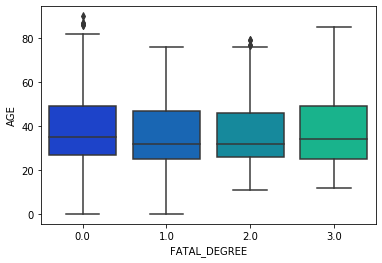

In [293]:
sns.boxplot(x='FATAL_DEGREE',
            y='AGE',
            data=dfcovid220,
            palette='winter')

In [294]:
print('fatal degree class-0, <age>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==0,'AGE'].mean())
print('fatal degree class-1, <age>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==1,'AGE'].mean())
print('fatal degree class-2, <age>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==2,'AGE'].mean())
print('fatal degree class-3, <age>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==3,'AGE'].mean())

fatal degree class-0, <age>: 37.985915492957744
fatal degree class-1, <age>: 35.95404814004377
fatal degree class-2, <age>: 36.93386773547094
fatal degree class-3, <age>: 38.02465753424657


In [295]:
fatal_degree_age_map = {
    0: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==0,'AGE'].mean(),1),
    1: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==1,'AGE'].mean(),1),
    2: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==2,'AGE'].mean(),1),
    3: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==3,'AGE'].mean(),1),
}

def replace_age_na(x_df, fill_map):
    cond=x_df['AGE'].isna()
    res=x_df.loc[cond,'FATAL_DEGREE'].map(fill_map)
    x_df.loc[cond,'AGE']=res
    return x_df

In [296]:
res = (
    pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_v6.csv')
    .pipe(replace_age_na, fatal_degree_age_map)
)
res.head()

,Unnamed: 0,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,...,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE
0,53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,...,0.0,0.0,1.0,0,1,0,0,1,1,1
1,54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,...,0.0,0.0,1.0,0,1,0,0,1,1,1
2,55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,...,0.0,0.0,1.0,0,1,0,0,1,1,1
3,56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,...,0.0,0.0,1.0,0,1,0,0,1,1,1
4,176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,...,0.0,0.0,0.0,1,0,0,0,1,1,1


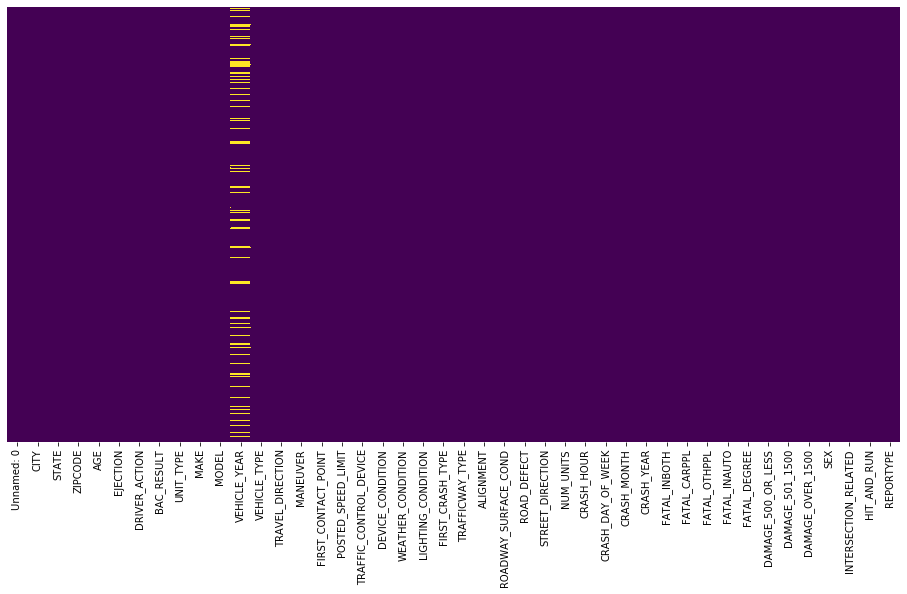

In [297]:
plt.figure(figsize=(16,8))
sns.heatmap(res.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Vehicle year

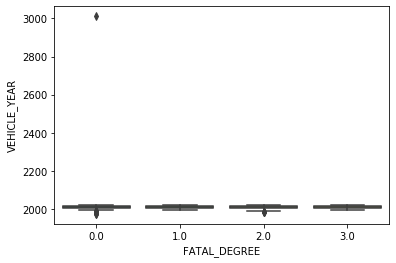

In [298]:
sns.boxplot(x='FATAL_DEGREE',
            y='VEHICLE_YEAR',
            data=dfcovid220,
            palette='summer')

In [299]:
print('fatal degree class-0, <vehicle yr>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==0,'VEHICLE_YEAR'].mean())
print('fatal degree class-1, <vehicle yr>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==1,'VEHICLE_YEAR'].mean())
print('fatal degree class-2, <vehicle yr>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==2,'VEHICLE_YEAR'].mean())
print('fatal degree class-3, <vehicle yr>:',dfcovid220.loc[dfcovid220['FATAL_DEGREE']==3,'VEHICLE_YEAR'].mean())

fatal degree class-0, <vehicle yr>: 2012.1408450704225
fatal degree class-1, <vehicle yr>: 2010.0740740740741
fatal degree class-2, <vehicle yr>: 2010.8055555555557
fatal degree class-3, <vehicle yr>: 2010.4507772020725


In [300]:
fatal_degree_vehicle_year_map = {
    0: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==0,'VEHICLE_YEAR'].mean(),0),
    1: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==1,'VEHICLE_YEAR'].mean(),0),
    2: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==2,'VEHICLE_YEAR'].mean(),0),
    3: round(dfcovid220.loc[dfcovid220['FATAL_DEGREE']==3,'VEHICLE_YEAR'].mean(),0),
}
def replace_vehicle_year_na(x_df, fill_map):
    cond=x_df['VEHICLE_YEAR'].isna()
    res=x_df.loc[cond,'FATAL_DEGREE'].map(fill_map)
    x_df.loc[cond,'VEHICLE_YEAR']=res
    return x_df

In [301]:
res = (
    pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_v6.csv')
    .pipe(replace_age_na, fatal_degree_age_map)
    .pipe(replace_vehicle_year_na, fatal_degree_vehicle_year_map)
)
res.head()

,Unnamed: 0,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,...,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE
0,53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,...,0.0,0.0,1.0,0,1,0,0,1,1,1
1,54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,...,0.0,0.0,1.0,0,1,0,0,1,1,1
2,55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,14,...,0.0,0.0,1.0,0,1,0,0,1,1,1
3,56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,1,17,...,0.0,0.0,1.0,0,1,0,0,1,1,1
4,176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,...,0.0,0.0,0.0,1,0,0,0,1,1,1


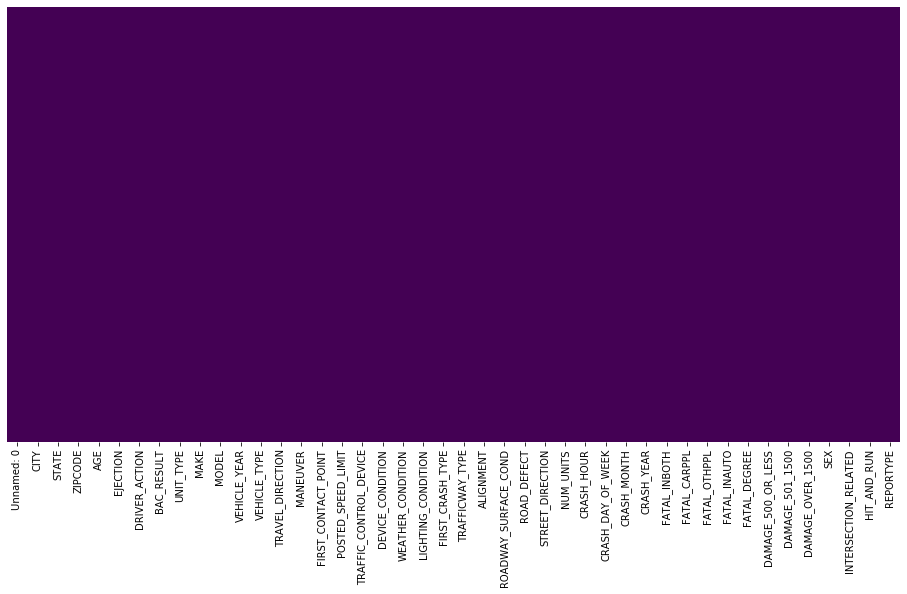

In [302]:
plt.figure(figsize=(16,8))
sns.heatmap(res.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [303]:
res.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v7_mean.csv')

In [304]:
dfcovid221 = pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_v7_mean.csv')
dfcovid221[dfcovid221['VEHICLE_YEAR']>2050].index

Int64Index([1206], dtype='int64')

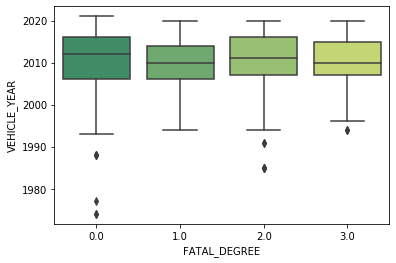

In [305]:
dfcovid221.drop(1206, axis=0, inplace=True)
sns.boxplot(x='FATAL_DEGREE',
            y='VEHICLE_YEAR',
            data=dfcovid221,
            palette='summer')

In [306]:
dfcovid221.to_csv('Traffic_Crashes_-_CPV_FatalDegree_v8_mean.csv')

## KNN

The k nearest neighbors is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. This can be very useful in making predictions about the missing values by finding the k’s closest neighbors to the observation with missing data and then imputing them based on the non-missing values in the neighborhood. 

* Pros:
    * Can be much more accurate than the mean, median or most frequent imputation methods (It depends on the dataset).
* Cons:
    * Computationally expensive. KNN works by storing the whole training dataset in memory.
    * K-NN is quite sensitive to outliers in the data (unlike SVM)

In [307]:
!pip install impyute

In [308]:
import sys
import impyute 
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

In [309]:
df_age_degree_0 = dfcovid220.loc[dfcovid220['FATAL_DEGREE']==0,'AGE']
df_age_degree_1 = dfcovid220.loc[dfcovid220['FATAL_DEGREE']==1,'AGE']
df_age_degree_2 = dfcovid220.loc[dfcovid220['FATAL_DEGREE']==2,'AGE']
df_age_degree_3 = dfcovid220.loc[dfcovid220['FATAL_DEGREE']==3,'AGE']

In [310]:
nan_degree_1_list = list(df_age_degree_1[df_age_degree_1.isna()].index)
print(len(nan_degree_1_list))
print(nan_degree_1_list)

242
[55, 56, 1089, 1090, 1091, 1348, 1349, 1350, 3764, 3765, 5897, 5898, 6168, 6776, 6777, 7300, 7301, 8975, 9742, 9743, 10036, 10037, 11165, 11166, 14359, 14662, 15785, 15786, 15787, 15788, 16252, 16253, 16254, 16255, 16256, 16257, 19318, 26980, 26981, 27172, 27173, 27174, 29135, 29136, 31325, 31326, 31763, 31764, 32800, 32801, 33445, 33446, 33447, 33448, 33820, 33821, 33822, 35151, 35152, 36449, 36450, 36490, 36491, 36492, 36493, 36494, 36495, 36727, 36728, 41175, 41176, 41460, 41461, 41677, 41678, 41679, 42410, 42411, 43281, 43616, 43617, 48702, 48703, 49981, 51394, 51395, 52661, 52662, 52811, 52969, 52970, 53173, 53239, 53240, 54294, 54295, 54503, 54504, 58203, 58204, 62282, 62283, 62284, 62285, 62286, 62287, 62536, 62537, 63268, 63505, 63506, 63645, 63705, 63706, 63982, 63983, 64258, 64448, 64449, 65016, 65017, 65727, 65728, 68242, 68243, 70764, 70765, 70779, 70780, 71328, 72665, 72666, 73373, 73374, 73972, 73973, 74273, 74274, 74275, 74276, 75558, 76543, 76544, 76571, 76572, 7864

In [311]:
df_age_degree_1.shape

(699,)

In [312]:
reshapedf_age_degree_1 = np.array(df_age_degree_1).reshape(233,3)

In [313]:
imputed_age_degree_1 = fast_knn(reshapedf_age_degree_1, k=30)

In [314]:
nan_array = np.argwhere(np.isnan(reshapedf_age_degree_1))
print(nan_array)

[[  0   2]
 [  1   0]
 [  2   1]
 [  2   2]
 [  3   0]
 [  3   1]
 [  3   2]
 [  4   0]
 [  6   1]
 [  6   2]
 [  7   2]
 [  8   0]
 [  9   0]
 [ 10   0]
 [ 10   1]
 [ 12   0]
 [ 12   1]
 [ 13   1]
 [ 17   2]
 [ 18   0]
 [ 18   1]
 [ 18   2]
 [ 20   1]
 [ 20   2]
 [ 22   1]
 [ 24   0]
 [ 24   1]
 [ 24   2]
 [ 25   0]
 [ 25   1]
 [ 27   2]
 [ 28   0]
 [ 28   1]
 [ 28   2]
 [ 29   0]
 [ 29   1]
 [ 37   2]
 [ 52   0]
 [ 52   1]
 [ 53   1]
 [ 53   2]
 [ 54   0]
 [ 55   1]
 [ 55   2]
 [ 56   2]
 [ 57   0]
 [ 58   0]
 [ 58   1]
 [ 59   1]
 [ 59   2]
 [ 62   0]
 [ 62   1]
 [ 62   2]
 [ 63   0]
 [ 66   0]
 [ 66   1]
 [ 66   2]
 [ 69   0]
 [ 69   1]
 [ 70   1]
 [ 70   2]
 [ 71   2]
 [ 72   0]
 [ 72   1]
 [ 72   2]
 [ 73   0]
 [ 73   1]
 [ 83   2]
 [ 84   0]
 [ 86   2]
 [ 87   0]
 [ 88   0]
 [ 88   1]
 [ 89   1]
 [ 89   2]
 [ 90   0]
 [ 92   1]
 [ 92   2]
 [ 94   0]
 [ 95   0]
 [ 95   1]
 [ 99   2]
 [100   0]
 [101   0]
 [102   2]
 [103   0]
 [103   1]
 [103   2]
 [104   2]
 [105   1]
 [105   2]

In [315]:
imputed_knn_age_list = []
for i in range(len(nan_array)):
    #print(imputed_age_degree_1[nan_array[i][0]][nan_array[i][1]])
    imputed_knn_age_list.append(round(imputed_age_degree_1[nan_array[i][0]][nan_array[i][1]],1))
    
print(len(imputed_knn_age_list))
print(imputed_knn_age_list)

242
[30.6, 37.3, 33.3, 34.9, 37.1, 35.6, 34.9, 37.8, 40.6, 34.0, 37.2, 35.6, 37.0, 37.8, 34.7, 38.1, 29.8, 31.6, 35.6, 37.1, 35.6, 34.9, 35.1, 35.0, 35.1, 37.1, 35.6, 34.9, 37.8, 35.6, 36.8, 37.1, 35.6, 34.9, 37.0, 30.6, 39.4, 38.1, 29.8, 29.3, 34.9, 39.6, 35.5, 35.2, 39.0, 41.0, 37.8, 38.7, 36.1, 33.6, 37.1, 35.6, 34.9, 35.4, 37.1, 35.6, 34.9, 37.8, 34.7, 34.3, 35.2, 39.0, 37.1, 35.6, 34.9, 37.8, 34.8, 37.9, 36.9, 30.6, 33.5, 38.2, 29.2, 27.7, 34.5, 36.9, 39.2, 33.5, 37.3, 37.7, 36.5, 30.6, 35.7, 35.5, 30.6, 37.1, 35.6, 34.9, 33.8, 35.4, 35.3, 33.5, 30.9, 34.1, 41.7, 39.6, 37.4, 30.1, 35.1, 37.1, 35.6, 34.9, 37.1, 35.6, 34.9, 40.2, 36.0, 35.2, 37.2, 35.0, 37.8, 37.1, 37.7, 36.5, 37.1, 35.6, 34.9, 29.9, 34.9, 29.7, 34.5, 36.5, 43.1, 37.8, 35.3, 35.1, 34.8, 38.2, 43.4, 34.1, 31.8, 35.0, 35.2, 36.9, 37.3, 37.5, 37.1, 35.6, 34.9, 37.3, 34.3, 39.6, 33.3, 32.3, 35.0, 37.1, 35.6, 34.9, 37.8, 34.7, 35.1, 36.0, 37.0, 36.5, 42.8, 44.8, 32.8, 39.0, 39.2, 37.8, 38.7, 33.0, 29.9, 34.9, 37.9, 34.7,

## MICE

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. The chained equations approach is also very flexible and can handle different variables of different data types (ie., continuous or binary) as well as complexities such as bounds or survey skip patterns.

In [316]:
from impyute.imputation.cs import mice

In [317]:
imputed2_age_degree_1 = mice(reshapedf_age_degree_1)

In [318]:
imputed_mice_age_list = []
for i in range(len(nan_array)):
    #print(imputed2_age_degree_1[nan_array[i][0]][nan_array[i][1]])
    imputed_mice_age_list.append(round(imputed2_age_degree_1[nan_array[i][0]][nan_array[i][1]],1))
    
print(len(imputed_mice_age_list))
print(imputed_mice_age_list)

242
[27.5, 31.6, 28.0, 30.7, 37.4, 35.9, 35.9, 35.0, 57.2, 50.4, 47.4, 23.2, 28.2, 35.0, 32.5, 30.9, 26.8, 27.6, 38.2, 37.4, 35.9, 35.9, 40.3, 39.0, 38.2, 37.4, 35.9, 35.9, 39.9, 39.3, 41.0, 37.4, 35.9, 35.9, 32.9, 29.6, 50.9, 30.9, 26.8, 19.5, 25.0, 44.3, 42.2, 40.2, 52.4, 52.8, 43.2, 43.9, 47.8, 44.0, 37.4, 35.9, 35.9, 24.0, 37.4, 35.9, 35.9, 35.0, 32.5, 28.9, 31.4, 45.3, 37.4, 35.9, 35.9, 35.4, 33.1, 46.0, 29.9, 26.8, 7.1, 29.2, 24.5, 15.7, 22.5, 29.1, 51.6, 46.6, 31.6, 40.8, 40.5, 26.8, 24.9, 27.4, 27.5, 37.4, 35.9, 35.9, 30.3, 37.4, 37.1, 40.3, 23.3, 27.6, 59.5, 44.3, 32.1, 28.5, 33.9, 37.4, 35.9, 35.9, 37.4, 35.9, 35.9, 46.0, 44.0, 41.5, 50.2, 34.6, 34.2, 36.7, 40.8, 40.5, 37.4, 35.9, 35.9, 22.3, 26.9, 21.4, 26.3, 52.3, 56.5, 39.1, 38.2, 38.4, 37.7, 44.5, 56.1, 42.8, 24.2, 28.2, 36.0, 29.1, 46.1, 47.9, 37.4, 35.9, 35.9, 31.6, 31.8, 53.5, 47.8, 27.1, 30.1, 37.4, 35.9, 35.9, 34.2, 30.8, 32.6, 40.3, 28.2, 54.0, 58.8, 72.3, 60.5, 52.4, 47.7, 43.2, 43.9, 40.7, 22.3, 26.9, 35.8, 33.6, 

## DL

This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

* Pros:
    * Quite accurate compared to other methods.
    * It has some functions that can handle categorical data (Feature Encoder).
    * It supports CPUs and GPUs.
* Cons:
    * Single Column imputation.
    * Can be quite slow with large datasets.
    * You have to specify the columns that contain information about the target column that will be imputed.

## Wrapping up data

In [319]:
dfcovid222 = pd.read_csv('Traffic_Crashes_-_CPV_FatalDegree_v8_mean.csv')
dfcovid222.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,...,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE
0,0,0,53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
1,1,1,54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
2,2,2,55,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
3,3,3,56,CHICAGO,IL,60647,36.0,-1.0,3.0,0.0,...,0.0,0.0,1.0,0,1,0,0,1,1,1
4,4,4,176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,1,1,1


In [320]:
dfcovid222.rename(columns={'Unnamed: 0.1.1':'index'}, inplace=True)
dfcovid222.set_index('index',inplace=True)
dfcovid222.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)
dfcovid220.head()

,CITY,STATE,ZIPCODE,AGE,EJECTION,DRIVER_ACTION,BAC_RESULT,UNIT_TYPE,MAKE,MODEL,...,FATAL_OTHPPL,FATAL_INAUTO,FATAL_DEGREE,DAMAGE_500_OR_LESS,DAMAGE_501_1500,DAMAGE_OVER_1500,SEX,INTERSECTION_RELATED,HIT_AND_RUN,REPORTYPE
53,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,14,101,...,0.0,0.0,1.0,0,1,0,0,1,1,1
54,CHICAGO,IL,60647,23.0,0.0,0.0,0.0,1,17,65,...,0.0,0.0,1.0,0,1,0,0,1,1,1
55,CHICAGO,IL,60647,NaN,-1.0,3.0,0.0,1,14,101,...,0.0,0.0,1.0,0,1,0,0,1,1,1
56,CHICAGO,IL,60647,NaN,-1.0,3.0,0.0,1,17,65,...,0.0,0.0,1.0,0,1,0,0,1,1,1
176,CHICAGO,IL,60617,47.0,0.0,0.0,0.0,1,9,37,...,0.0,0.0,0.0,1,0,0,0,1,1,1


In [321]:
dfcovid222.to_csv('Traffic_Crashes_-_CPV_FatalDegree_final.csv')